In [1]:
#importing the required libraries

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns

"""
from google.colab import drive
drive.mount("/drive")
"""

from scipy.stats import kstest
from scipy.stats import lognorm

from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
#Reading the CSV file
df=pd.read_csv('archive/Asteroid_Updated.csv',low_memory=False)

**Dataset Description**


S.No.  |Column Name     | Description
-------|----------------|------------
1.     |name            |Asteroid Name
2.     |a               |Semi Major Axis (au)
3.     |e               |Eccentricity
4.     |i               |Inclination with respect to x-y Ecliptic Plane (deg)
5.     |om              |Longitude of the Ascending Node
6.     |w               |Argument of Perihelion
7.     |q               |Perihelion Distance (au)
8.     |ad              |Aphelion Distance (au)
9.     |per_y           |Orbital Period (Years)
10.    |data_arc        |Data Arc-Span (d)
11.    |condition_code  |Orbit Condition Code
12.    |n_obs_used      |Number of Observation Used
13.    |H               |Absolute Magnitude Parameter
14.    |neo             |Near Earth Object
15.    |pha             |Physically Hazardous Asteroid
16.    |diameter        |Diameter of Asteroid (Km)
17.    |extent          |Object bi/tri-Axial Ellipsoid Dimensions (Km)
18.    |albedo          |Geometric Albedo
19.    |rot_per         |Rotation Period (h)
20.    |GM              |Standard Gravitational Parameter (Product of Mass and Gravitational Constant)
21.    |BV              |Color Index B-V Magnitude Difference
22.    |UB              |Color Index U-B Magnitude Difference
23.    |IR              |Color Index I-R Magnitude Difference
24.    |spec_B          |Spectral Taxonomic Type (SMASSII)
25.    |spec_T          |Spectral Taxonomic Type (Tholen)
26.    |G               |Magnitude Slope Parameter
27.    |moid            |Earth Minimum Orbit Intersection Distance (au)
28.    |class           |Asteroid Orbit Class
29.    |n               |Mean Motion (deg/d)
30.    |per             |Orbital Period (d)
31.    |ma              |Mean Anomaly (deg)



In [3]:
df.head()

name         a         e          i          om           w         q  \
0    Ceres  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1   Pallas  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2     Juno  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3    Vesta  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4  Astraea  2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   

         ad     per_y  data_arc  ...     UB  IR  spec_B spec_T     G     moid  \
0  2.979647  4.608202    8822.0  ...  0.426 NaN       C      G  0.12  1.59478   
1  3.411067  4.616444   72318.0  ...  0.284 NaN       B      B  0.11  1.23324   
2  3.354967  4.360814   72684.0  ...  0.433 NaN      Sk      S  0.32  1.03454   
3  2.570926  3.628837   24288.0  ...  0.492 NaN       V      V  0.32  1.13948   
4  3.066174  4.130323   63507.0  ...  0.411 NaN       S      S   NaN  1.09589   

  class         n          per          ma  
0   MBA  0.213885  1683.145708   77.372096  
1   MBA  0.213503  1686.155999   59.699133  
2   MBA  0.226019  1592.787285   34.925016  
3   MBA  0.271609  1325.432765   95.861936  
4   MBA  0.238632  1508.600458  282.366289  

[5 rows x 31 columns]

In [4]:
df.tail()

name         a         e          i          om           w         q  \
839709  NaN  2.812945  0.664688   4.695700  183.310012  234.618352  0.943214   
839710  NaN  2.645238  0.259376  12.574937    1.620020  339.568072  1.959126   
839711  NaN  2.373137  0.202053   0.732484  176.499082  198.026527  1.893638   
839712  NaN  2.260404  0.258348   9.661947  204.512448  148.496988  1.676433   
839713  NaN  2.546442  0.287672   5.356238   70.709555  273.483265  1.813901   

              ad     per_y  data_arc  ...  UB  IR  spec_B spec_T   G  \
839709  4.682676  4.717914   17298.0  ... NaN NaN     NaN    NaN NaN   
839710  3.331350  4.302346      16.0  ... NaN NaN     NaN    NaN NaN   
839711  2.852636  3.655884       5.0  ... NaN NaN     NaN    NaN NaN   
839712  2.844376  3.398501      10.0  ... NaN NaN     NaN    NaN NaN   
839713  3.278983  4.063580      11.0  ... NaN NaN     NaN    NaN NaN   

            moid class         n          per          ma  
839709  0.032397   APO  0.208911  1723.217927  156.905910  
839710  0.956145   MBA  0.229090  1571.431965   13.366251  
839711  0.893896   MBA  0.269600  1335.311579  355.351127  
839712  0.680220   MBA  0.290018  1241.302609   15.320134  
839713  0.815280   MBA  0.242551  1484.222588   20.432959  

[5 rows x 31 columns]

In [5]:
df.shape

(839714, 31)

In [6]:
df.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
G                 float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [7]:
print(df['diameter'])

0           939.4
1             545
2         246.596
3           525.4
4         106.699
           ...   
839709        NaN
839710        NaN
839711        NaN
839712        NaN
839713        NaN
Name: diameter, Length: 839714, dtype: object


In [8]:
df['diameter'].map(type)

0           <class 'str'>
1           <class 'str'>
2           <class 'str'>
3           <class 'str'>
4           <class 'str'>
               ...       
839709    <class 'float'>
839710    <class 'float'>
839711    <class 'float'>
839712    <class 'float'>
839713    <class 'float'>
Name: diameter, Length: 839714, dtype: object

In [9]:
df['diameter']=df['diameter'].astype('float')

In [10]:
df['diameter'].map(type)

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
839709    <class 'float'>
839710    <class 'float'>
839711    <class 'float'>
839712    <class 'float'>
839713    <class 'float'>
Name: diameter, Length: 839714, dtype: object

In [11]:
print(df['extent'])

0         964.4 x 964.2 x 891.8
1                   582x556x500
2                           NaN
3         572.6 x 557.2 x 446.4
4                           NaN
                  ...          
839709                      NaN
839710                      NaN
839711                      NaN
839712                      NaN
839713                      NaN
Name: extent, Length: 839714, dtype: object


In [12]:
df['extent'].map(type)

0           <class 'str'>
1           <class 'str'>
2         <class 'float'>
3           <class 'str'>
4         <class 'float'>
               ...       
839709    <class 'float'>
839710    <class 'float'>
839711    <class 'float'>
839712    <class 'float'>
839713    <class 'float'>
Name: extent, Length: 839714, dtype: object

In [13]:
print(df['extent'].isna().count())

839714


In [14]:
df = df.drop('name', axis=1)

In [15]:
df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter          float64
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
G                 float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [16]:
df.count()

a                 839712
e                 839714
i                 839714
om                839714
w                 839714
q                 839714
ad                839708
per_y             839713
data_arc          824240
condition_code    838847
n_obs_used        839714
H                 837025
neo               839708
pha               823272
diameter          137636
extent                18
albedo            136409
rot_per            18796
GM                    14
BV                  1021
UB                   979
IR                     1
spec_B              1666
spec_T               980
G                    119
moid              823272
class             839714
n                 839712
per               839708
ma                839706
dtype: int64

In [17]:
df.describe()

a              e              i             om  \
count  839712.000000  839714.000000  839714.000000  839714.000000   
mean        2.757514       0.155636       8.949826     168.499466   
std       114.384959       0.093897       6.666087     103.096307   
min   -104279.220927       0.000000       0.007546       0.000388   
25%         2.385258       0.091454       4.069077      80.211400   
50%         2.644219       0.143655       7.257101     160.294860   
75%         2.996048       0.199400      12.255653     252.201519   
max      3043.149073       1.201134     175.188725     359.999800   

                   w              q             ad          per_y  \
count  839714.000000  839714.000000  839708.000000  839713.000000   
mean      181.075796       2.404728       3.385710       6.859734   
std       104.023854       2.233172      12.748733     252.264249   
min         0.001666       0.070511       0.773684       0.000000   
25%        91.041603       1.971941       2.775350       3.683928   
50%       181.669478       2.225510       3.037761       4.299859   
75%       271.521717       2.578162       3.357967       5.185985   
max       359.999833      80.424175    6081.841956  167877.712688   

            data_arc     n_obs_used  ...       rot_per            GM  \
count  824240.000000  839714.000000  ...  18796.000000  1.400000e+01   
mean     5688.422331     259.191837  ...     21.136772  7.821928e+00   
std      4208.177231     371.759667  ...     73.131751  1.678880e+01   
min         0.000000       2.000000  ...      0.004389  2.100000e-09   
25%      3608.000000      50.000000  ...      4.210000  1.022225e-03   
50%      5806.000000     118.000000  ...      6.653000  6.192500e-01   
75%      7270.000000     296.000000  ...     12.624250  6.500000e+00   
max     72684.000000    9325.000000  ...   3240.000000  6.262840e+01   

                BV          UB    IR           G          moid             n  \
count  1021.000000  979.000000  1.00  119.000000  8.232720e+05  8.397120e+05   
mean      0.769212    0.364396 -0.33    0.178739  1.423371e+00  2.374145e-01   
std       0.088625    0.095780   NaN    0.134603  2.250450e+00  8.095014e-02   
min       0.580000    0.120000 -0.33   -0.250000  3.437640e-07  2.926897e-08   
25%       0.700000    0.289000 -0.33    0.100000  9.784998e-01  1.900553e-01   
50%       0.743000    0.360000 -0.33    0.190000  1.237810e+00  2.292228e-01   
75%       0.850000    0.439000 -0.33    0.250000  1.590560e+00  2.675475e-01   
max       1.077000    0.655000 -0.33    0.600000  7.950130e+01  2.381994e+00   

                per             ma  
count  8.397080e+05  839706.000000  
mean   2.505533e+03     180.659892  
std    9.213979e+04     106.562235  
min    1.511339e+02     -67.136826  
25%    1.345555e+03      86.642618  
50%    1.570524e+03     181.517775  
75%    1.894184e+03     274.301731  
max    6.131733e+07     491.618014  

[8 rows x 23 columns]

In [18]:
df.describe(include = 'all')

a              e              i             om  \
count   839712.000000  839714.000000  839714.000000  839714.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         2.757514       0.155636       8.949826     168.499466   
std        114.384959       0.093897       6.666087     103.096307   
min    -104279.220927       0.000000       0.007546       0.000388   
25%          2.385258       0.091454       4.069077      80.211400   
50%          2.644219       0.143655       7.257101     160.294860   
75%          2.996048       0.199400      12.255653     252.201519   
max       3043.149073       1.201134     175.188725     359.999800   

                    w              q             ad          per_y  \
count   839714.000000  839714.000000  839708.000000  839713.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       181.075796       2.404728       3.385710       6.859734   
std        104.023854       2.233172      12.748733     252.264249   
min          0.001666       0.070511       0.773684       0.000000   
25%         91.041603       1.971941       2.775350       3.683928   
50%        181.669478       2.225510       3.037761       4.299859   
75%        271.521717       2.578162       3.357967       5.185985   
max        359.999833      80.424175    6081.841956  167877.712688   

             data_arc condition_code  ...          UB    IR spec_B spec_T  \
count   824240.000000         838847  ...  979.000000  1.00   1666    980   
unique            NaN             12  ...         NaN   NaN     34    131   
top               NaN              0  ...         NaN   NaN      S      S   
freq              NaN         636103  ...         NaN   NaN    445    338   
mean      5688.422331            NaN  ...    0.364396 -0.33    NaN    NaN   
std       4208.177231            NaN  ...    0.095780   NaN    NaN    NaN   
min          0.000000            NaN  ...    0.120000 -0.33    NaN    NaN   
25%       3608.000000            NaN  ...    0.289000 -0.33    NaN    NaN   
50%       5806.000000            NaN  ...    0.360000 -0.33    NaN    NaN   
75%       7270.000000            NaN  ...    0.439000 -0.33    NaN    NaN   
max      72684.000000            NaN  ...    0.655000 -0.33    NaN    NaN   

                 G          moid   class             n           per  \
count   119.000000  8.232720e+05  839714  8.397120e+05  8.397080e+05   
unique         NaN           NaN      14           NaN           NaN   
top            NaN           NaN     MBA           NaN           NaN   
freq           NaN           NaN  747420           NaN           NaN   
mean      0.178739  1.423371e+00     NaN  2.374145e-01  2.505533e+03   
std       0.134603  2.250450e+00     NaN  8.095014e-02  9.213979e+04   
min      -0.250000  3.437640e-07     NaN  2.926897e-08  1.511339e+02   
25%       0.100000  9.784998e-01     NaN  1.900553e-01  1.345555e+03   
50%       0.190000  1.237810e+00     NaN  2.292228e-01  1.570524e+03   
75%       0.250000  1.590560e+00     NaN  2.675475e-01  1.894184e+03   
max       0.600000  7.950130e+01     NaN  2.381994e+00  6.131733e+07   

                   ma  
count   839706.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean       180.659892  
std        106.562235  
min        -67.136826  
25%         86.642618  
50%        181.517775  
75%        274.301731  
max        491.618014  

[11 rows x 30 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               839712 non-null  float64
 1   e               839714 non-null  float64
 2   i               839714 non-null  float64
 3   om              839714 non-null  float64
 4   w               839714 non-null  float64
 5   q               839714 non-null  float64
 6   ad              839708 non-null  float64
 7   per_y           839713 non-null  float64
 8   data_arc        824240 non-null  float64
 9   condition_code  838847 non-null  object 
 10  n_obs_used      839714 non-null  int64  
 11  H               837025 non-null  float64
 12  neo             839708 non-null  object 
 13  pha             823272 non-null  object 
 14  diameter        137636 non-null  float64
 15  extent          18 non-null      object 
 16  albedo          136409 non-null  float64
 17  rot_per   

In [20]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
839709    False
839710    False
839711    False
839712    False
839713    False
Length: 839714, dtype: bool

In [21]:
df.duplicated(keep=False).sum()

0

In [22]:
df.isna().sum()

a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [23]:
df.isna().sum()/df.shape[0]

a                 0.000002
e                 0.000000
i                 0.000000
om                0.000000
w                 0.000000
q                 0.000000
ad                0.000007
per_y             0.000001
data_arc          0.018428
condition_code    0.001032
n_obs_used        0.000000
H                 0.003202
neo               0.000007
pha               0.019580
diameter          0.836092
extent            0.999979
albedo            0.837553
rot_per           0.977616
GM                0.999983
BV                0.998784
UB                0.998834
IR                0.999999
spec_B            0.998016
spec_T            0.998833
G                 0.999858
moid              0.019580
class             0.000000
n                 0.000002
per               0.000007
ma                0.000010
dtype: float64

In [24]:
df.drop(df[df['diameter'].isna()].index, inplace=True)

In [25]:
df.shape

(137636, 30)

In [26]:
df.count()

a                 137636
e                 137636
i                 137636
om                137636
w                 137636
q                 137636
ad                137636
per_y             137636
data_arc          137498
condition_code    137636
n_obs_used        137636
H                 136889
neo               137636
pha               137636
diameter          137636
extent                16
albedo            136406
rot_per            11188
GM                    14
BV                  1005
UB                   965
IR                     1
spec_B              1370
spec_T               965
G                    119
moid              137636
class             137636
n                 137636
per               137636
ma                137636
dtype: int64

In [27]:
df.isna().sum()

a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [28]:
df.isna().sum()/df.shape[0]

a                 0.000000
e                 0.000000
i                 0.000000
om                0.000000
w                 0.000000
q                 0.000000
ad                0.000000
per_y             0.000000
data_arc          0.001003
condition_code    0.000000
n_obs_used        0.000000
H                 0.005427
neo               0.000000
pha               0.000000
diameter          0.000000
extent            0.999884
albedo            0.008937
rot_per           0.918713
GM                0.999898
BV                0.992698
UB                0.992989
IR                0.999993
spec_B            0.990046
spec_T            0.992989
G                 0.999135
moid              0.000000
class             0.000000
n                 0.000000
per               0.000000
ma                0.000000
dtype: float64

In [29]:
df = df.drop('extent', axis=1)

In [30]:
df = df.drop('rot_per', axis=1)

In [31]:
df = df.drop('GM', axis=1)

In [32]:
df = df.drop('BV', axis=1)

In [33]:
df = df.drop('UB', axis=1)

In [34]:
df = df.drop('IR', axis=1)

In [35]:
df = df.drop('spec_B', axis=1)

In [36]:
df = df.drop('spec_T', axis=1)

In [37]:
df = df.drop('G', axis=1)

In [38]:
 df.select_dtypes(['float64' , 'int64']).corr()

a         e         i        om         w         q  \
a           1.000000  0.021343  0.148705 -0.000675 -0.002379  0.366541   
e           0.021343  1.000000  0.144882 -0.000398  0.012354 -0.514929   
i           0.148705  0.144882  1.000000 -0.012863 -0.004291  0.085951   
om         -0.000675 -0.000398 -0.012863  1.000000 -0.106991 -0.002965   
w          -0.002379  0.012354 -0.004291 -0.106991  1.000000 -0.006678   
q           0.366541 -0.514929  0.085951 -0.002965 -0.006678  1.000000   
ad          0.986158  0.114209  0.141043 -0.000181 -0.001312  0.207199   
per_y       0.941359  0.048275  0.096304  0.000367 -0.001621  0.109322   
data_arc   -0.019647 -0.028381 -0.199614 -0.000501 -0.005573 -0.017604   
n_obs_used -0.049336 -0.076498 -0.224616 -0.023611  0.010236 -0.080338   
H          -0.132652  0.199474 -0.034041  0.002808 -0.008462 -0.375180   
diameter    0.144736 -0.049133  0.052609  0.001164  0.002966  0.329703   
albedo     -0.110212 -0.019427 -0.089795  0.000742 -0.003041 -0.262703   
moid        0.369826 -0.490871  0.125247 -0.003694 -0.006532  0.996821   
n          -0.279518  0.189318 -0.108291  0.008053  0.002438 -0.706225   
per         0.941359  0.048275  0.096304  0.000367 -0.001621  0.109322   
ma          0.014283 -0.018082  0.015262 -0.003253  0.001528  0.071083   

                  ad     per_y  data_arc  n_obs_used         H  diameter  \
a           0.986158  0.941359 -0.019647   -0.049336 -0.132652  0.144736   
e           0.114209  0.048275 -0.028381   -0.076498  0.199474 -0.049133   
i           0.141043  0.096304 -0.199614   -0.224616 -0.034041  0.052609   
om         -0.000181  0.000367 -0.000501   -0.023611  0.002808  0.001164   
w          -0.001312 -0.001621 -0.005573    0.010236 -0.008462  0.002966   
q           0.207199  0.109322 -0.017604   -0.080338 -0.375180  0.329703   
ad          1.000000  0.970338 -0.017522   -0.037559 -0.072717  0.093430   
per_y       0.970338  1.000000 -0.007837   -0.011021 -0.035556  0.048953   
data_arc   -0.017522 -0.007837  1.000000    0.755917 -0.675246  0.491603   
n_obs_used -0.037559 -0.011021  0.755917    1.000000 -0.784629  0.385747   
H          -0.072717 -0.035556 -0.675246   -0.784629  1.000000 -0.568655   
diameter    0.093430  0.048953  0.491603    0.385747 -0.568655  1.000000   
albedo     -0.069216 -0.019492  0.255929    0.450579 -0.241999 -0.107397   
moid        0.211219  0.110897 -0.025358   -0.090066 -0.370693  0.332423   
n          -0.168049 -0.059904  0.039933    0.127482  0.329979 -0.201023   
per         0.970338  1.000000 -0.007837   -0.011021 -0.035556  0.048953   
ma          0.002351 -0.005284 -0.017385   -0.047139 -0.006064  0.009659   

              albedo      moid         n       per        ma  
a          -0.110212  0.369826 -0.279518  0.941359  0.014283  
e          -0.019427 -0.490871  0.189318  0.048275 -0.018082  
i          -0.089795  0.125247 -0.108291  0.096304  0.015262  
om          0.000742 -0.003694  0.008053  0.000367 -0.003253  
w          -0.003041 -0.006532  0.002438 -0.001621  0.001528  
q          -0.262703  0.996821 -0.706225  0.109322  0.071083  
ad         -0.069216  0.211219 -0.168049  0.970338  0.002351  
per_y      -0.019492  0.110897 -0.059904  1.000000 -0.005284  
data_arc    0.255929 -0.025358  0.039933 -0.007837 -0.017385  
n_obs_used  0.450579 -0.090066  0.127482 -0.011021 -0.047139  
H          -0.241999 -0.370693  0.329979 -0.035556 -0.006064  
diameter   -0.107397  0.332423 -0.201023  0.048953  0.009659  
albedo      1.000000 -0.267216  0.348847 -0.019492 -0.044869  
moid       -0.267216  1.000000 -0.692139  0.110897  0.072123  
n           0.348847 -0.692139  1.000000 -0.059904 -0.063535  
per        -0.019492  0.110897 -0.059904  1.000000 -0.005284  
ma         -0.044869  0.072123 -0.063535 -0.005284  1.000000

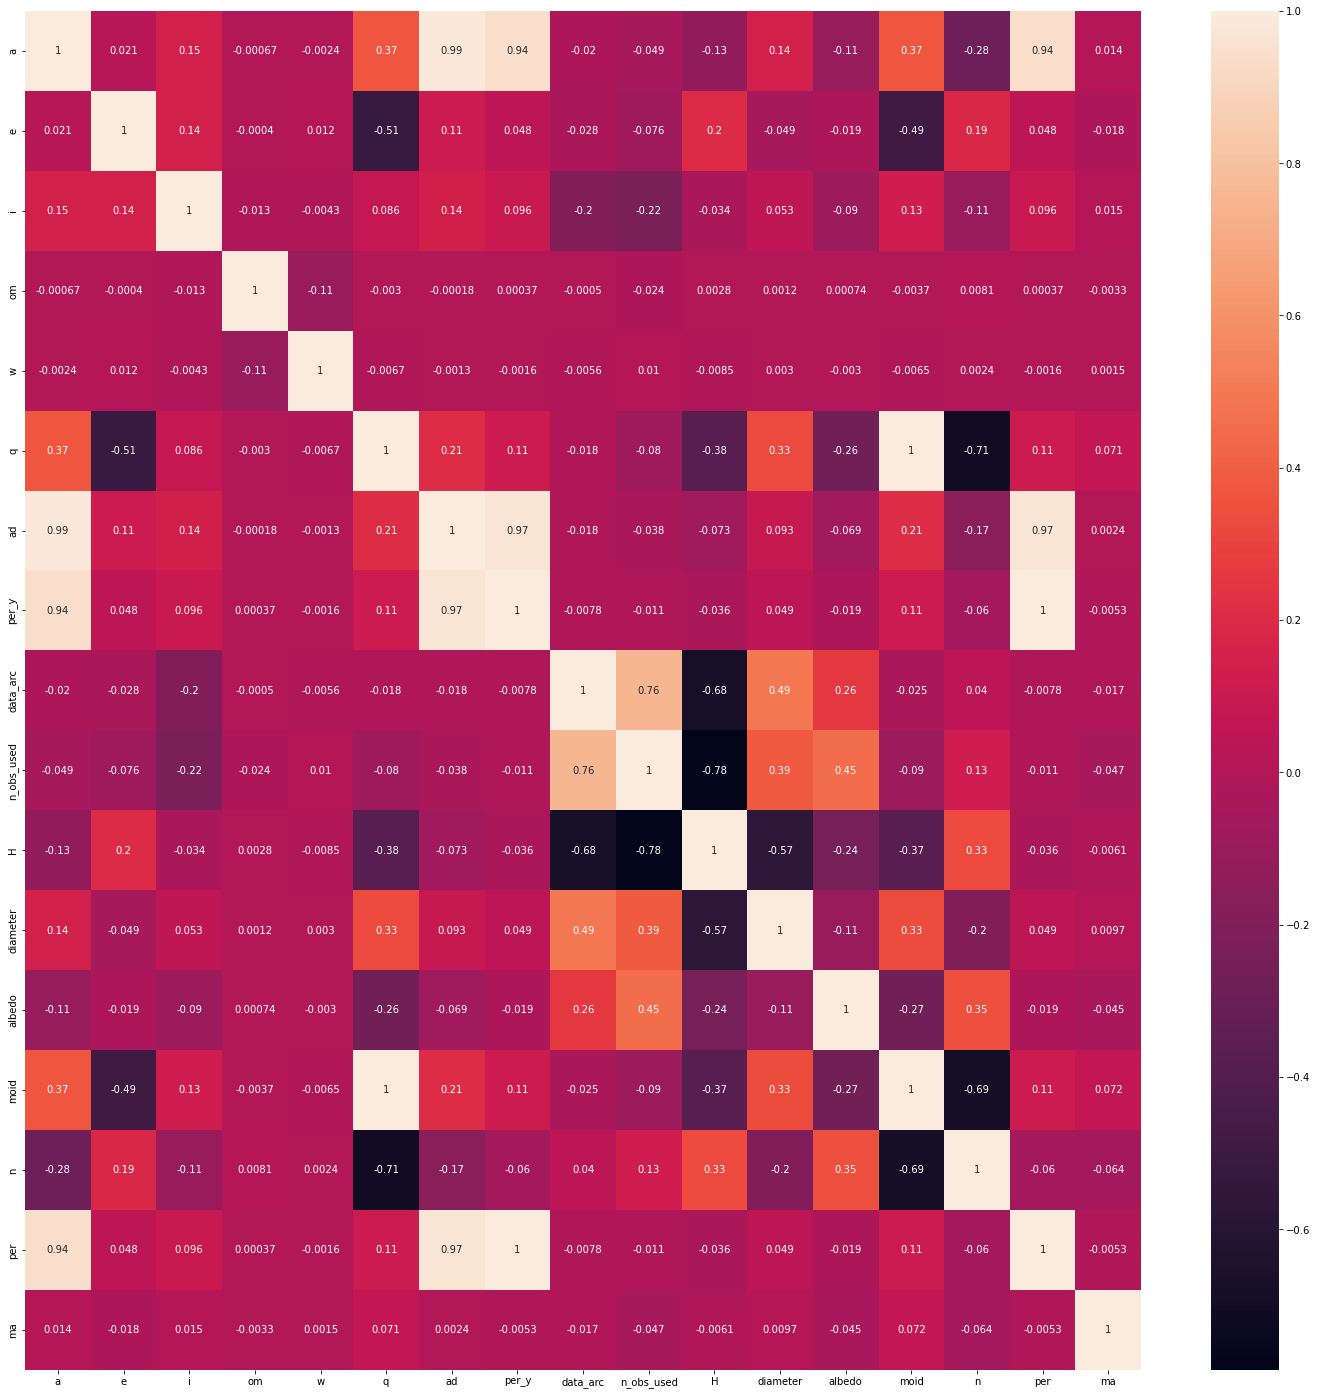

In [39]:
plt.figure(figsize=(25,25))
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

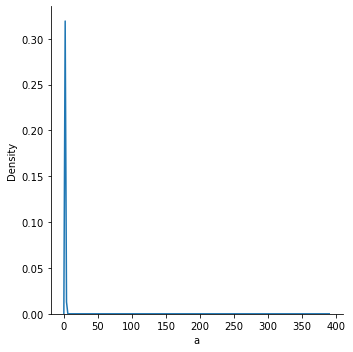

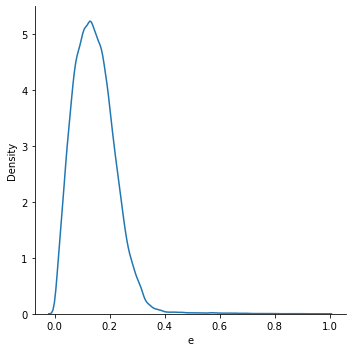

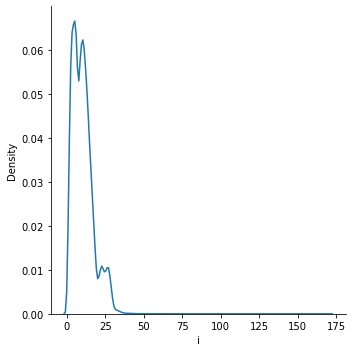

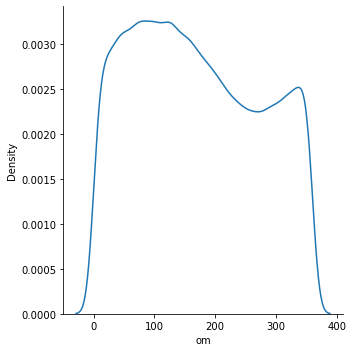

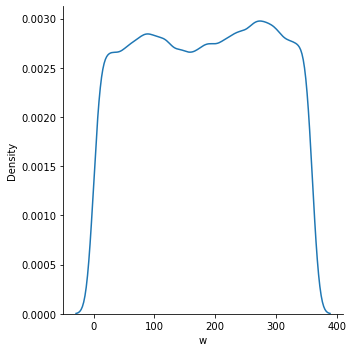

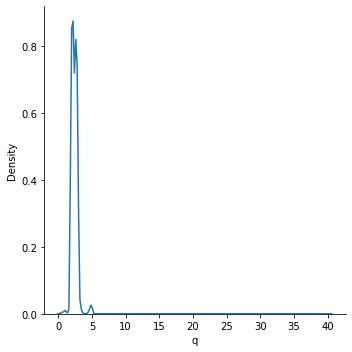

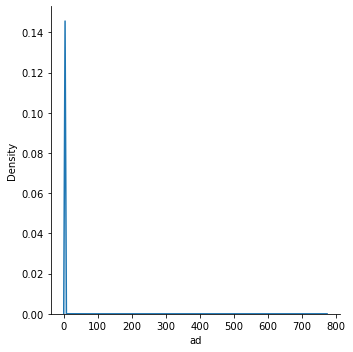

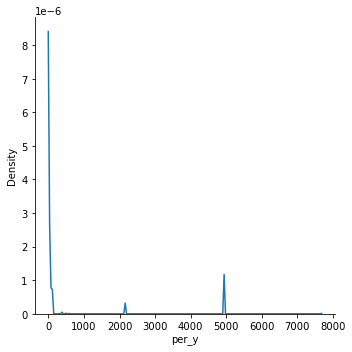

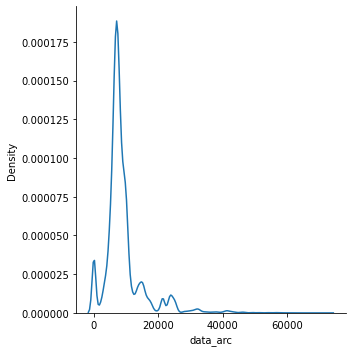

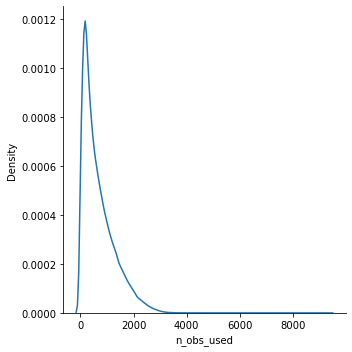

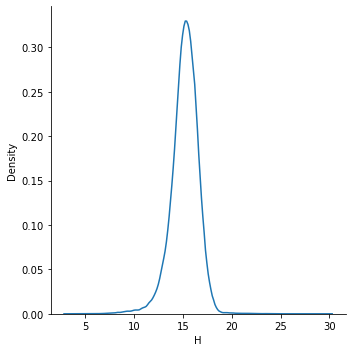

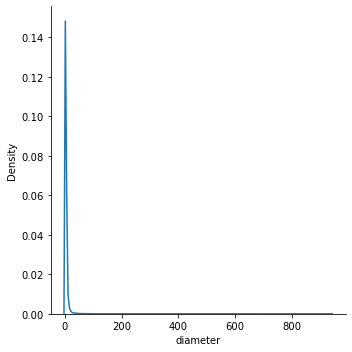

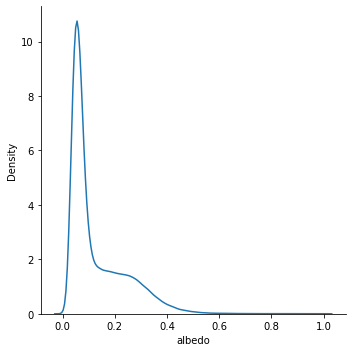

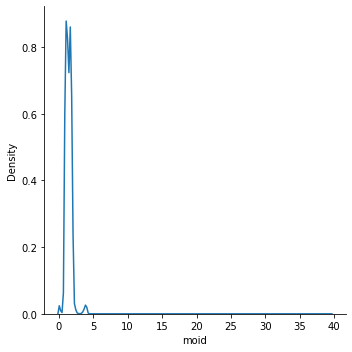

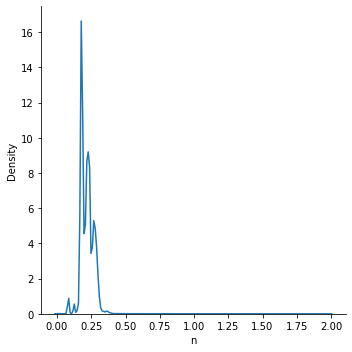

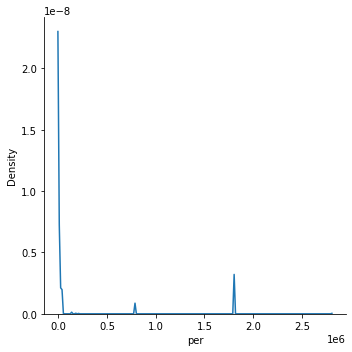

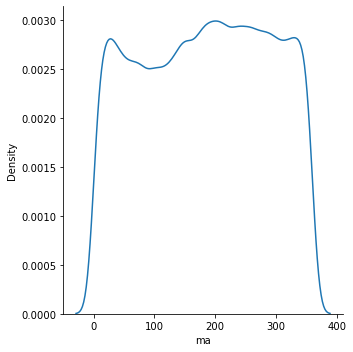

In [40]:
for i in df.columns.values.tolist():
    if str(df[i].dtype) in ['int64', 'float64', 'datetime']:
        sns.displot(df, x=i, kind="kde")

In [41]:
kstest(df['a'],'norm')

KstestResult(statistic=0.9701216345274585, pvalue=0.0)

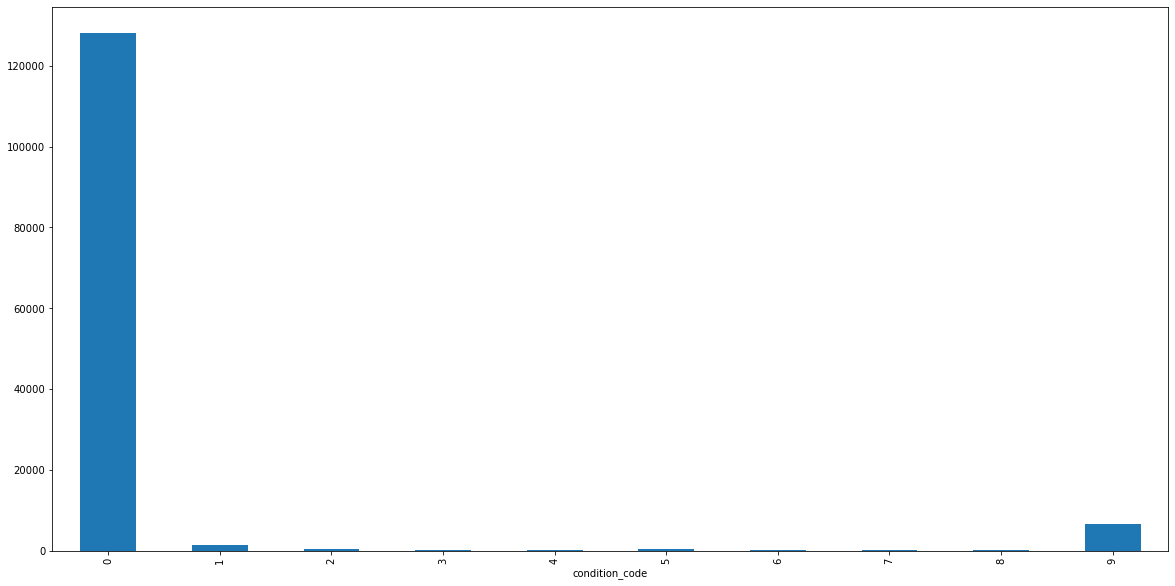

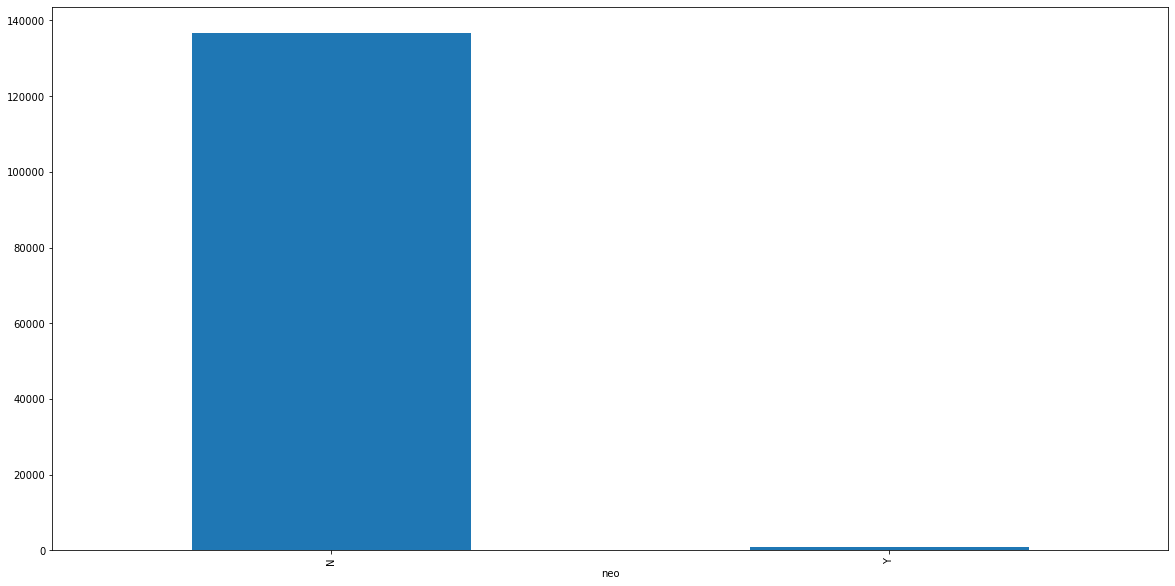

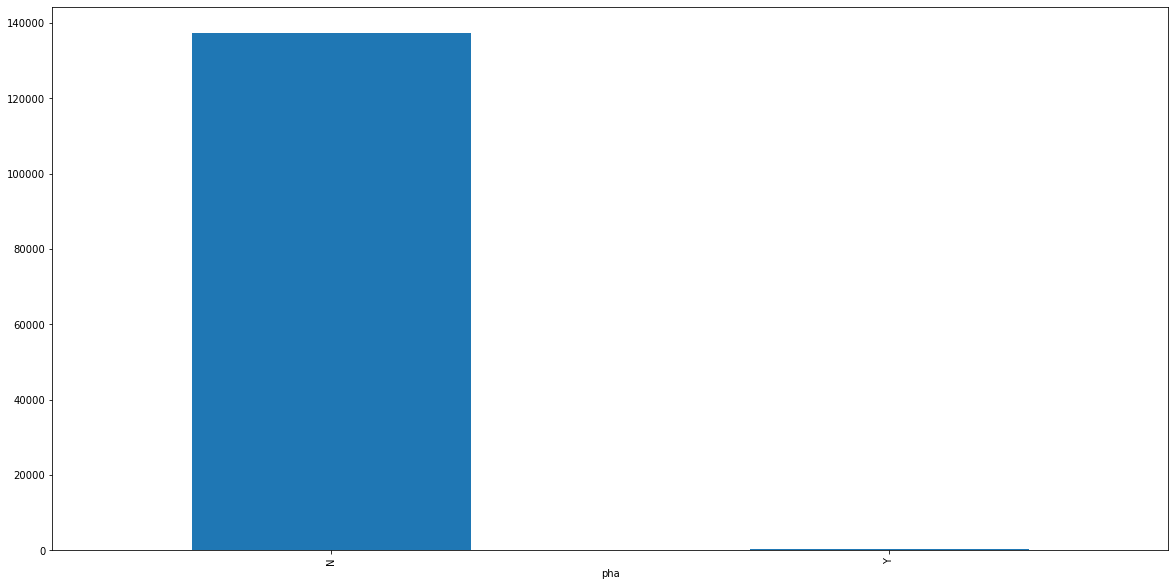

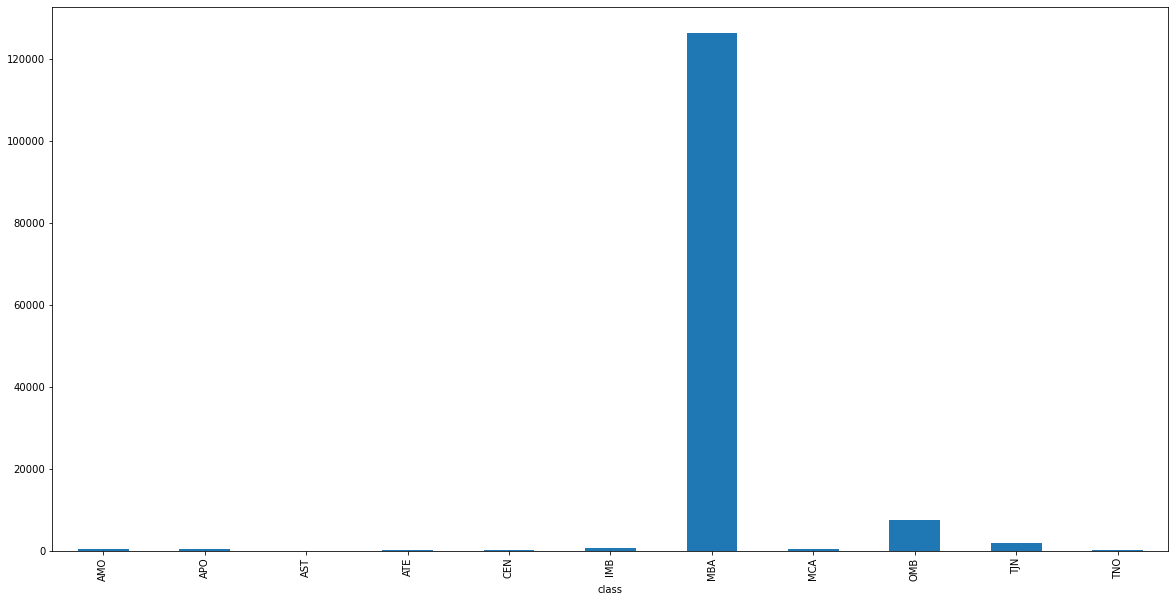

In [42]:
for i in df.columns.values.tolist():
    if i!='name' and not(str(df[i].dtype) in ['int64', 'float64', 'datetime']):
        plt.figure(figsize=(20,10))
        df.groupby([i]).a.count().plot(kind='bar')
        plt.show()

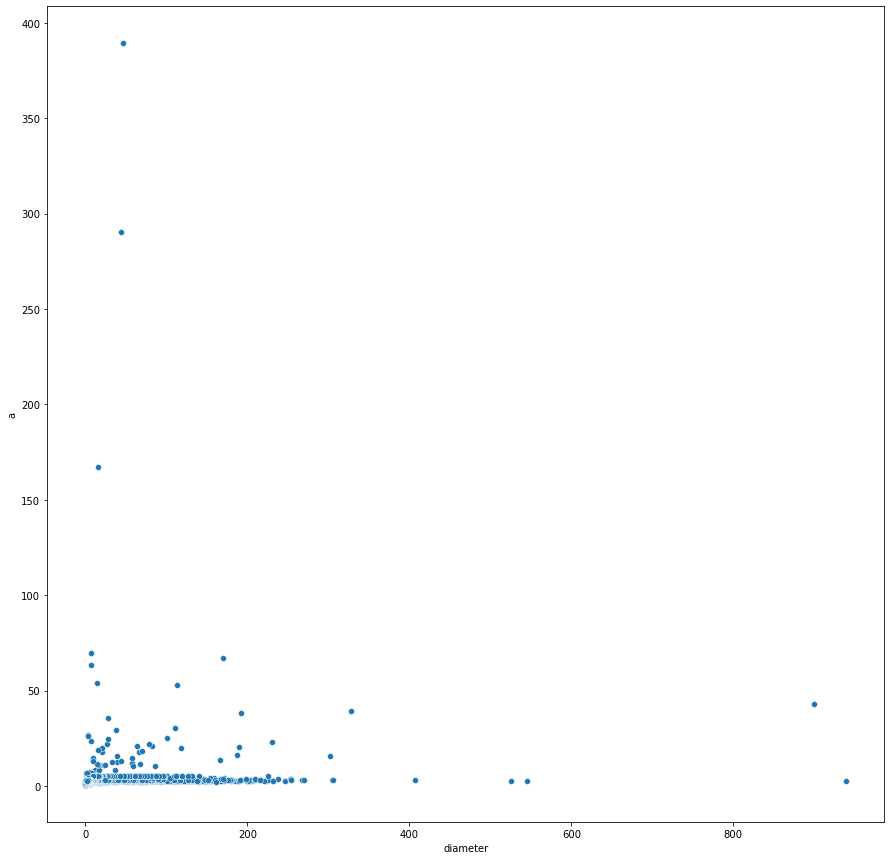

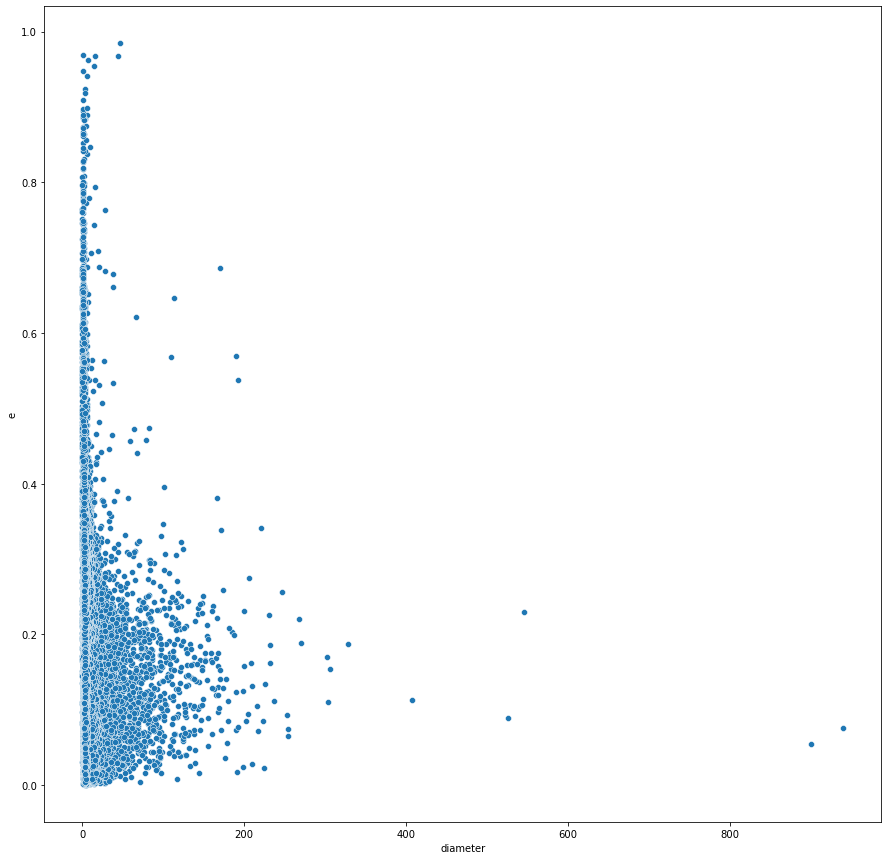

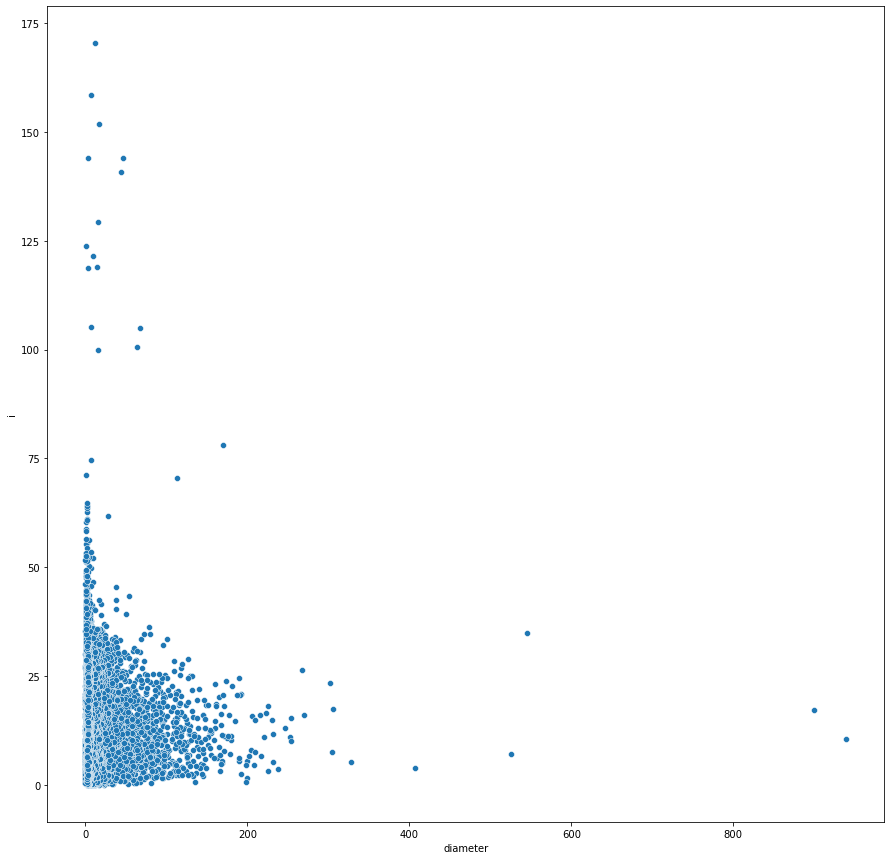

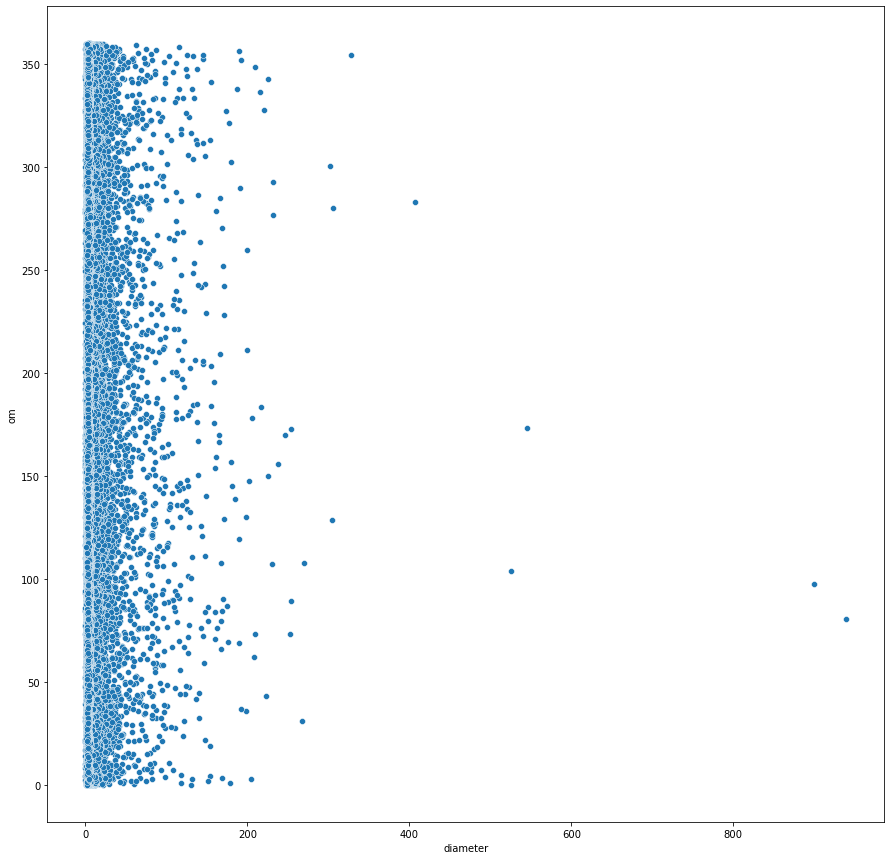

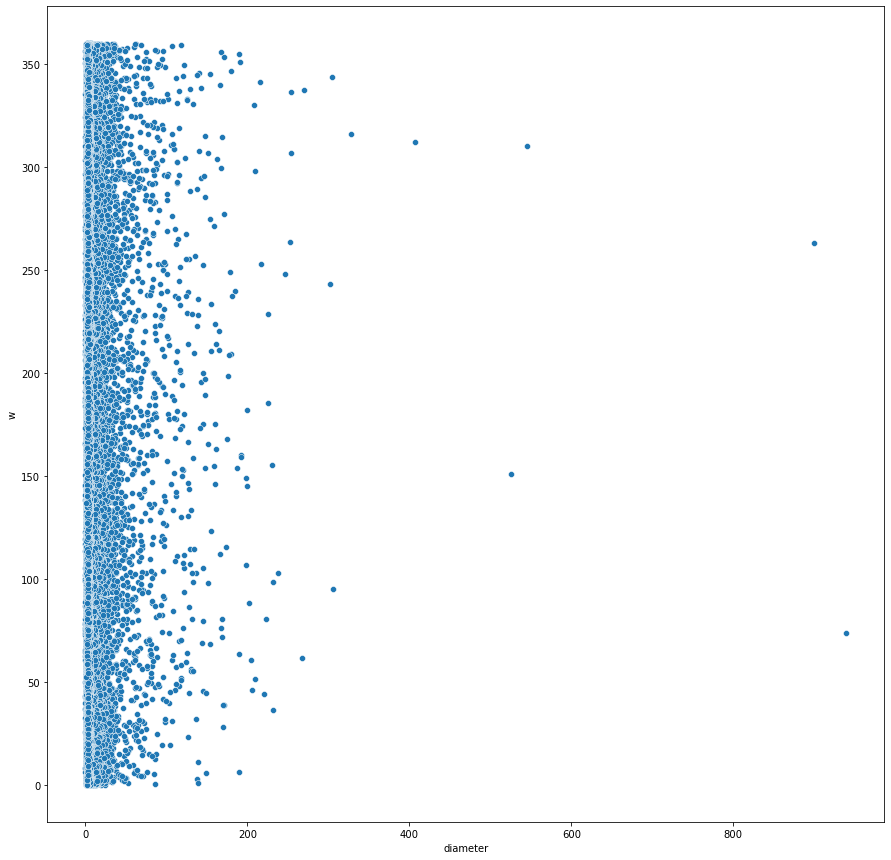

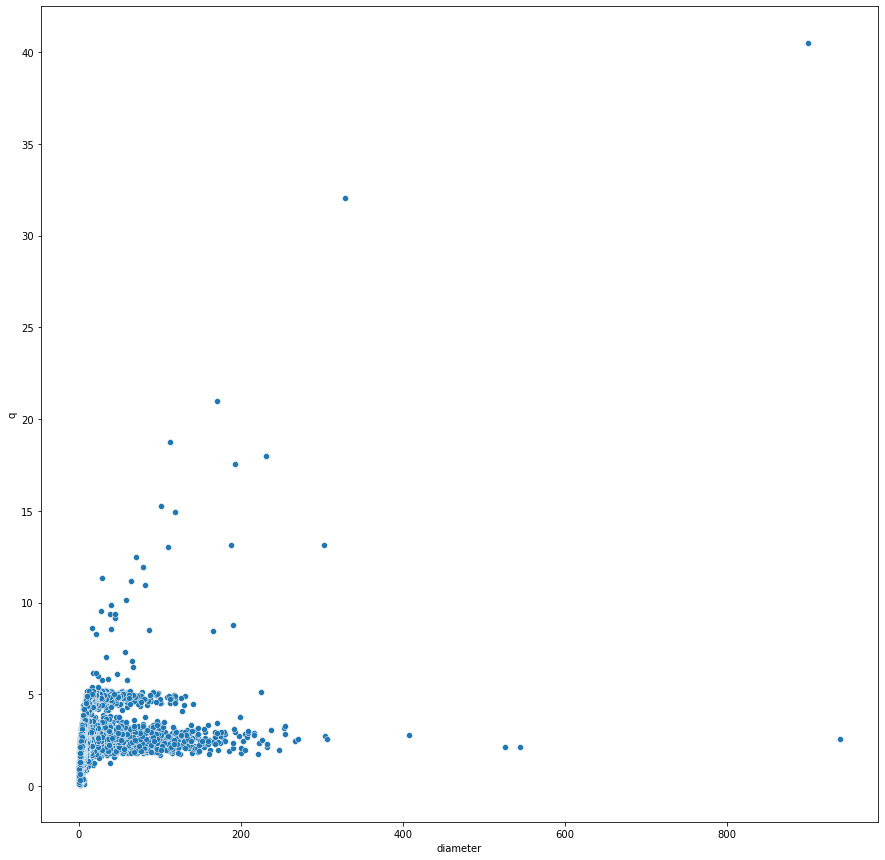

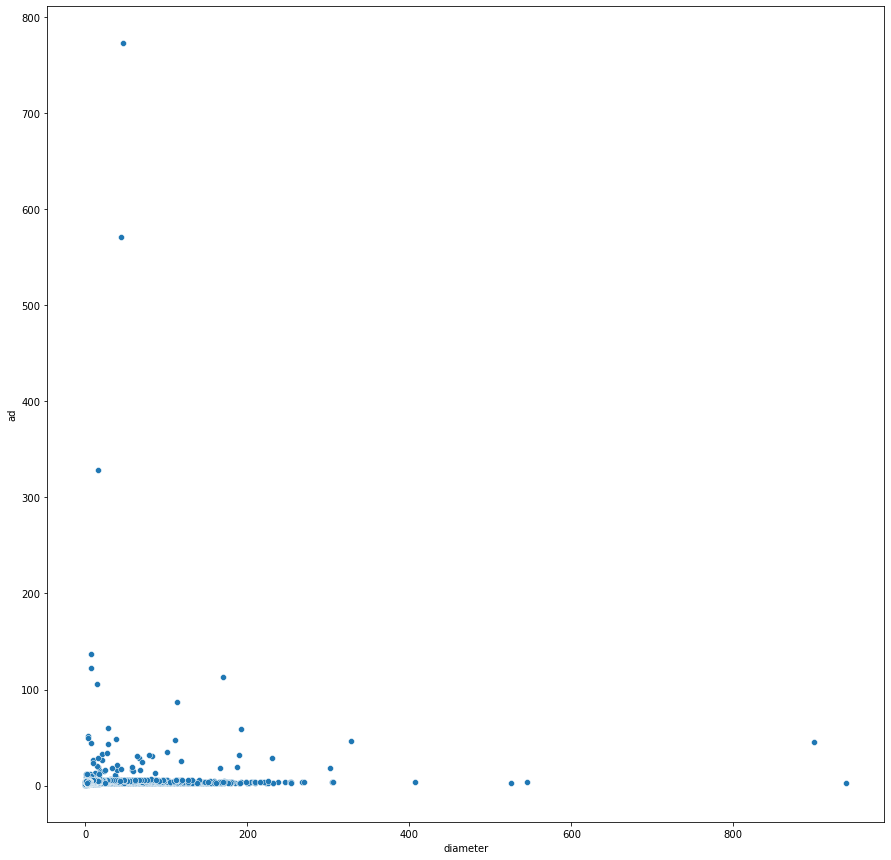

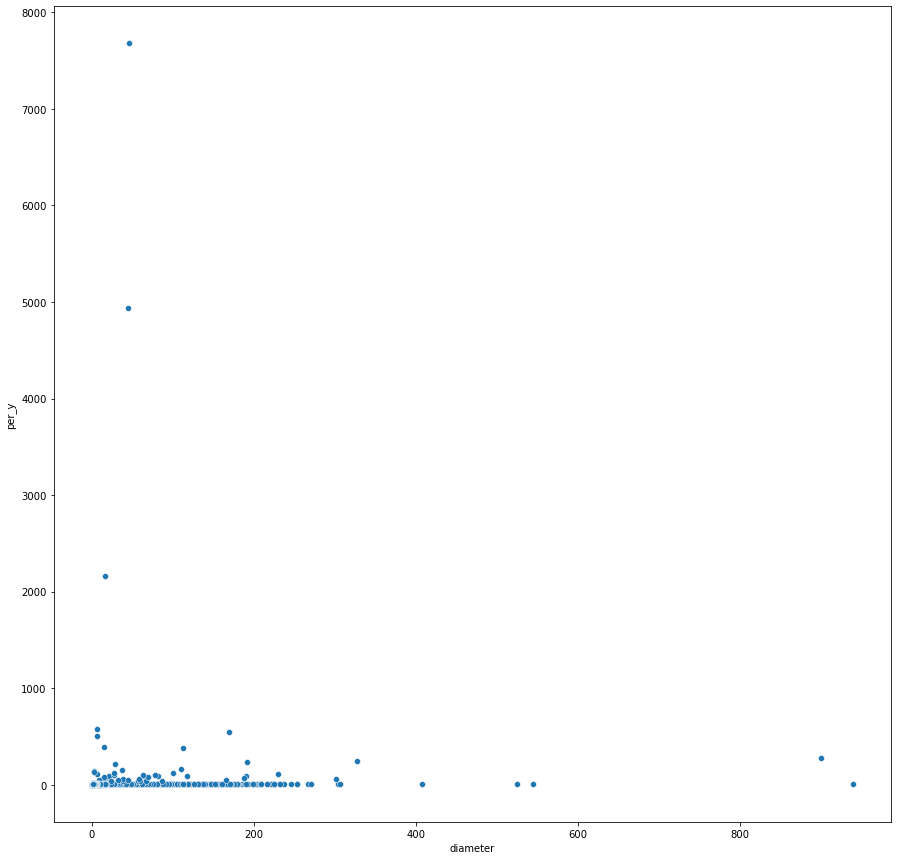

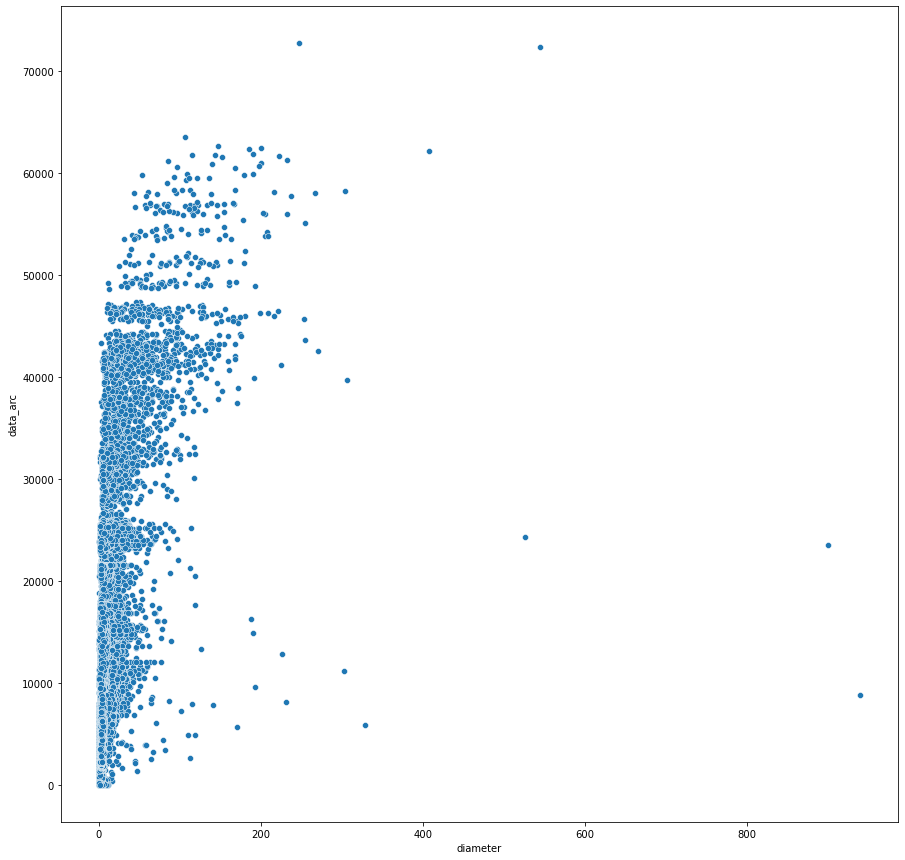

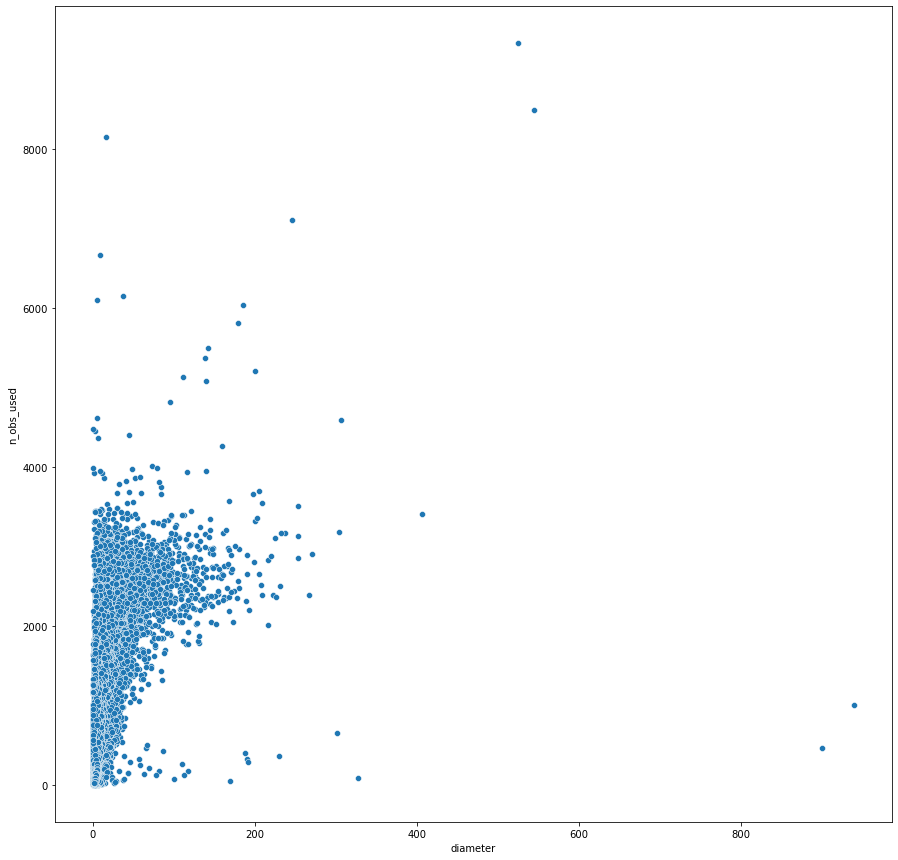

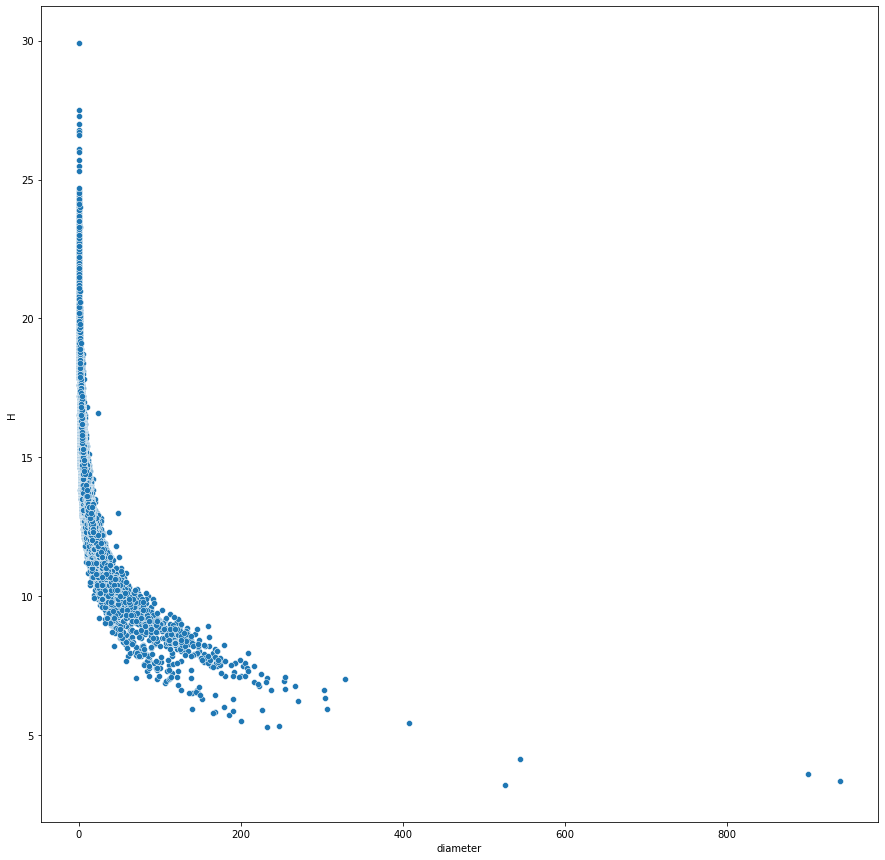

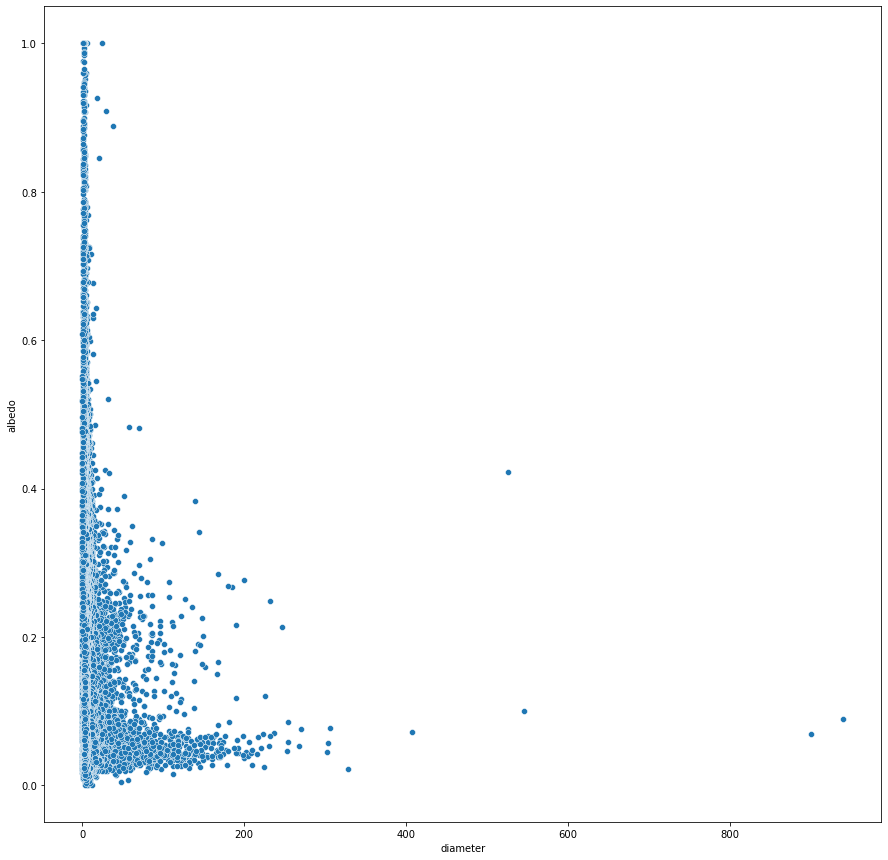

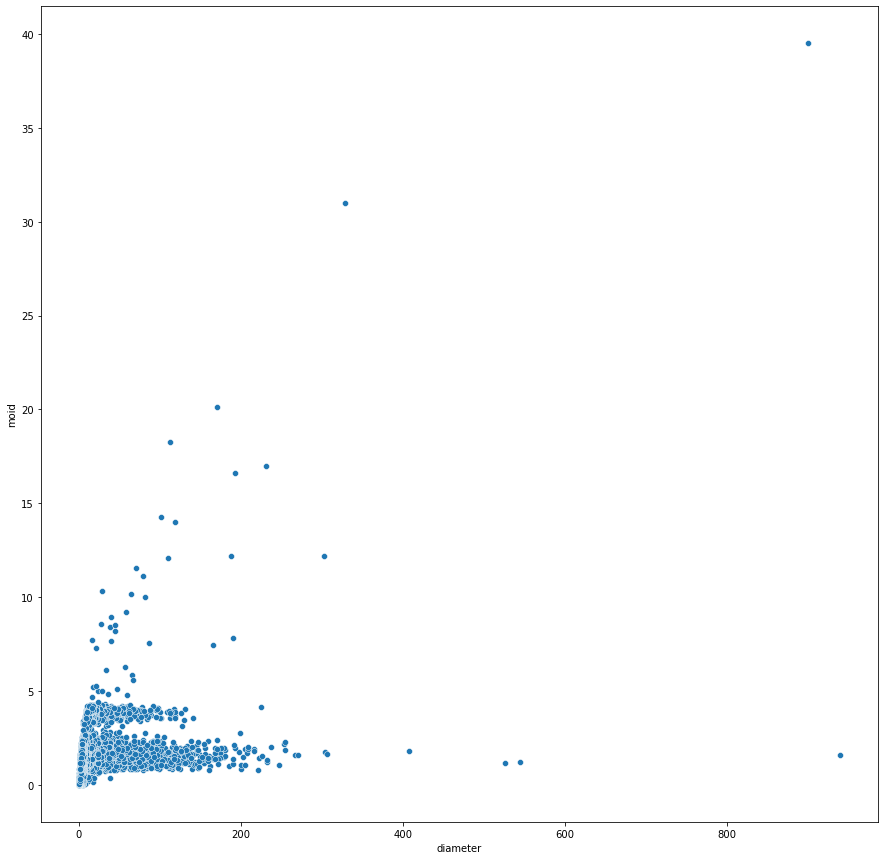

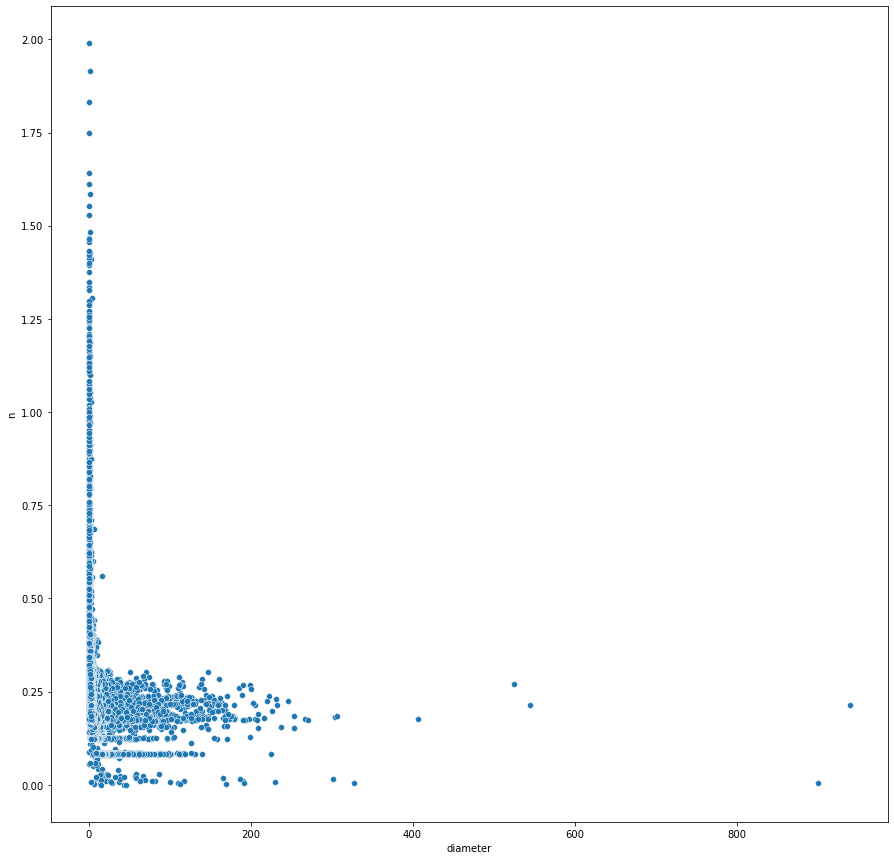

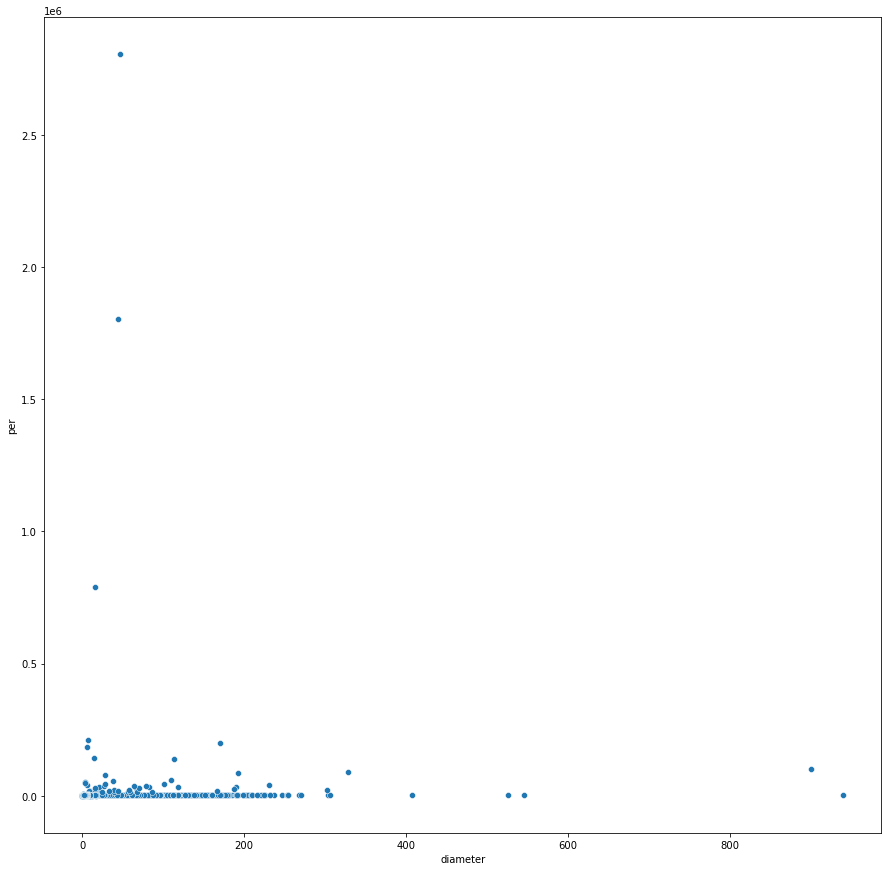

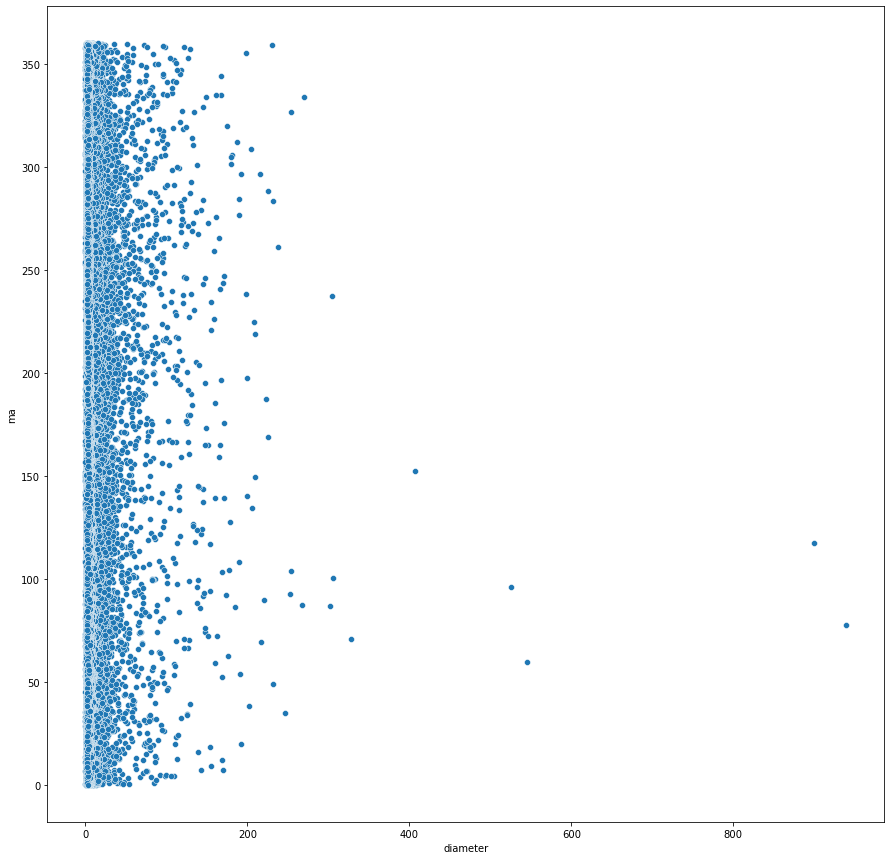

In [43]:
for i in df.columns.values.tolist():
    if i!="diameter" and str(df[i].dtype) in ['int64', 'float64', 'datetime']:
        plt.figure(figsize=(15,15))
        sns.scatterplot(data=df, x="diameter", y=i)
        plt.show()

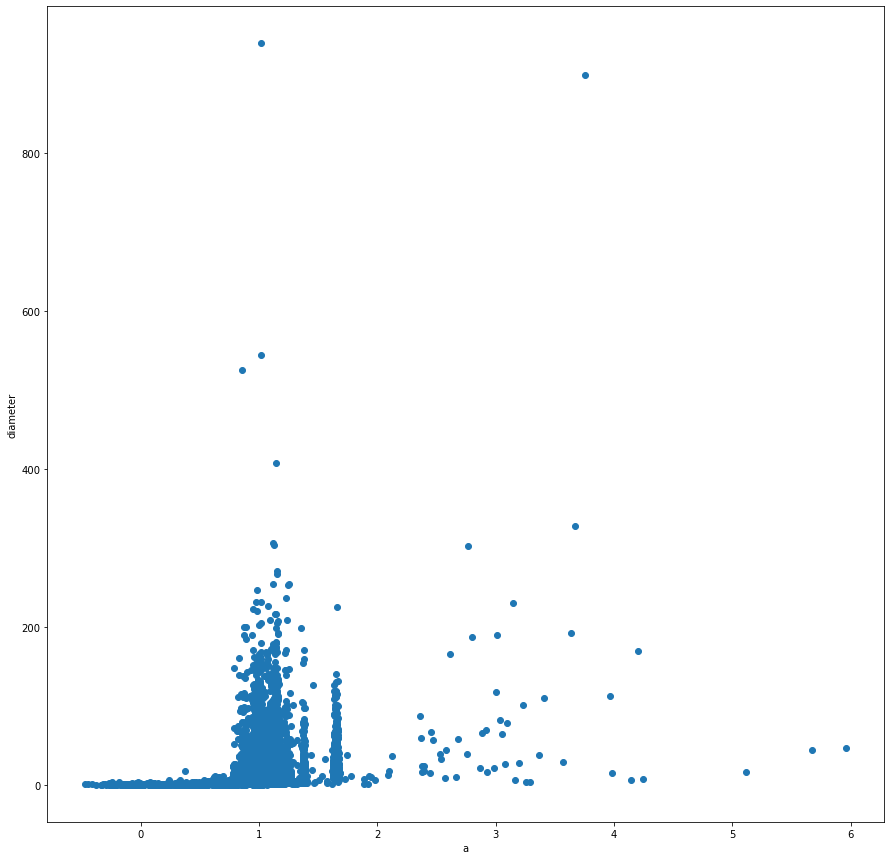

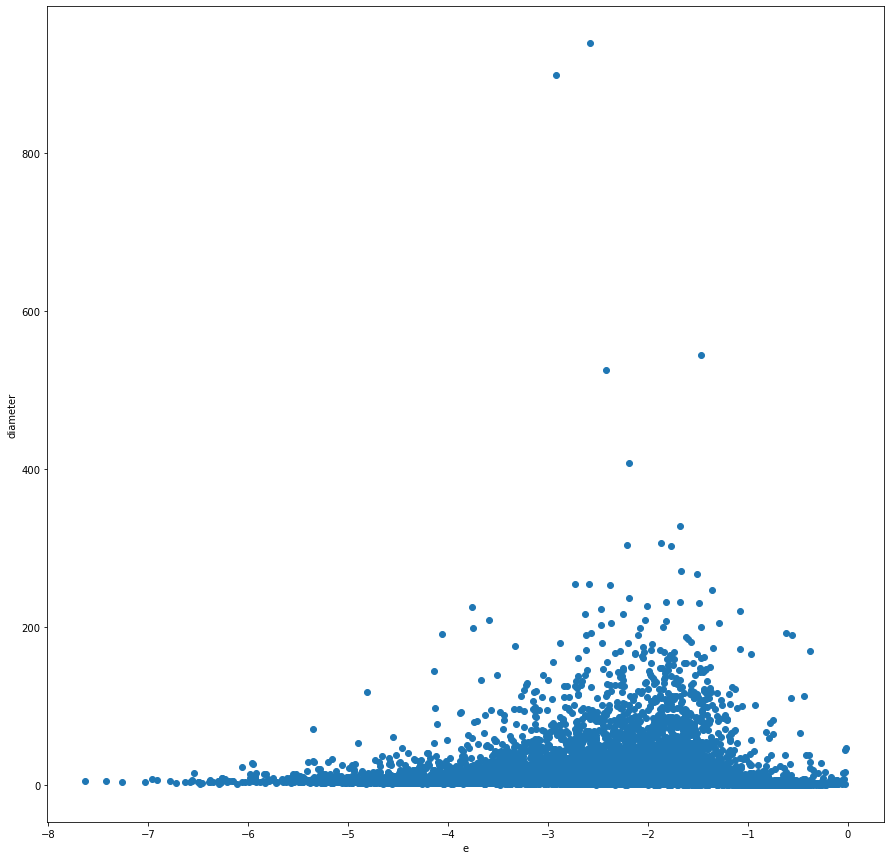

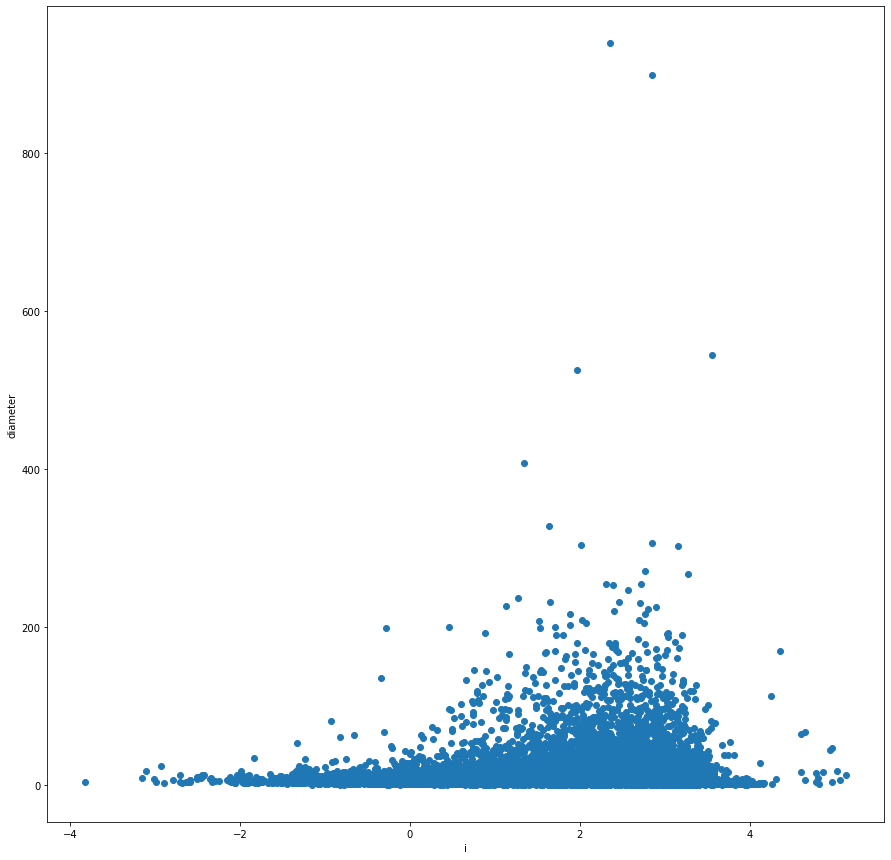

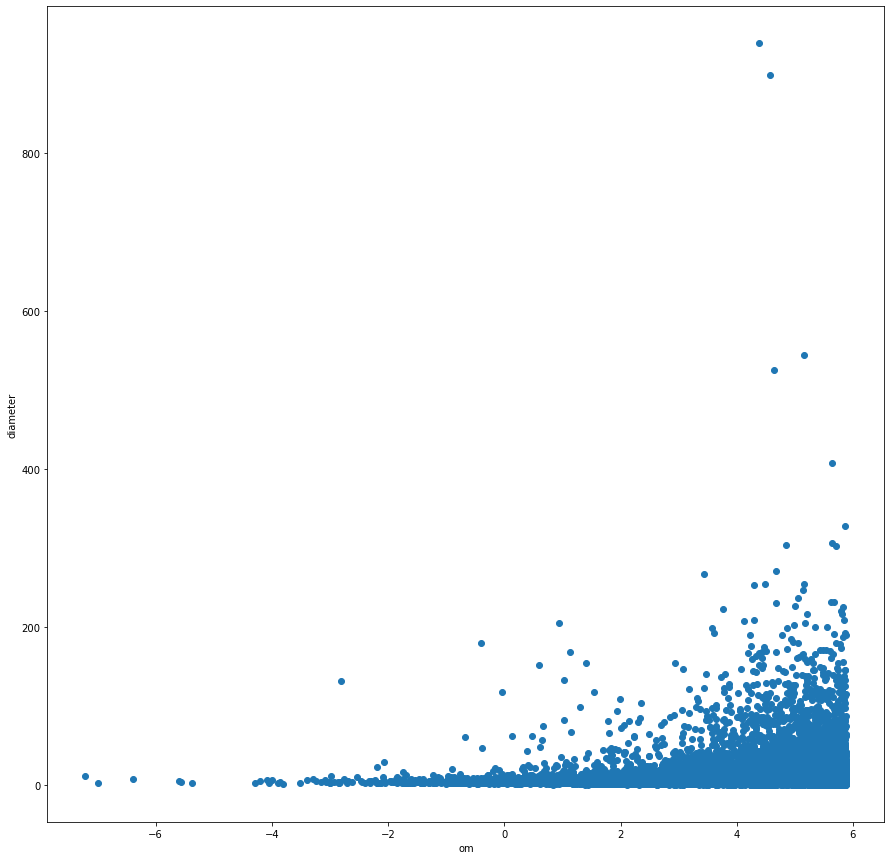

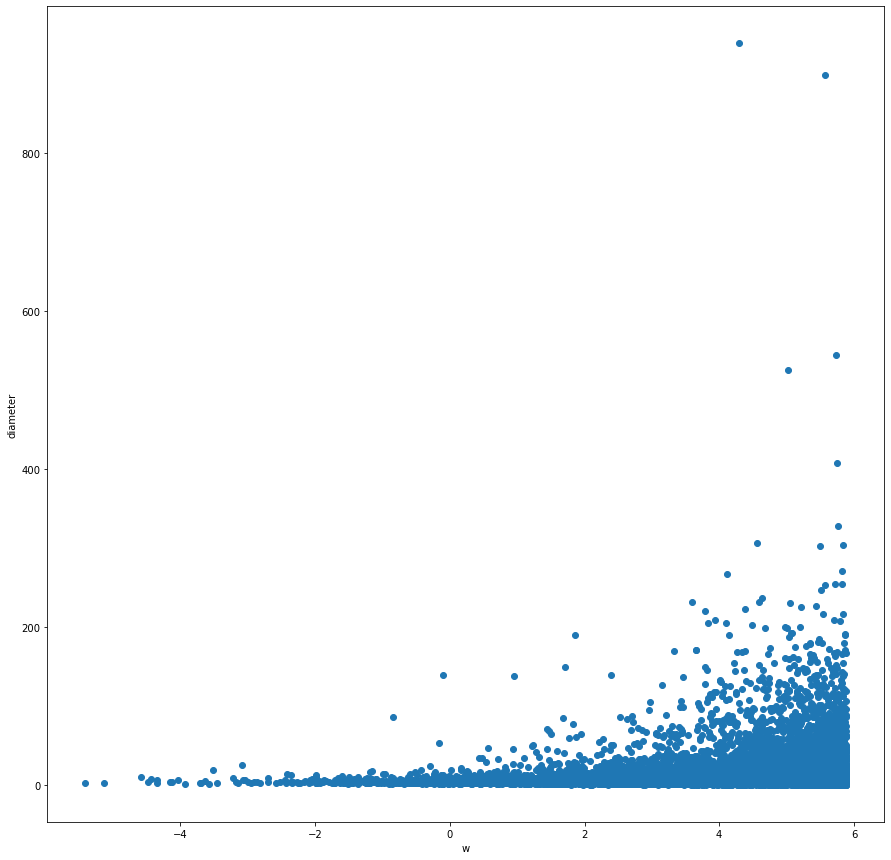

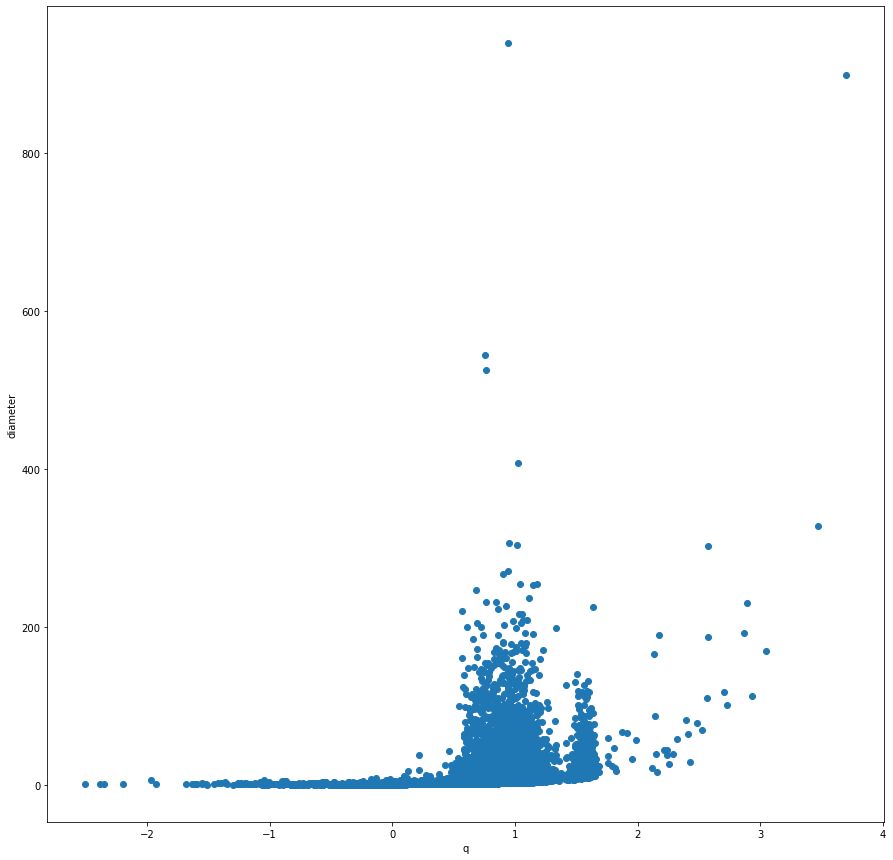

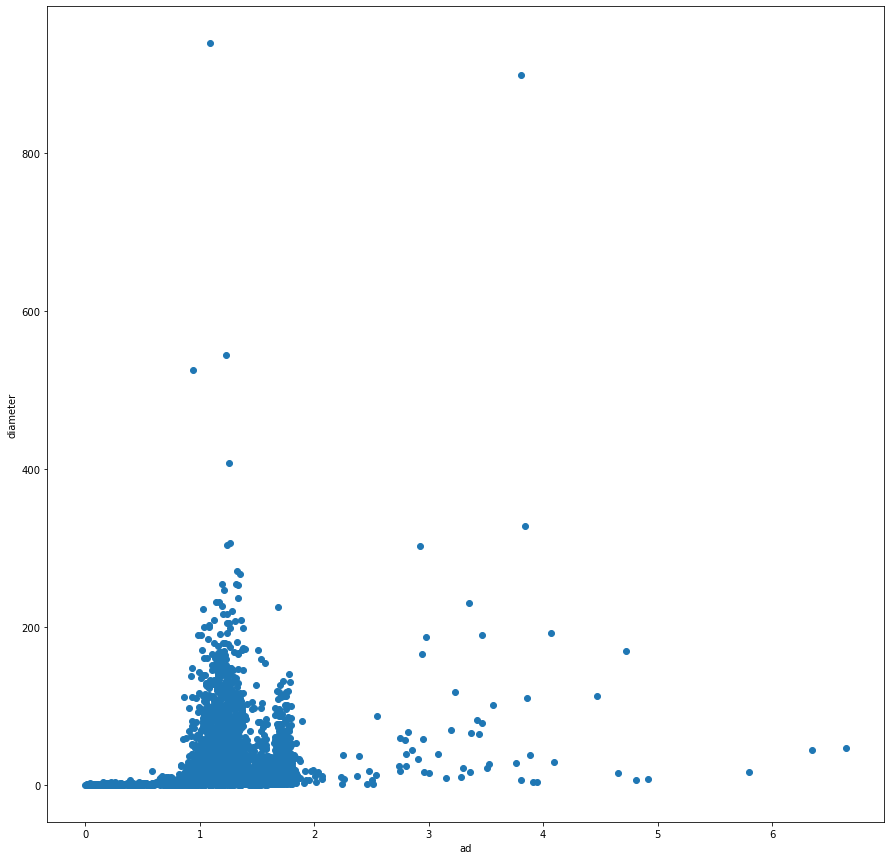

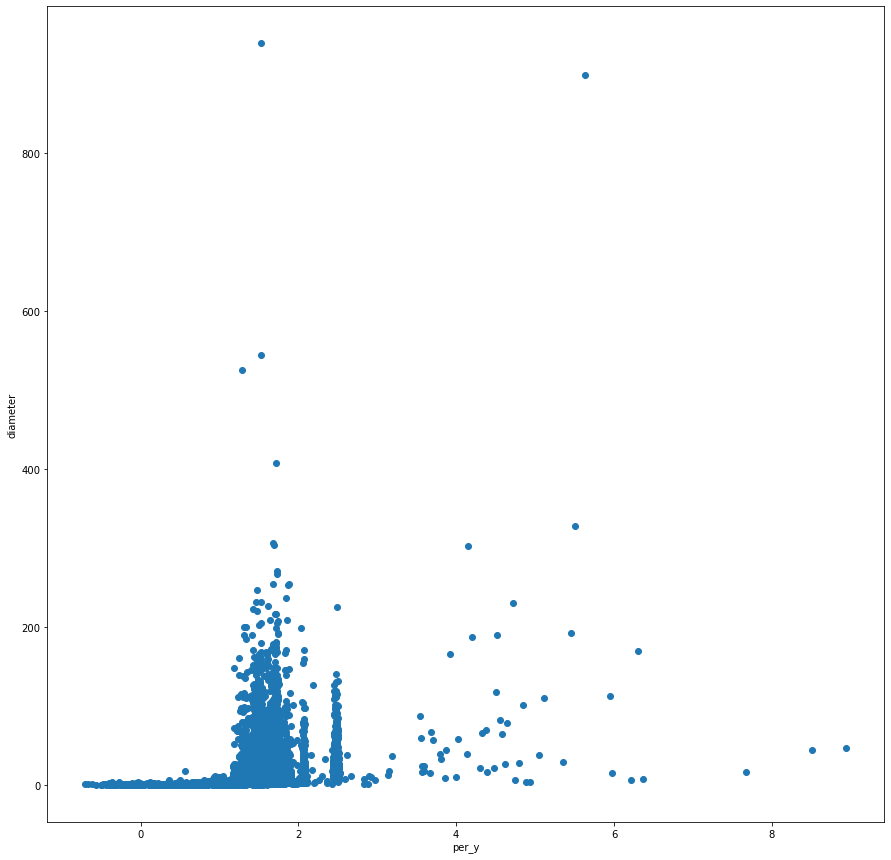

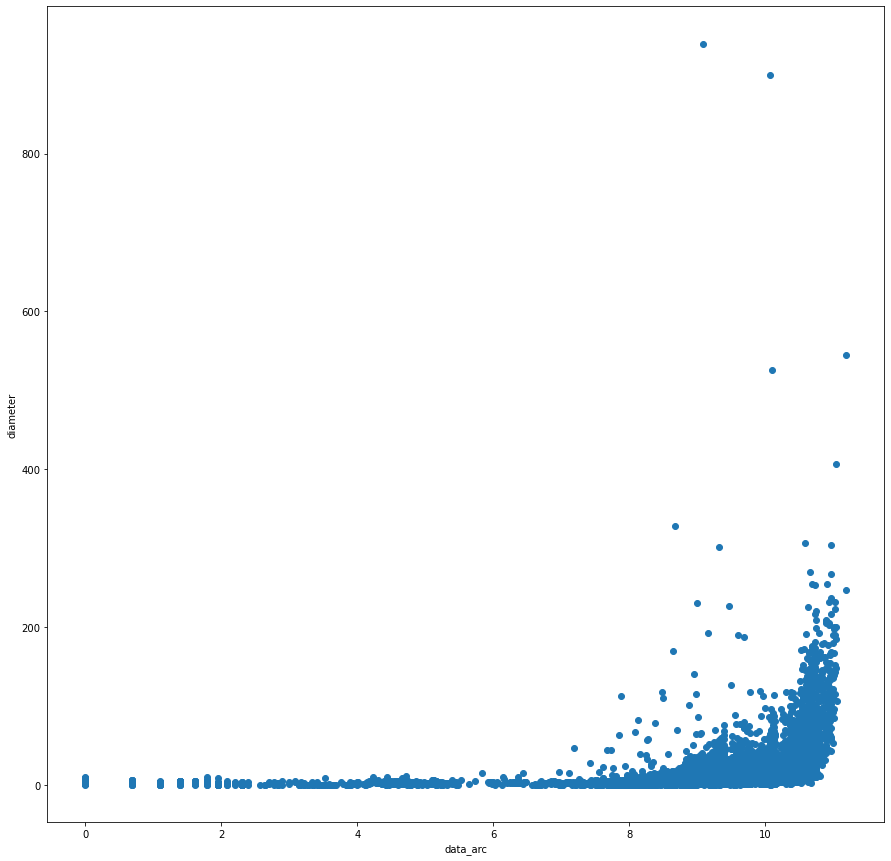

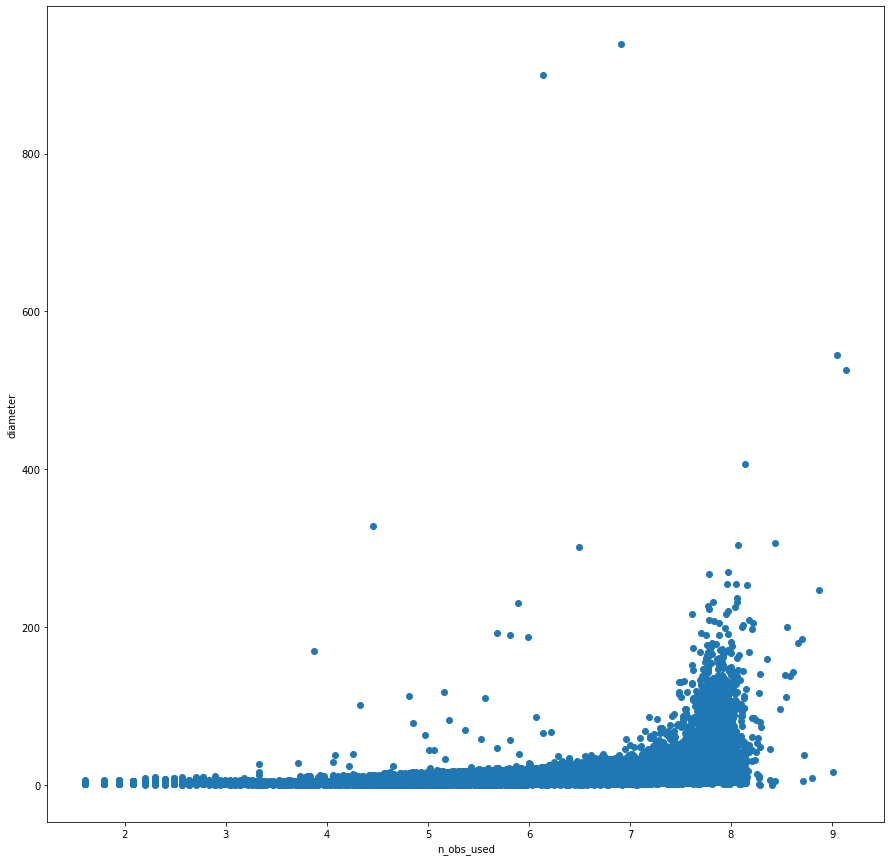

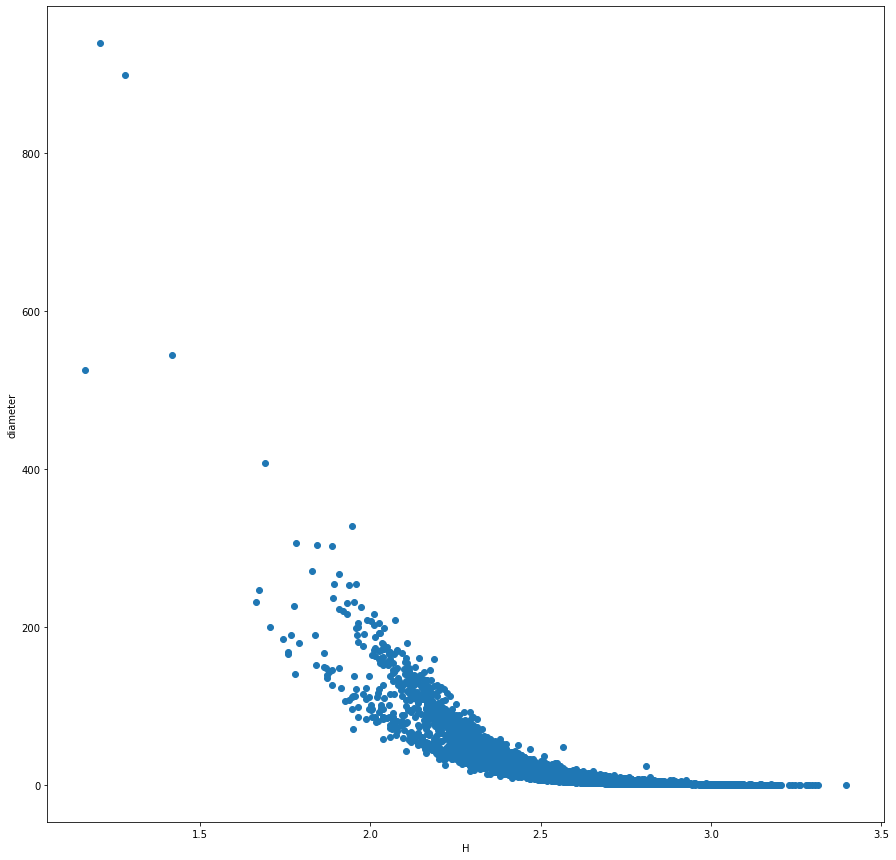

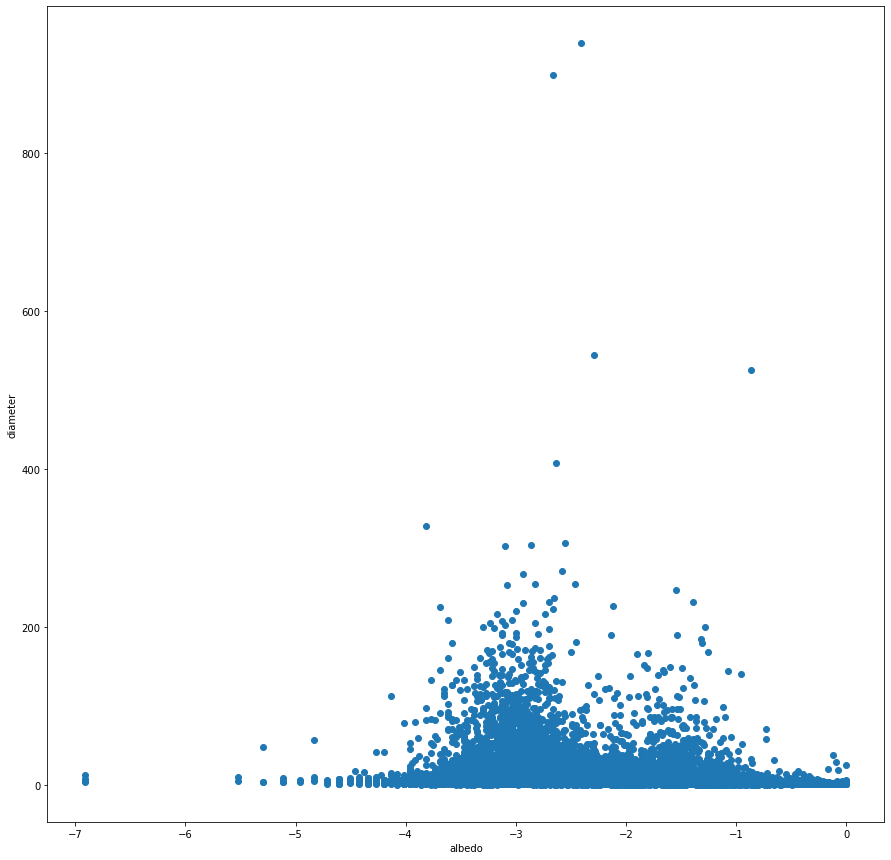

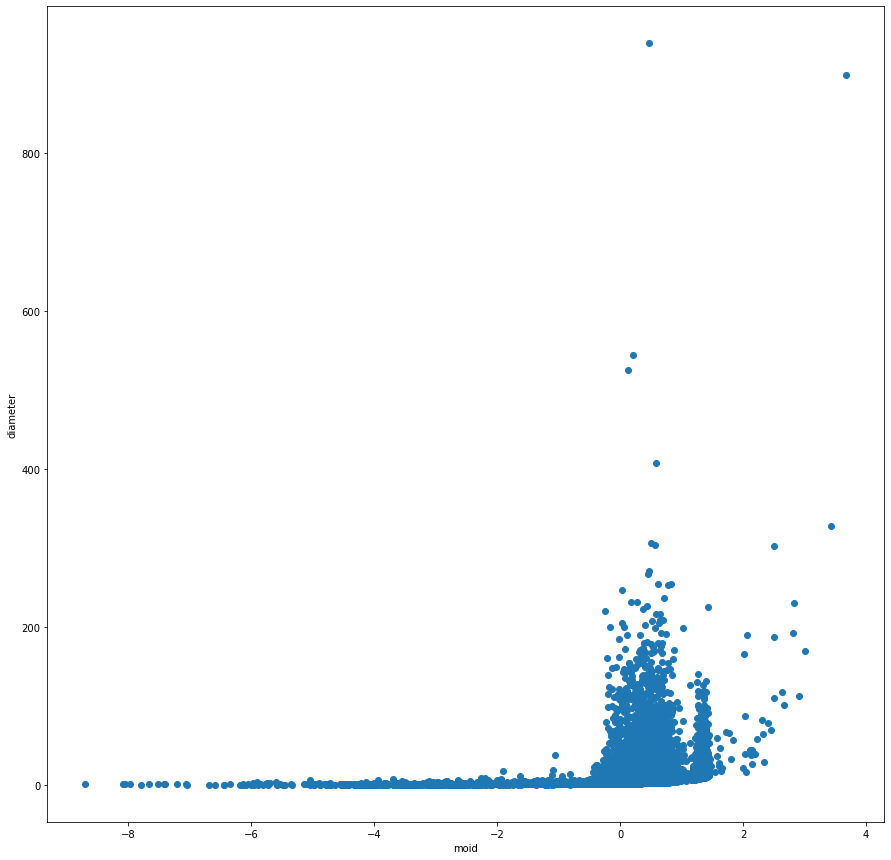

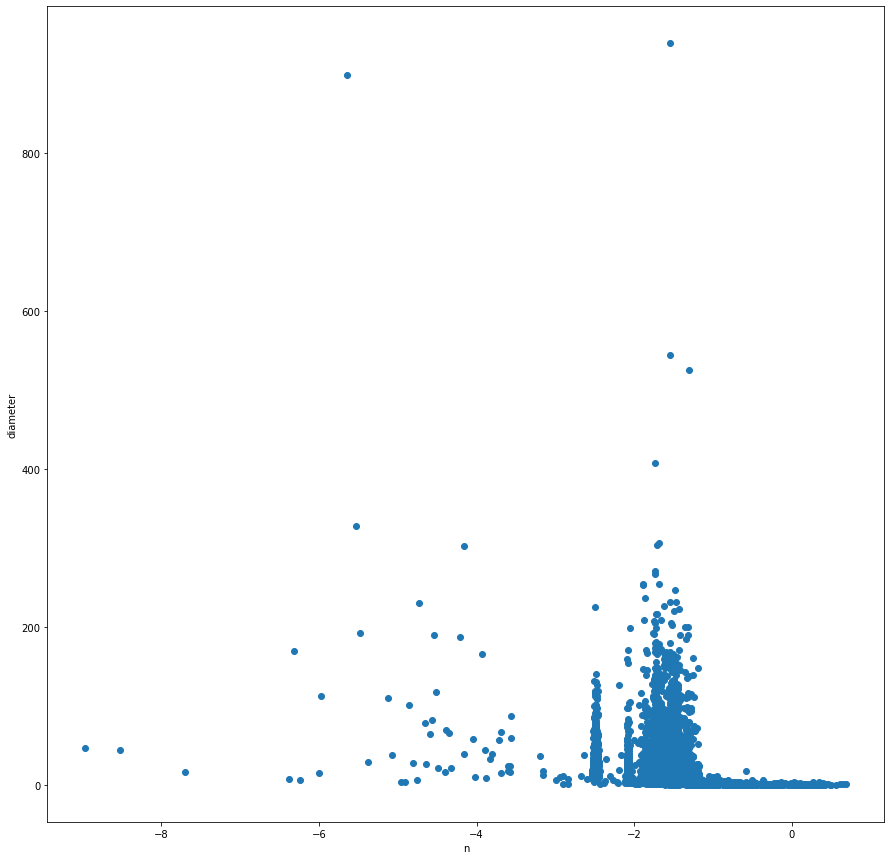

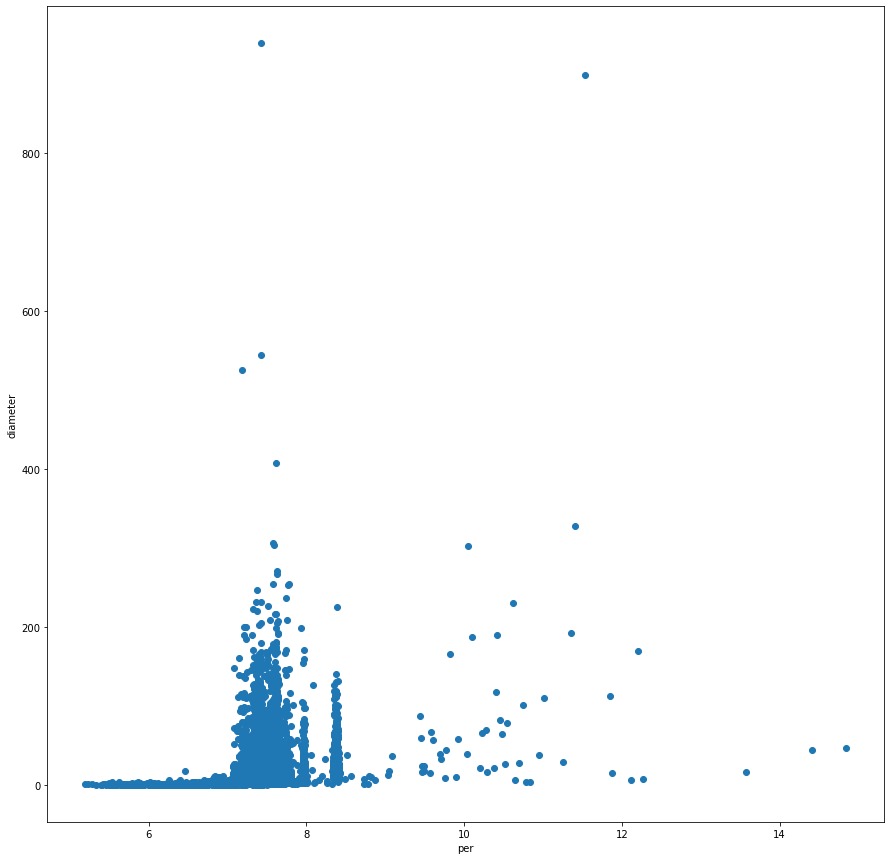

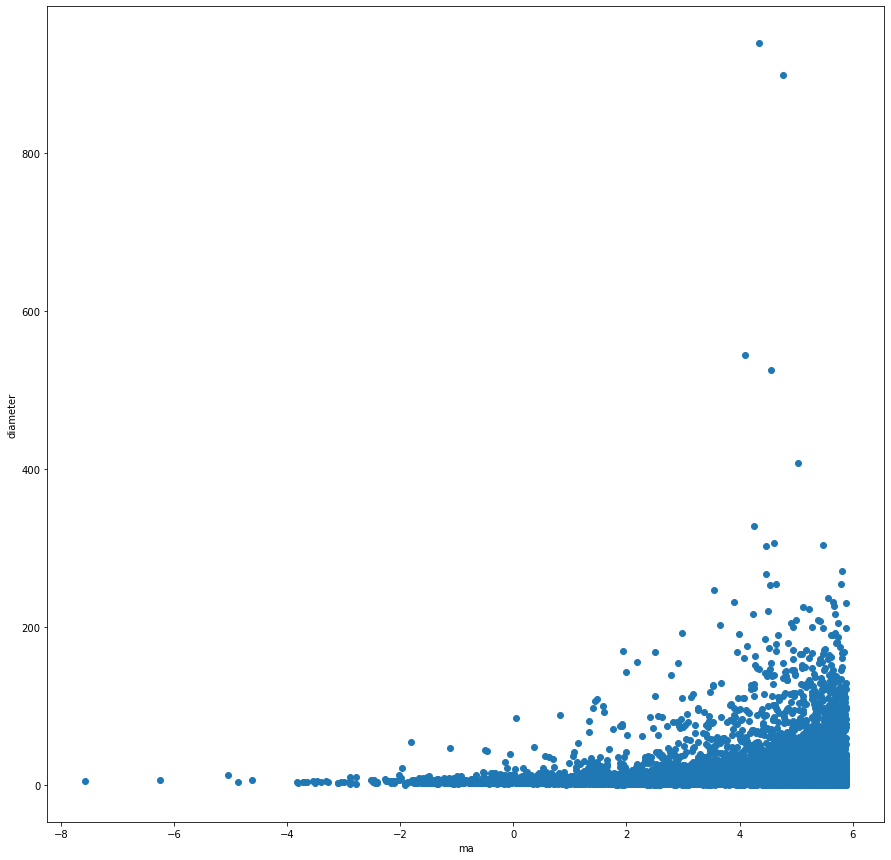

In [44]:
for i in df.columns.values.tolist():
    if i!="diameter" and str(df[i].dtype) in ['int64', 'float64', 'datetime']:
        plt.figure(figsize=(15,15))
        plt.scatter(np.log(df[i]),df['diameter'])
        plt.xlabel(i)
        plt.ylabel('diameter')
        plt.show()

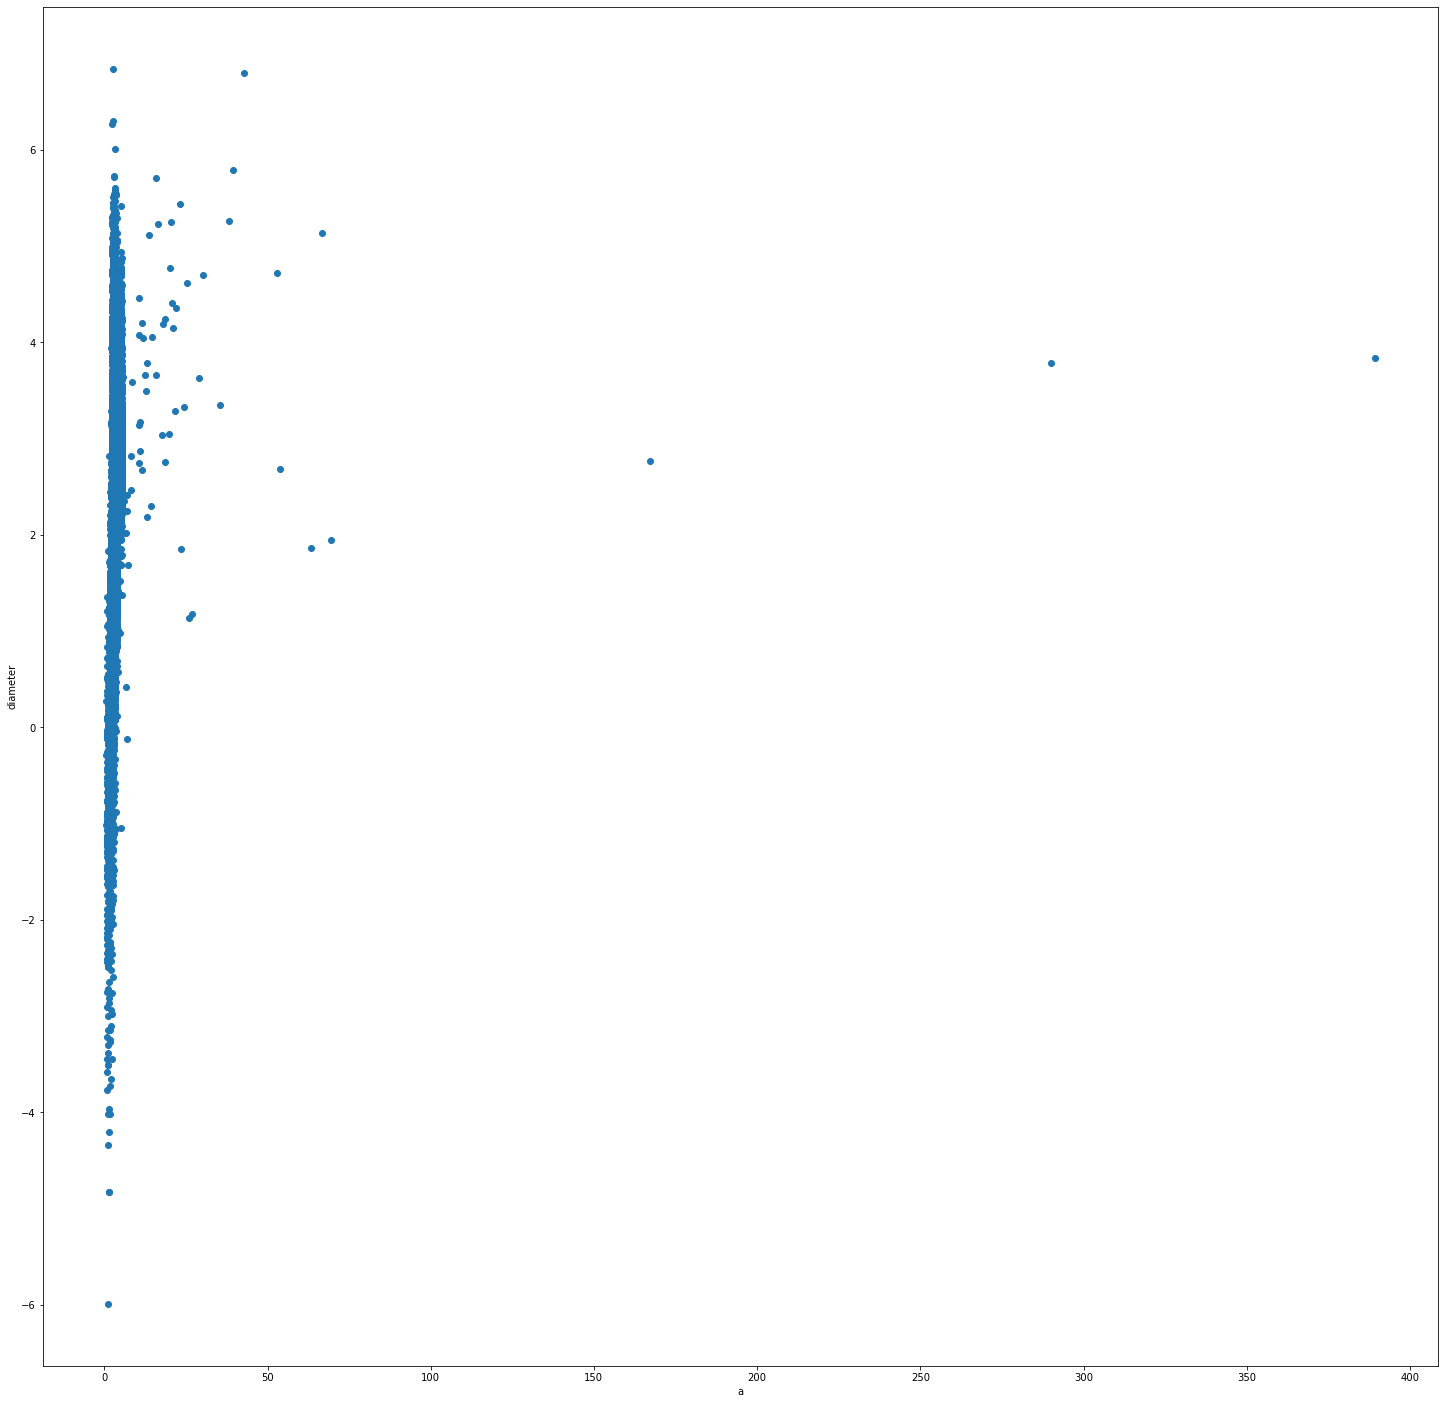

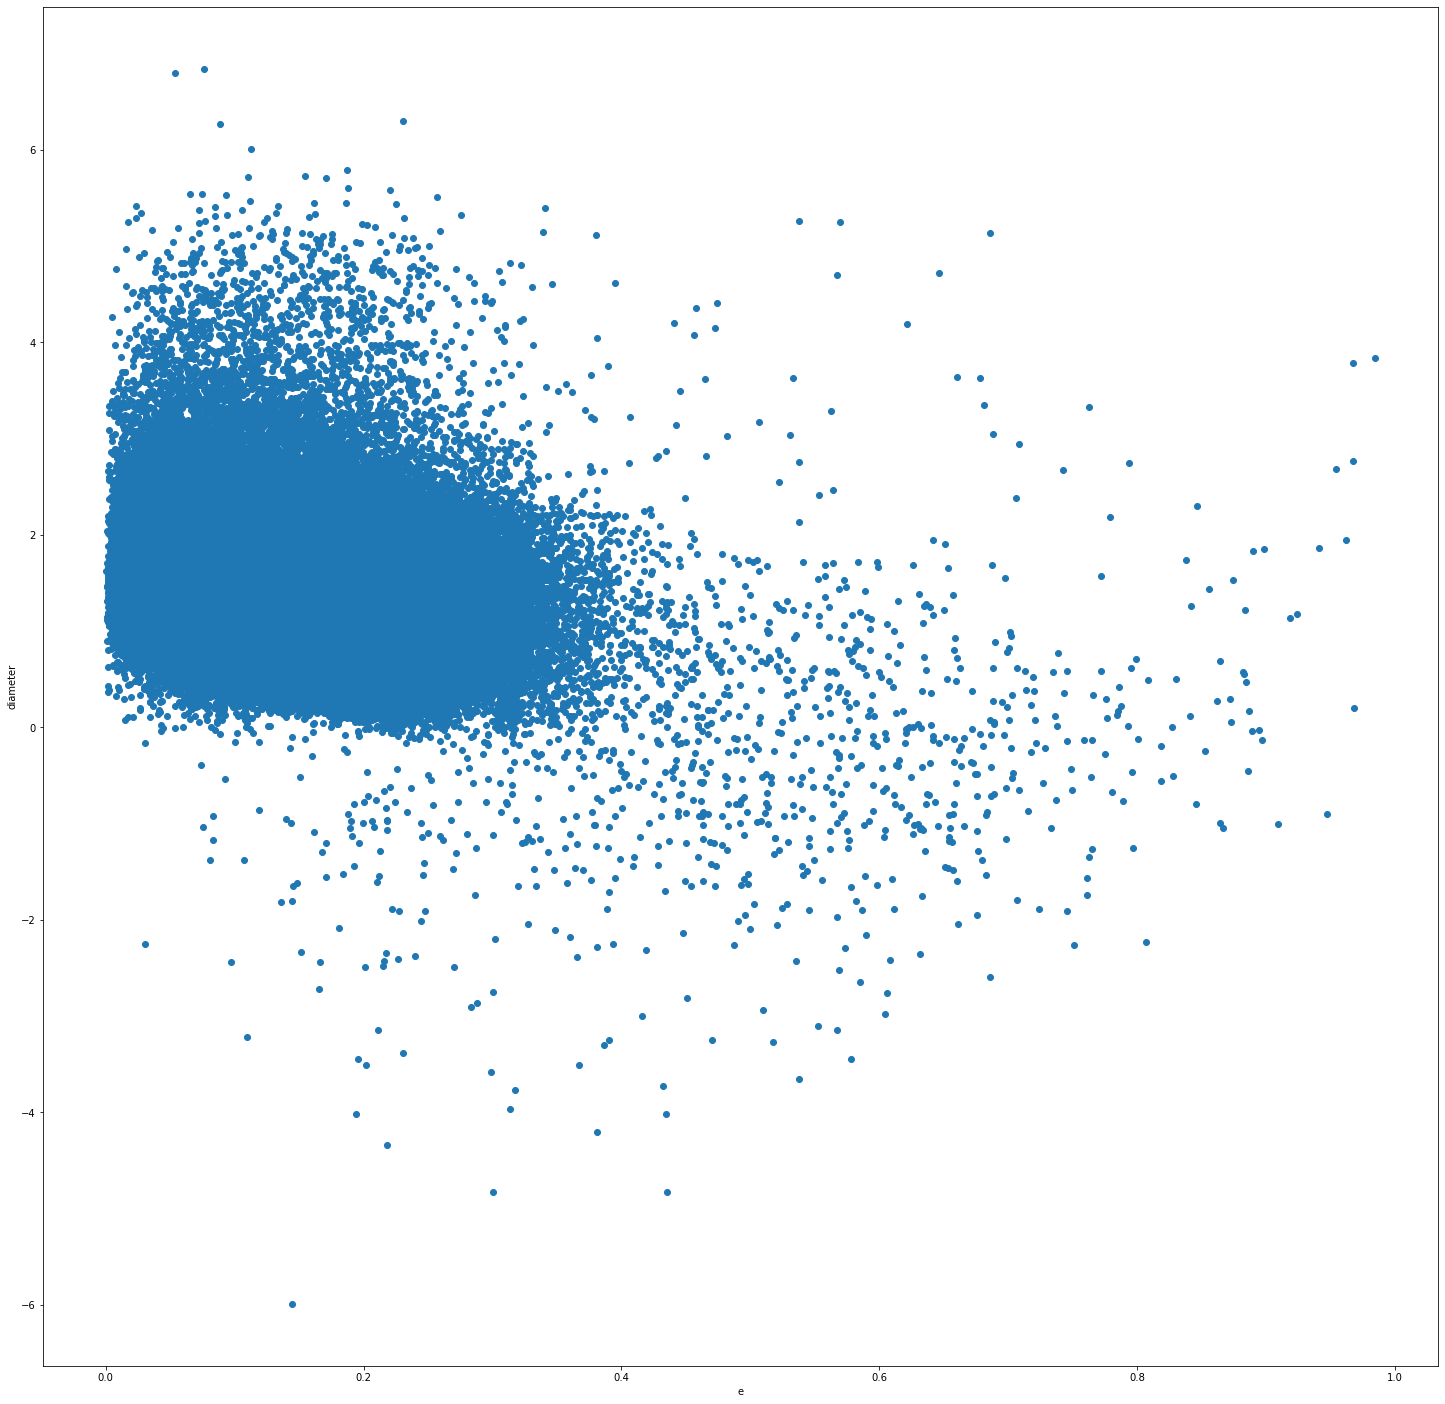

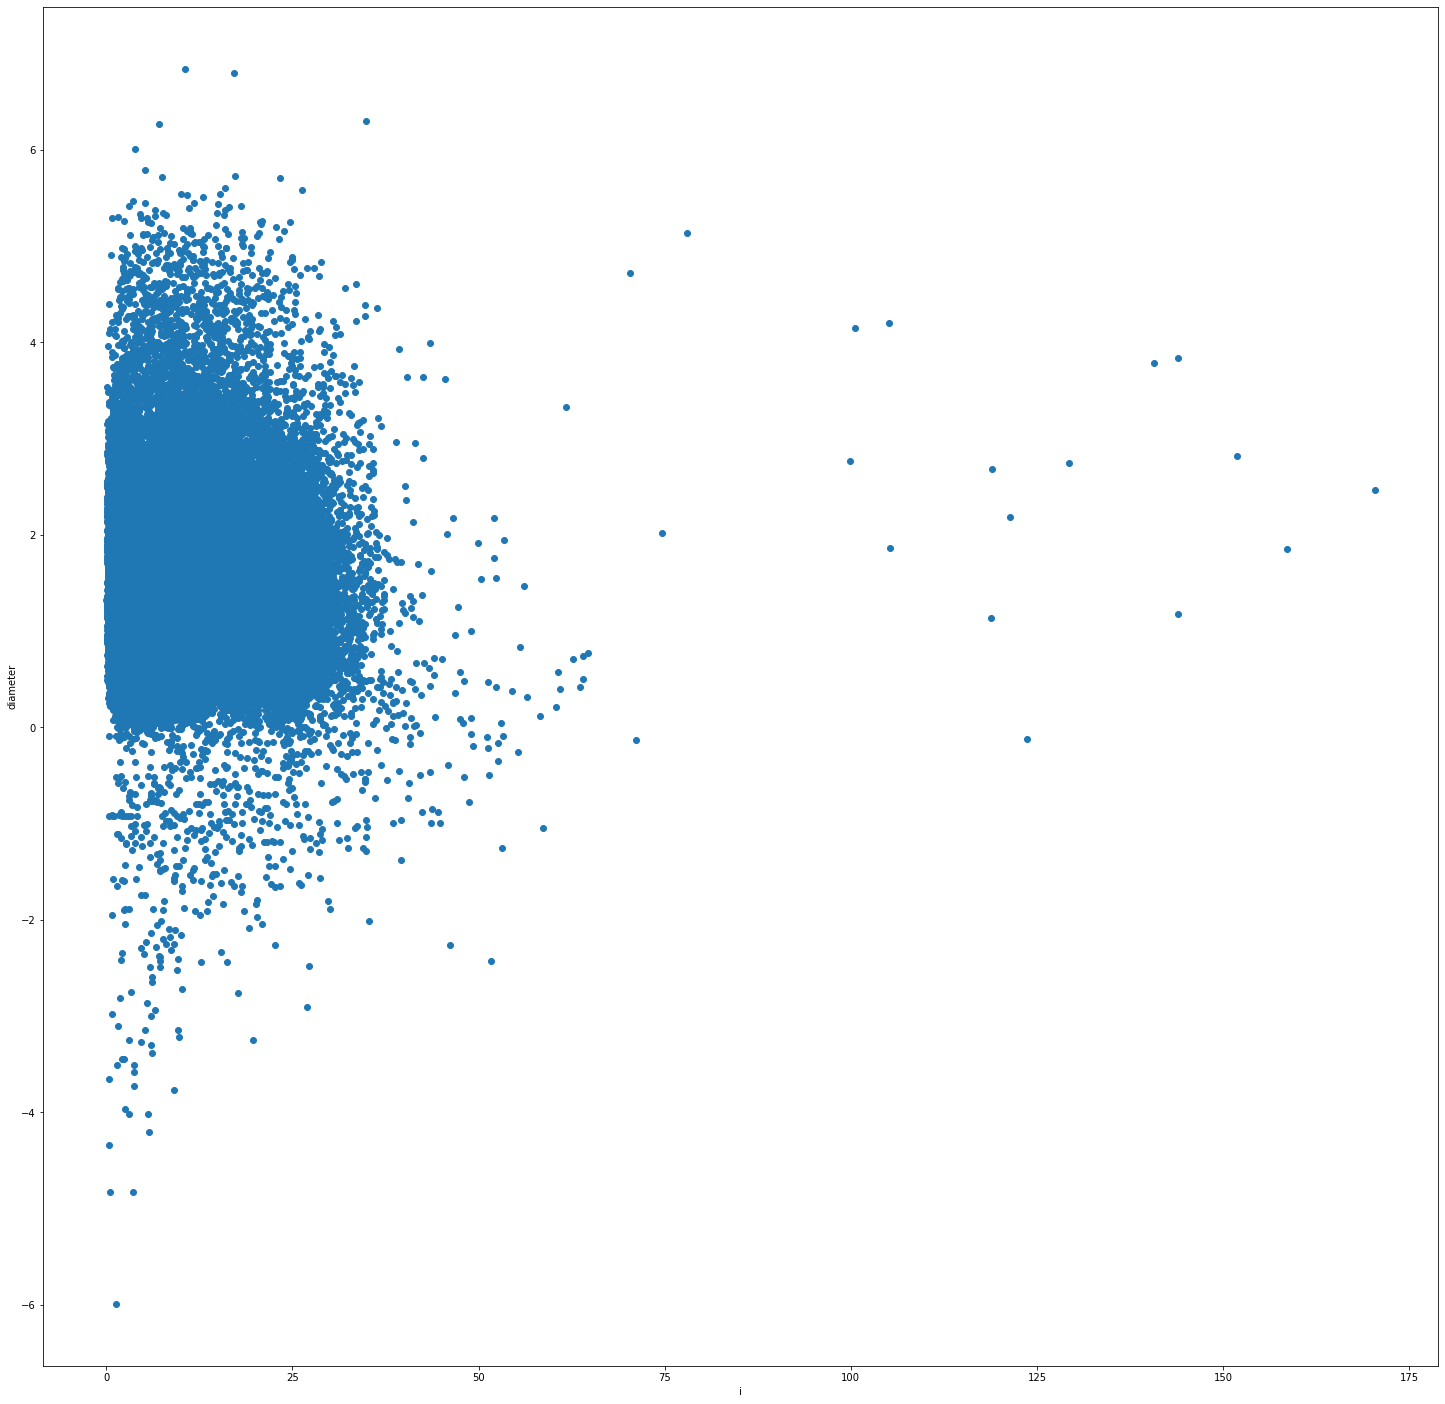

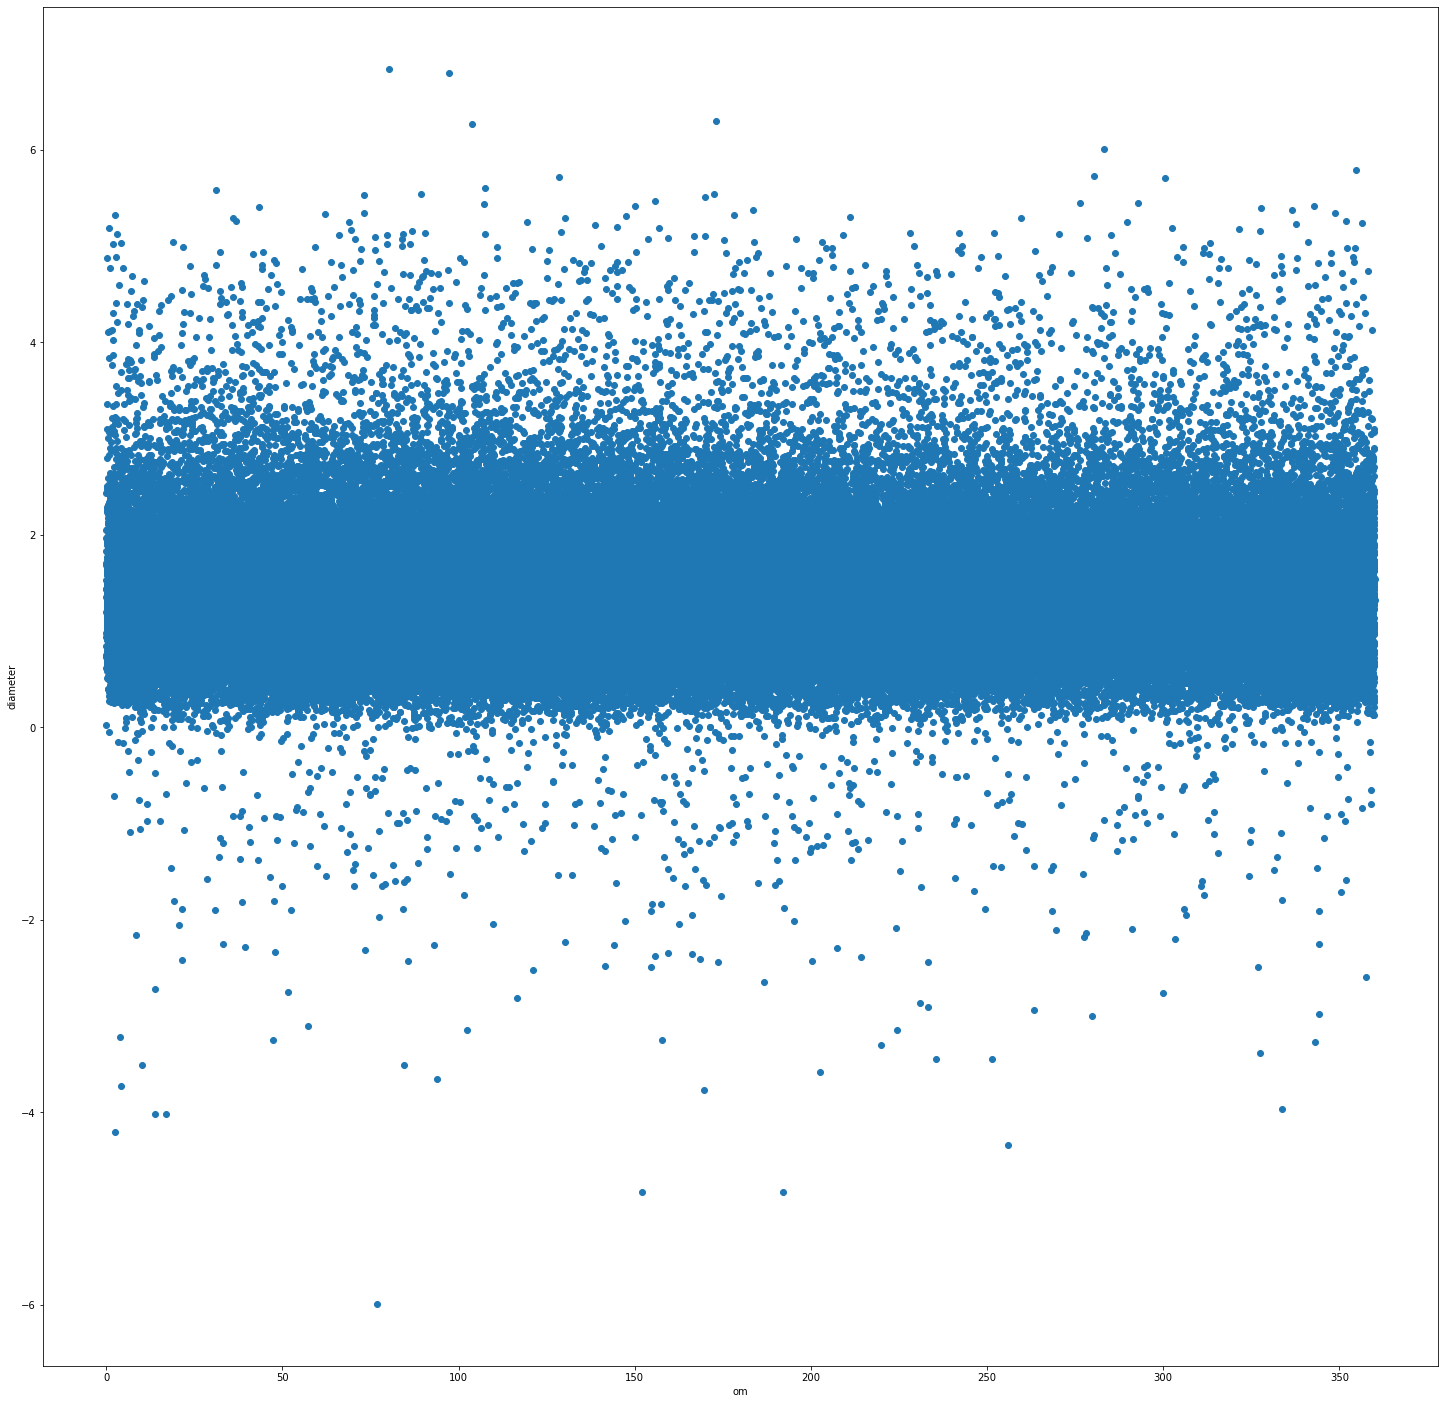

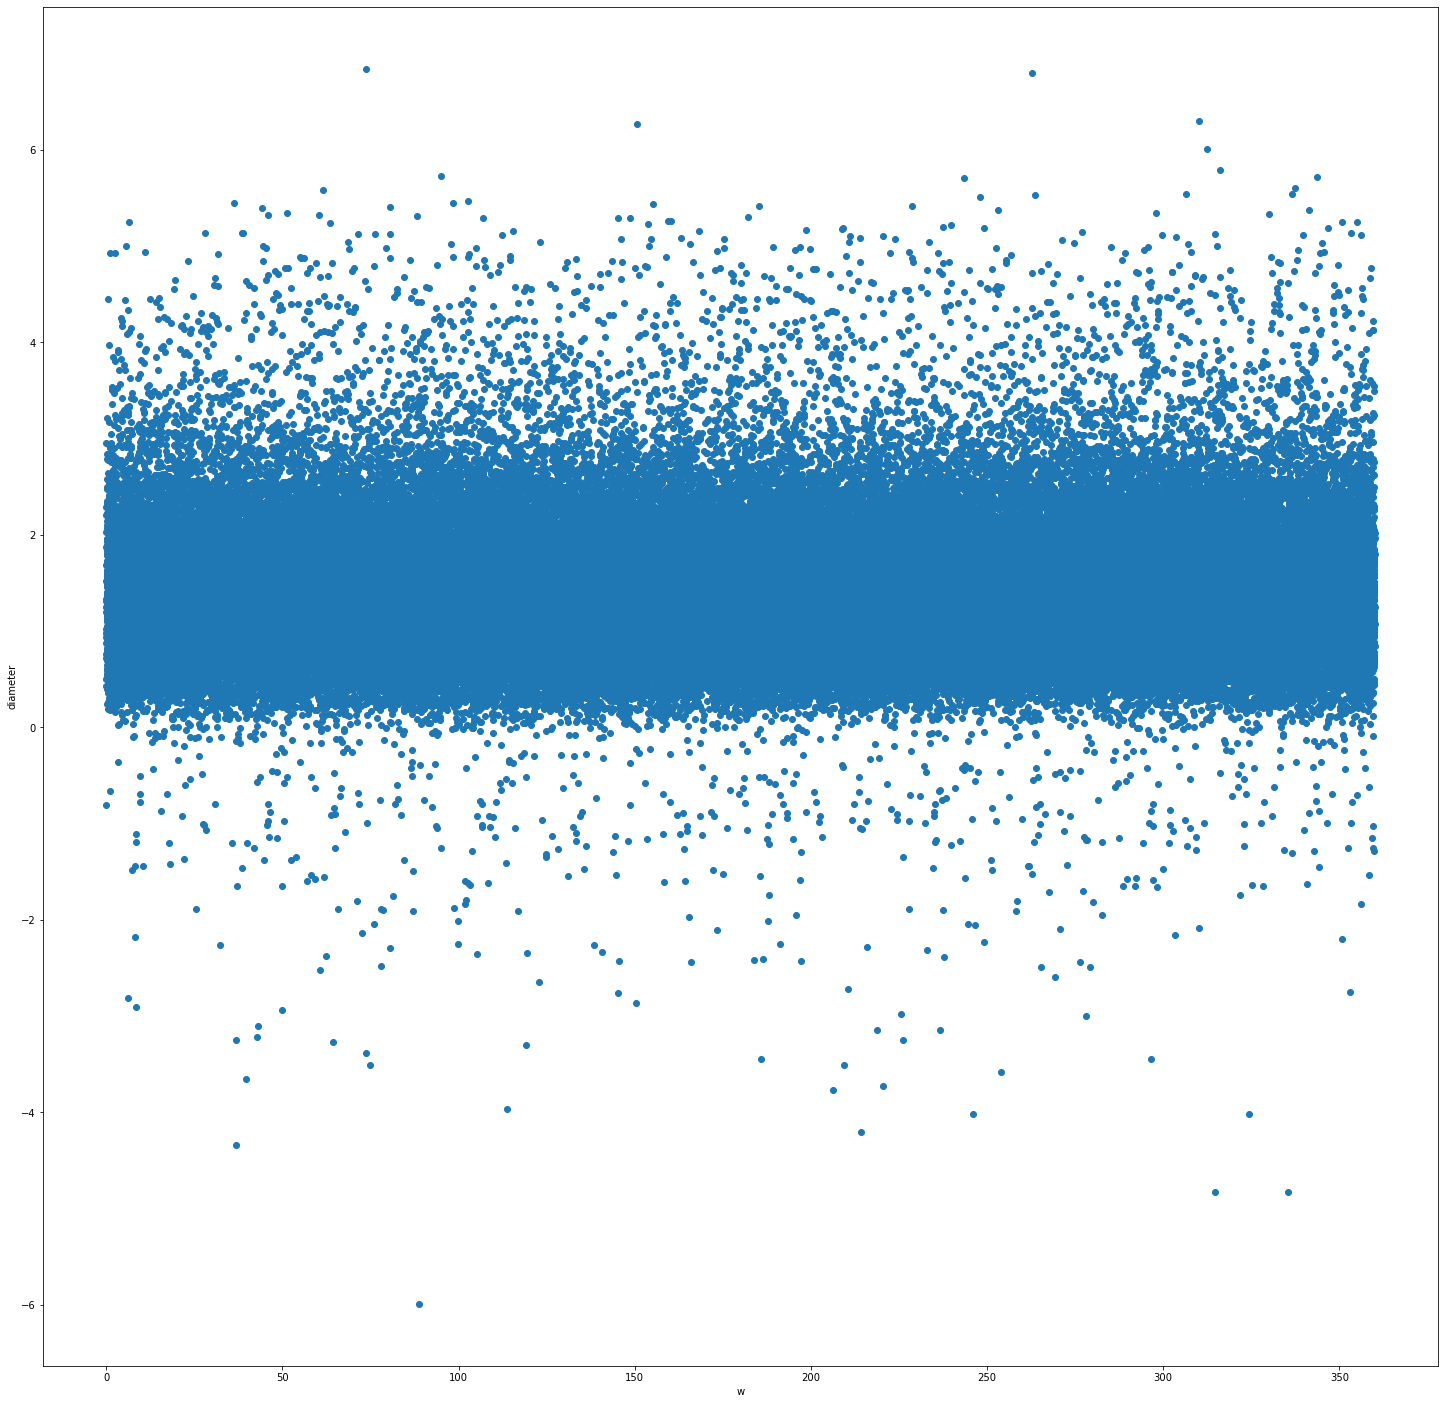

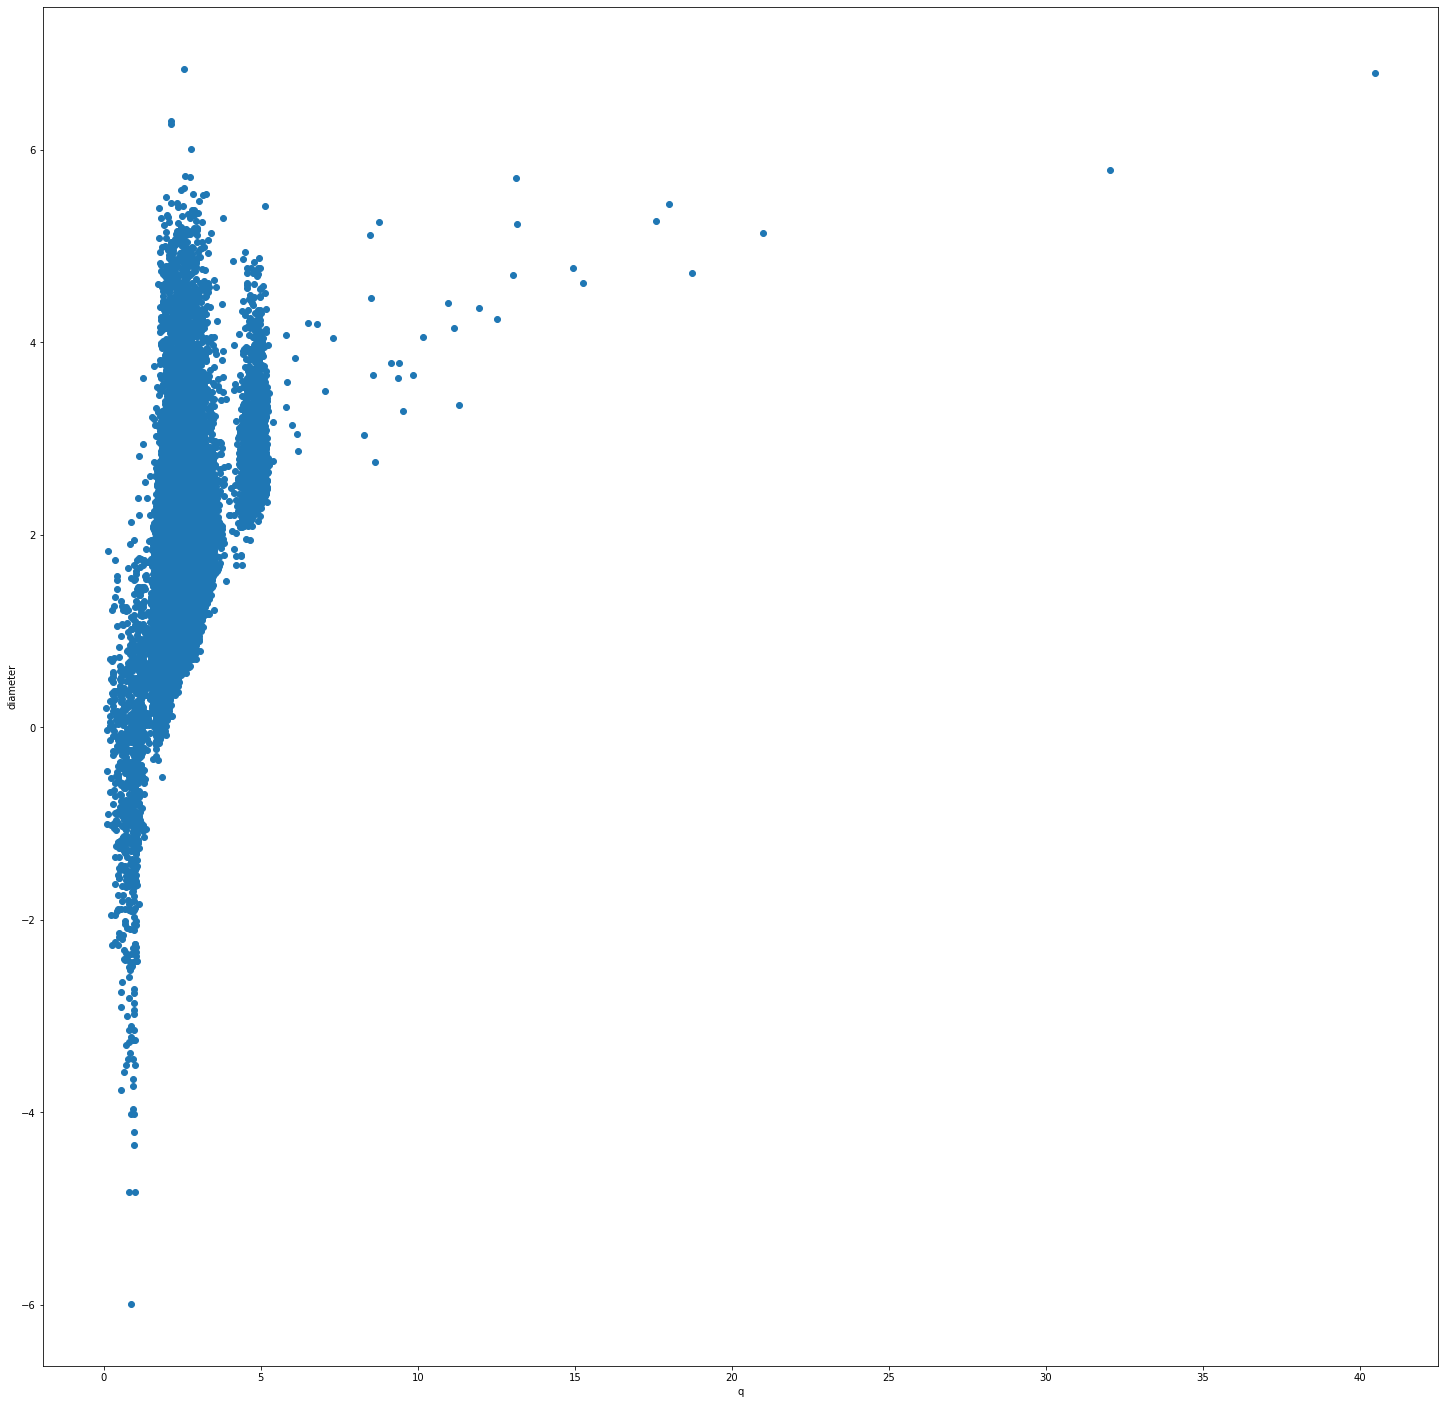

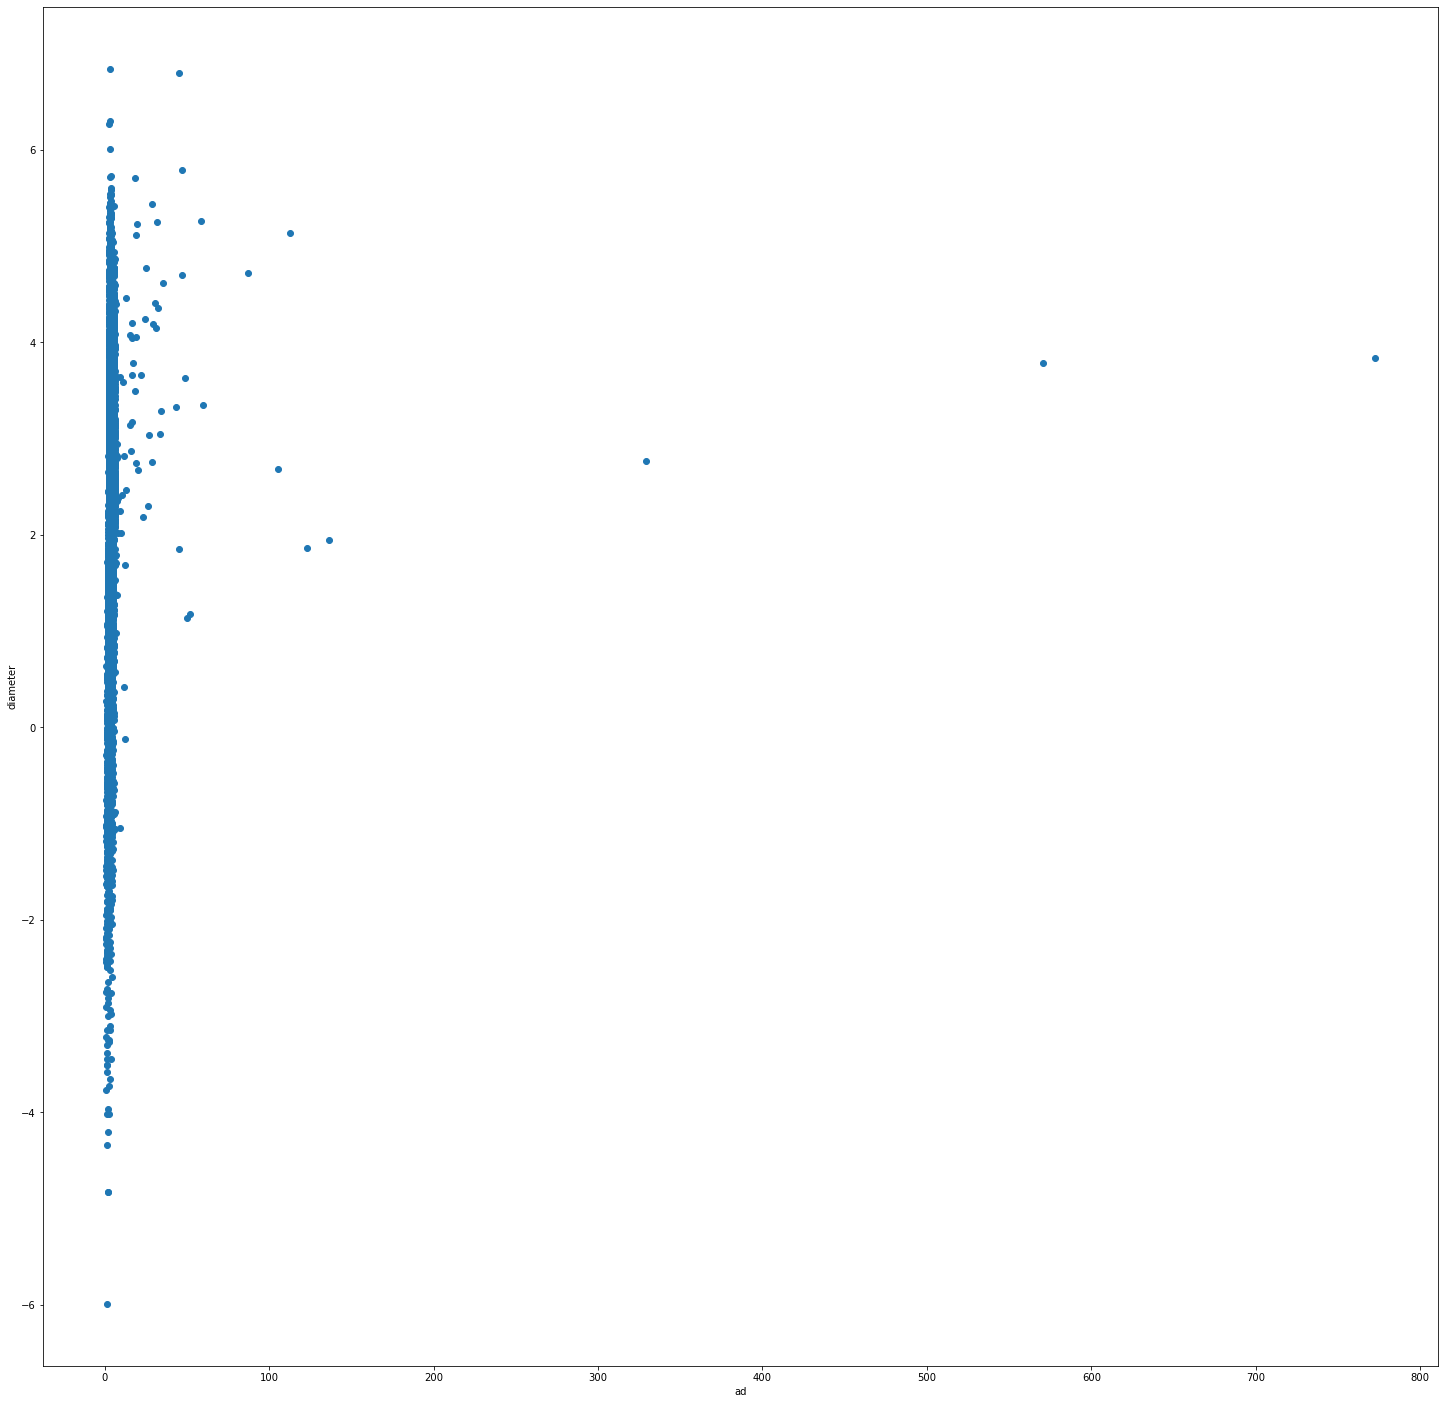

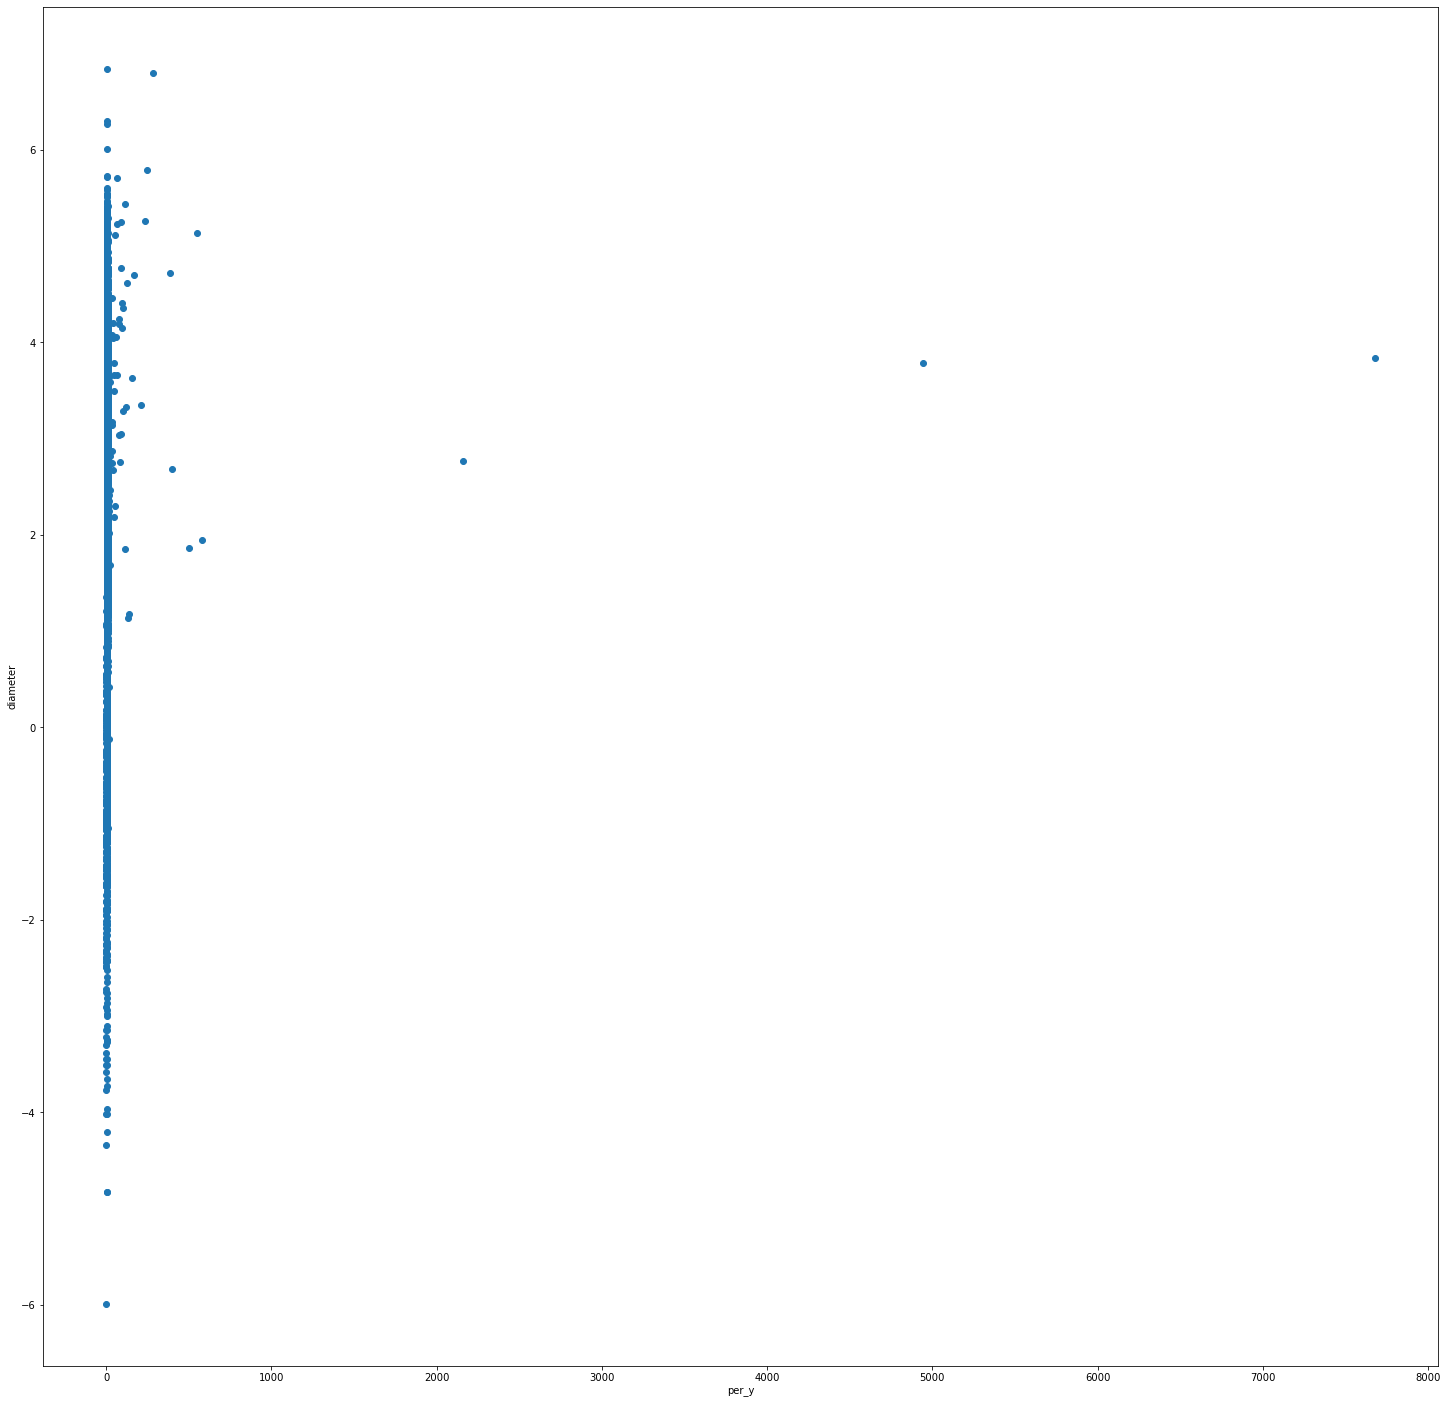

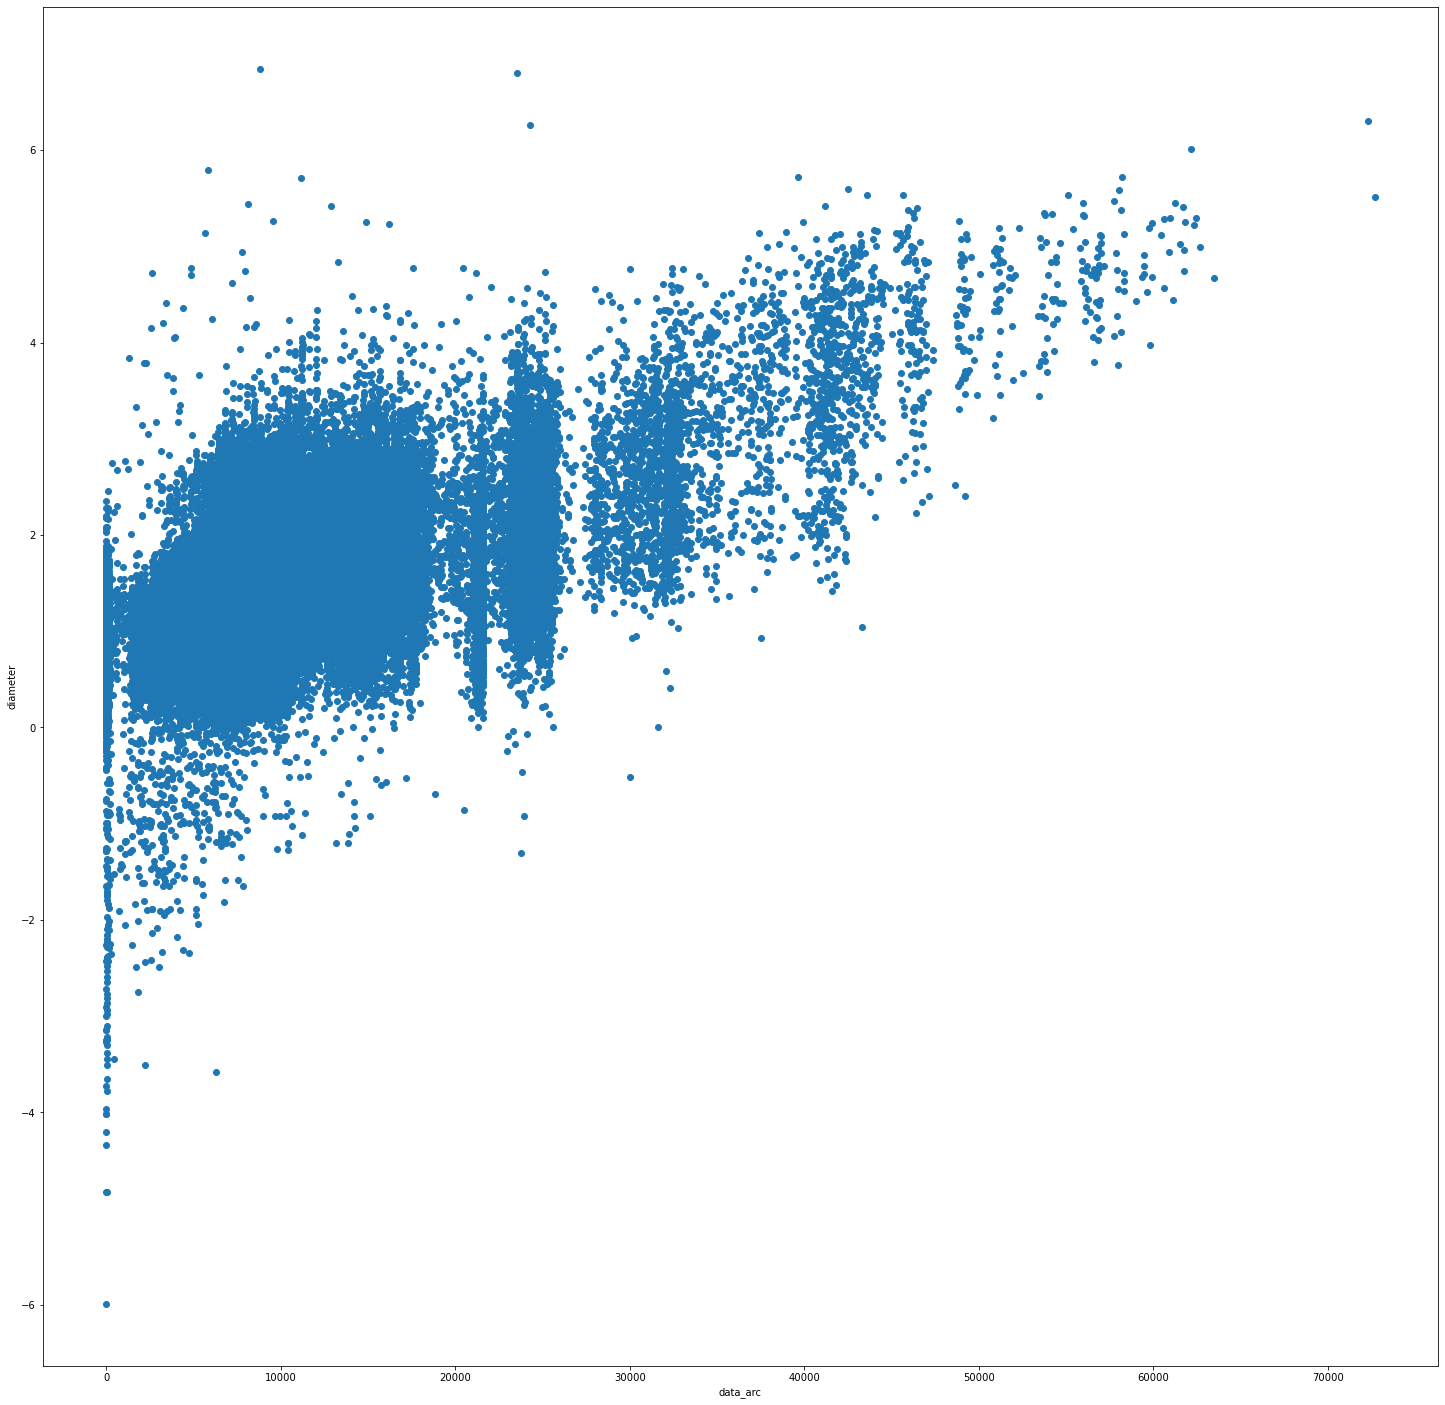

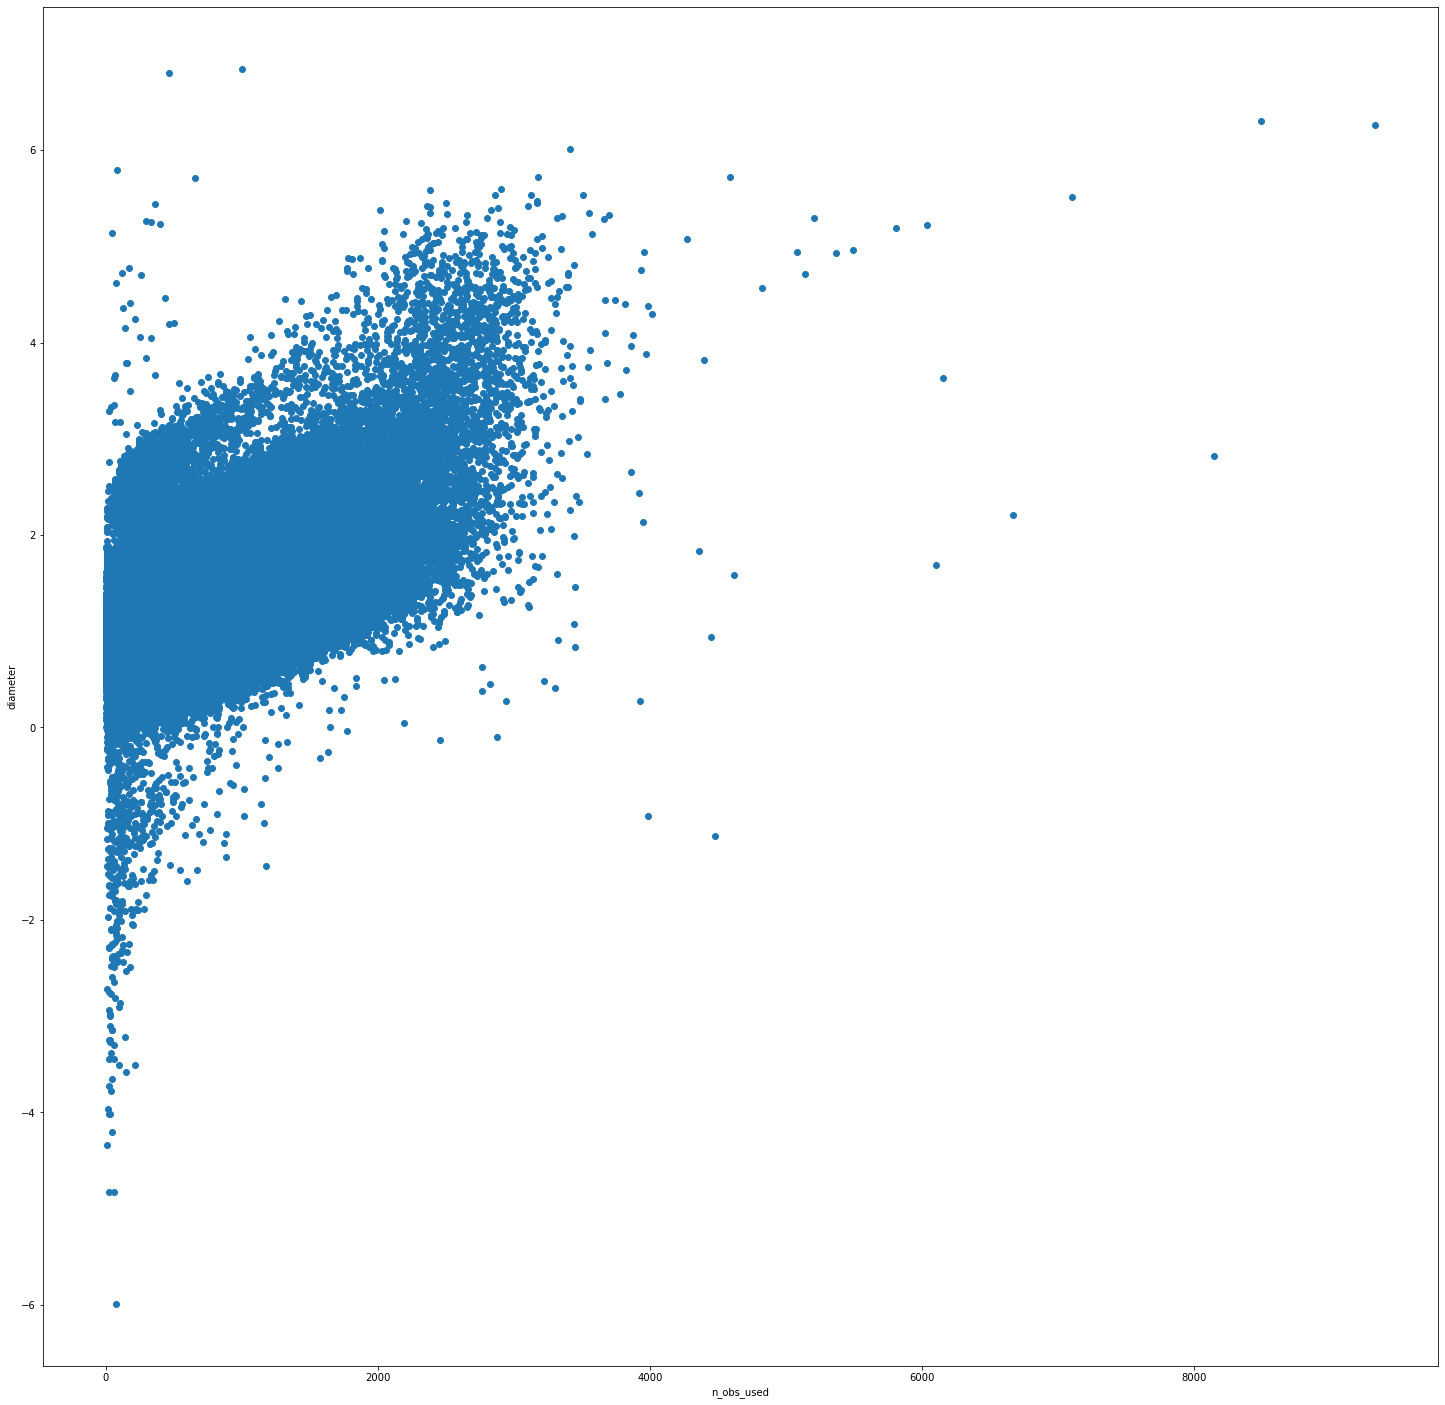

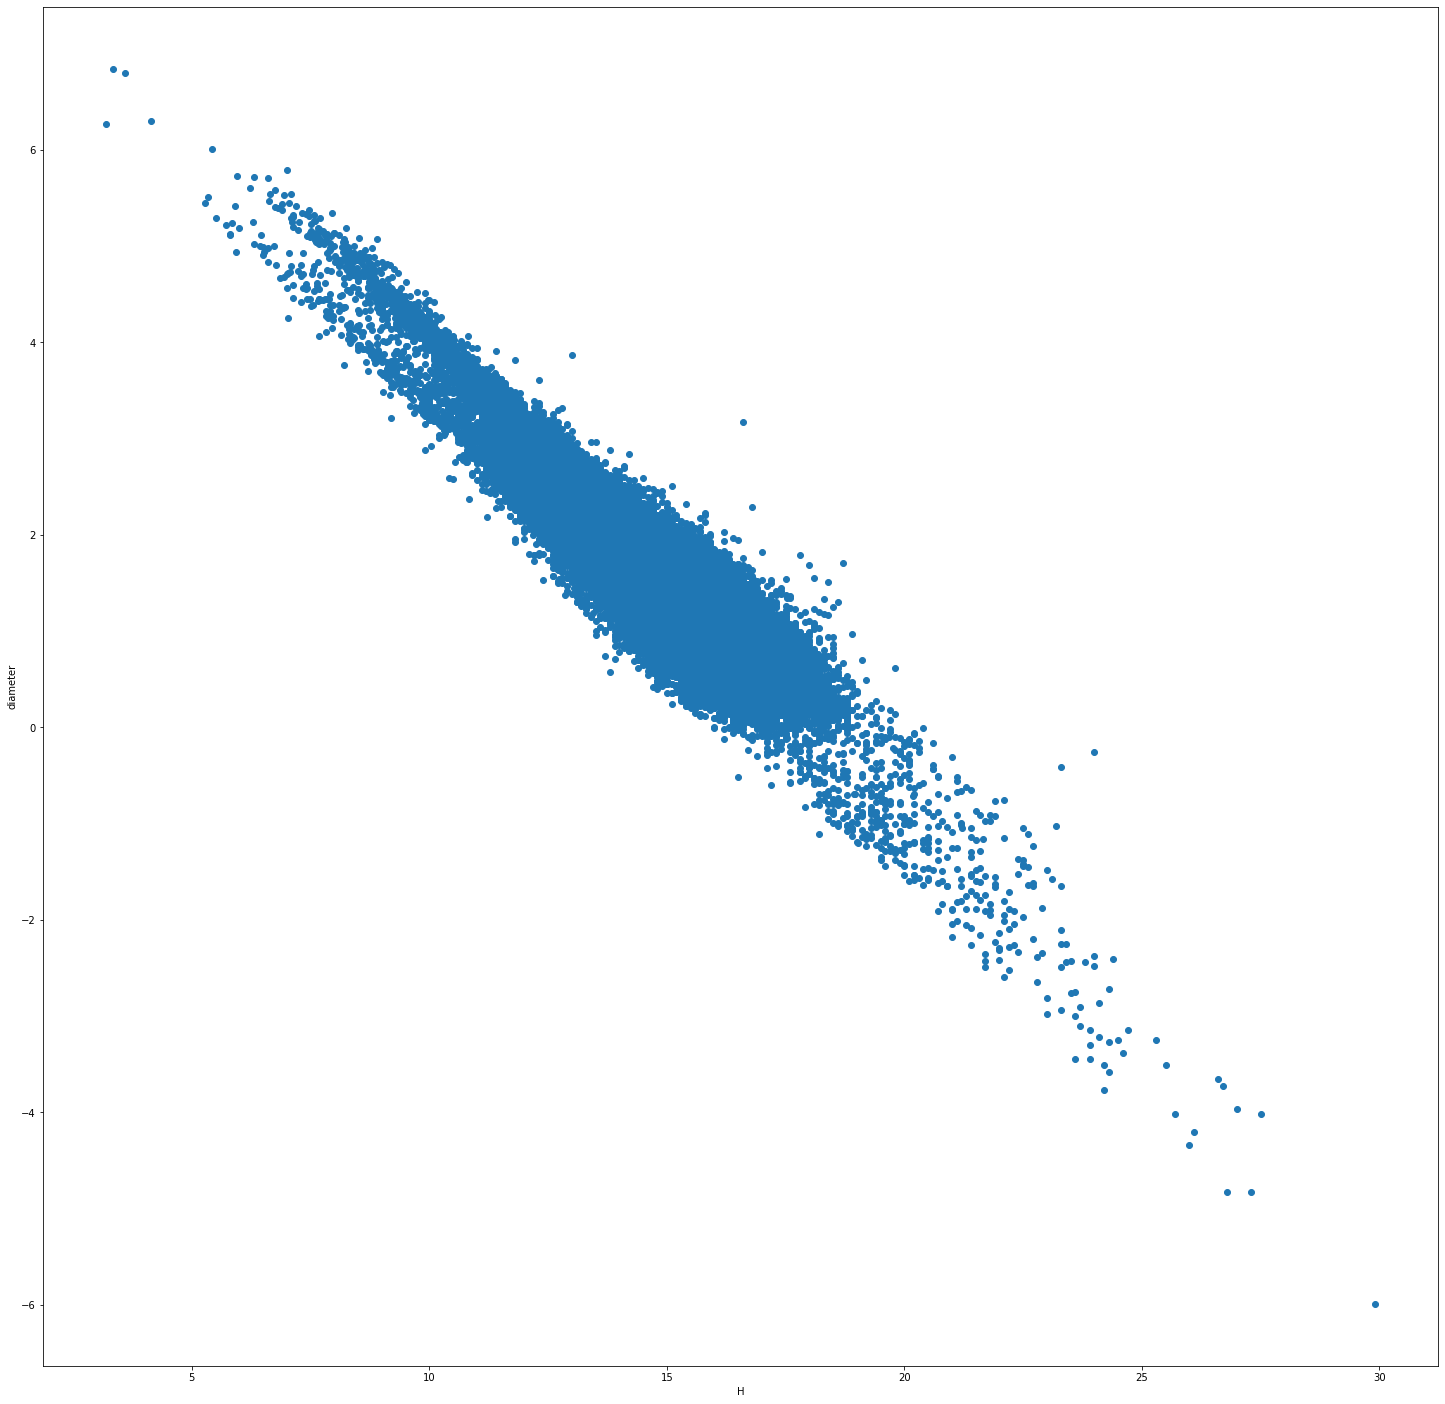

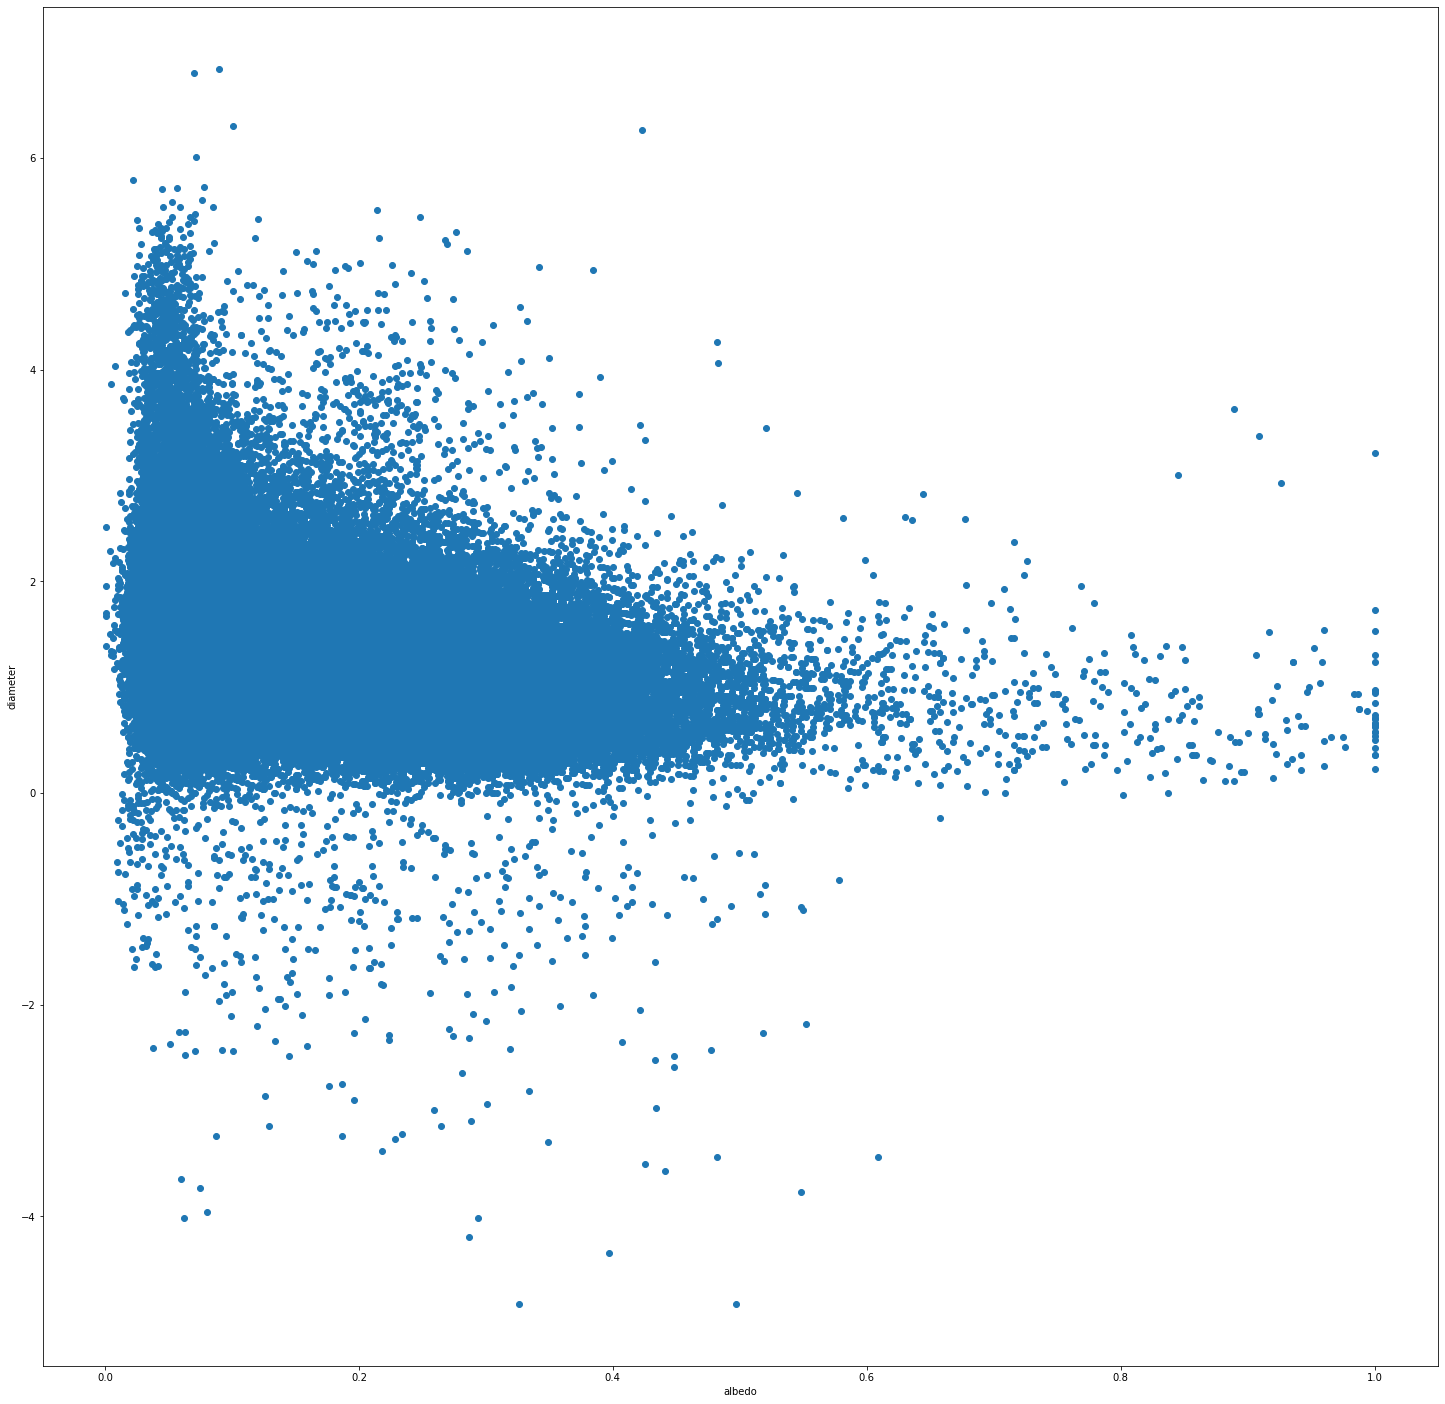

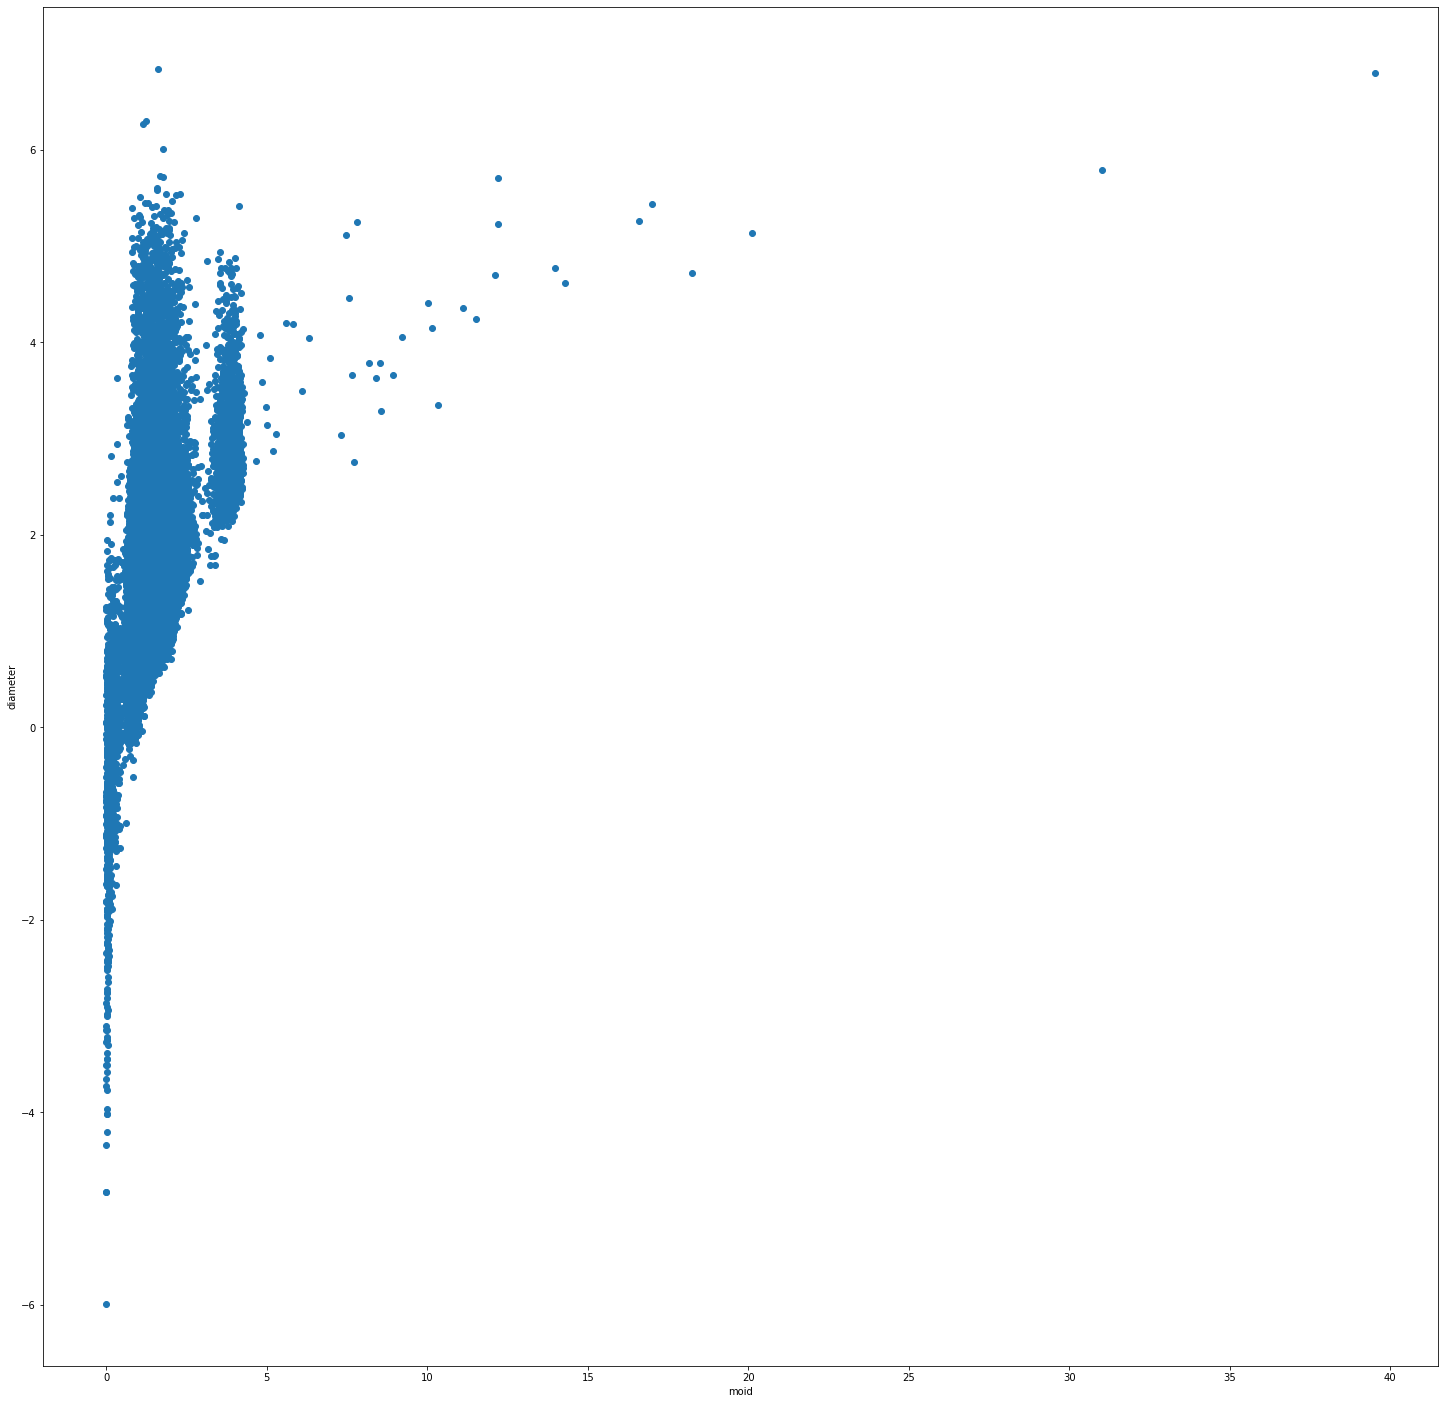

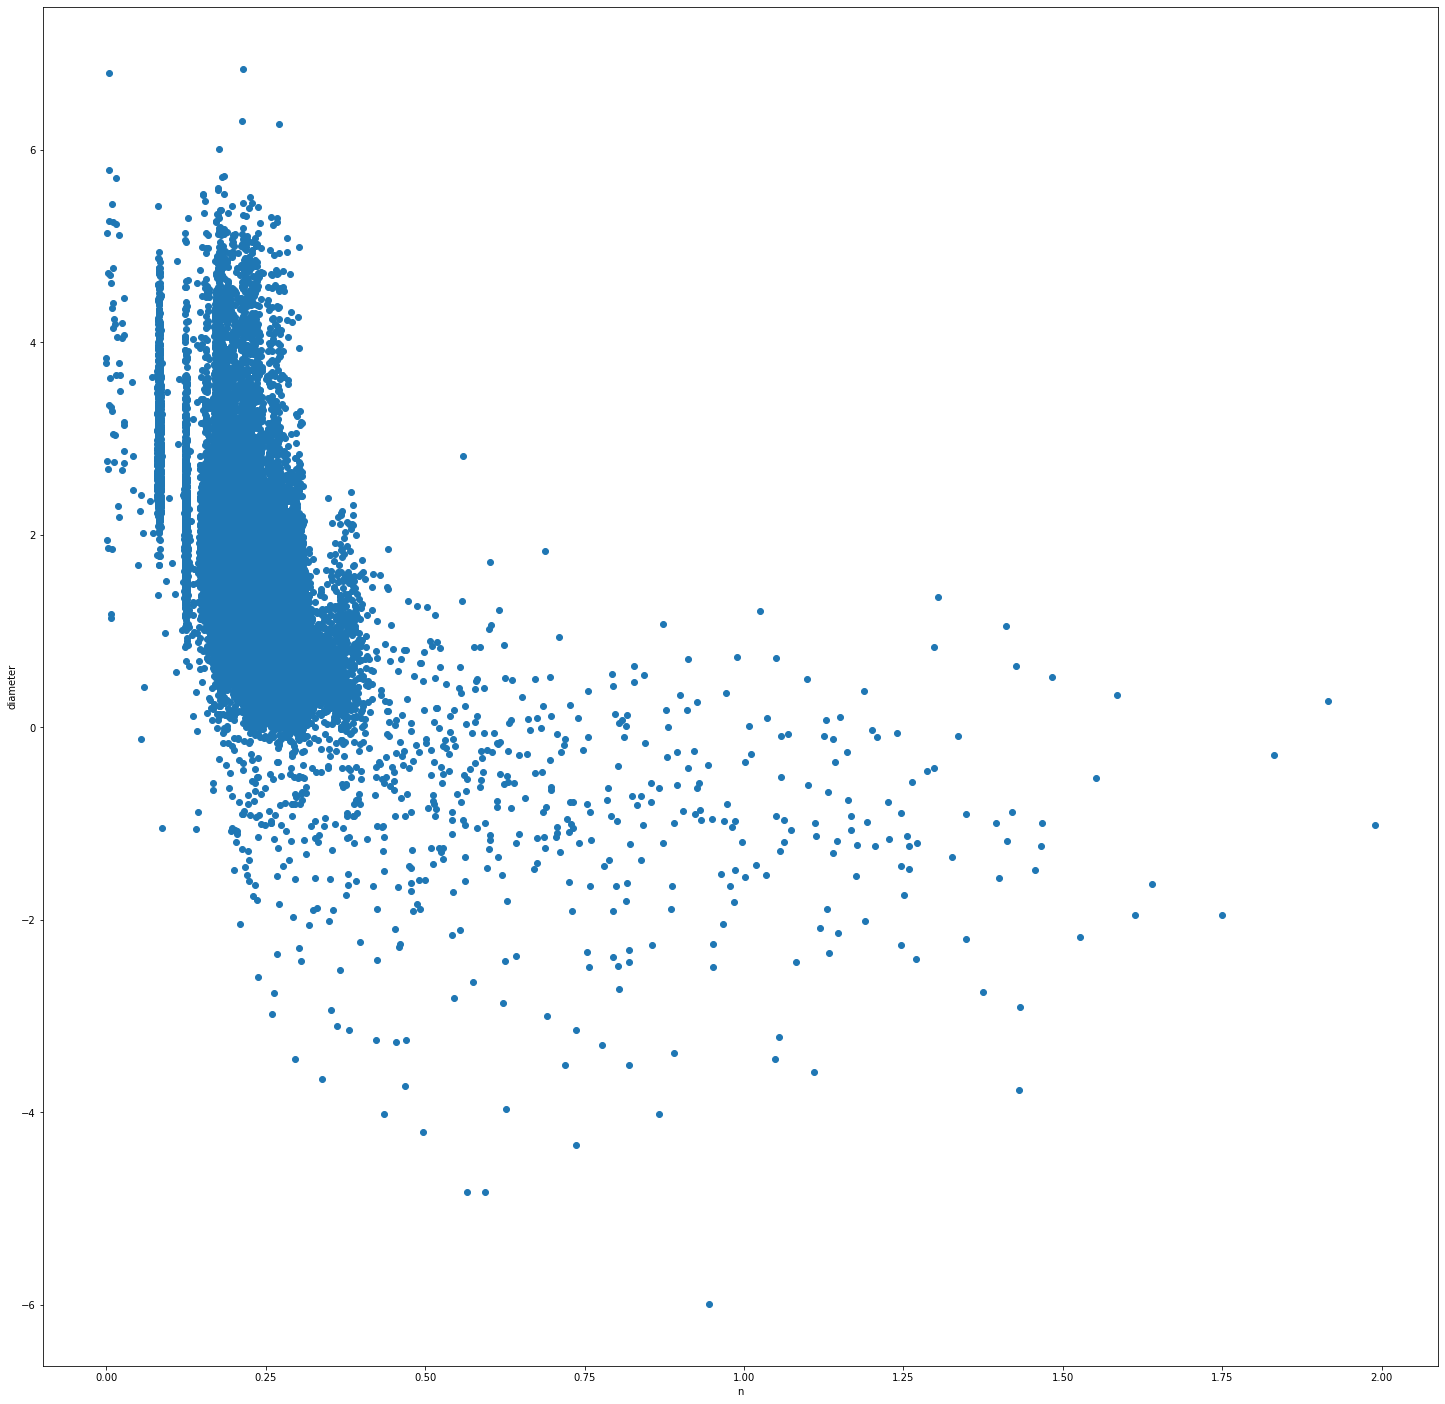

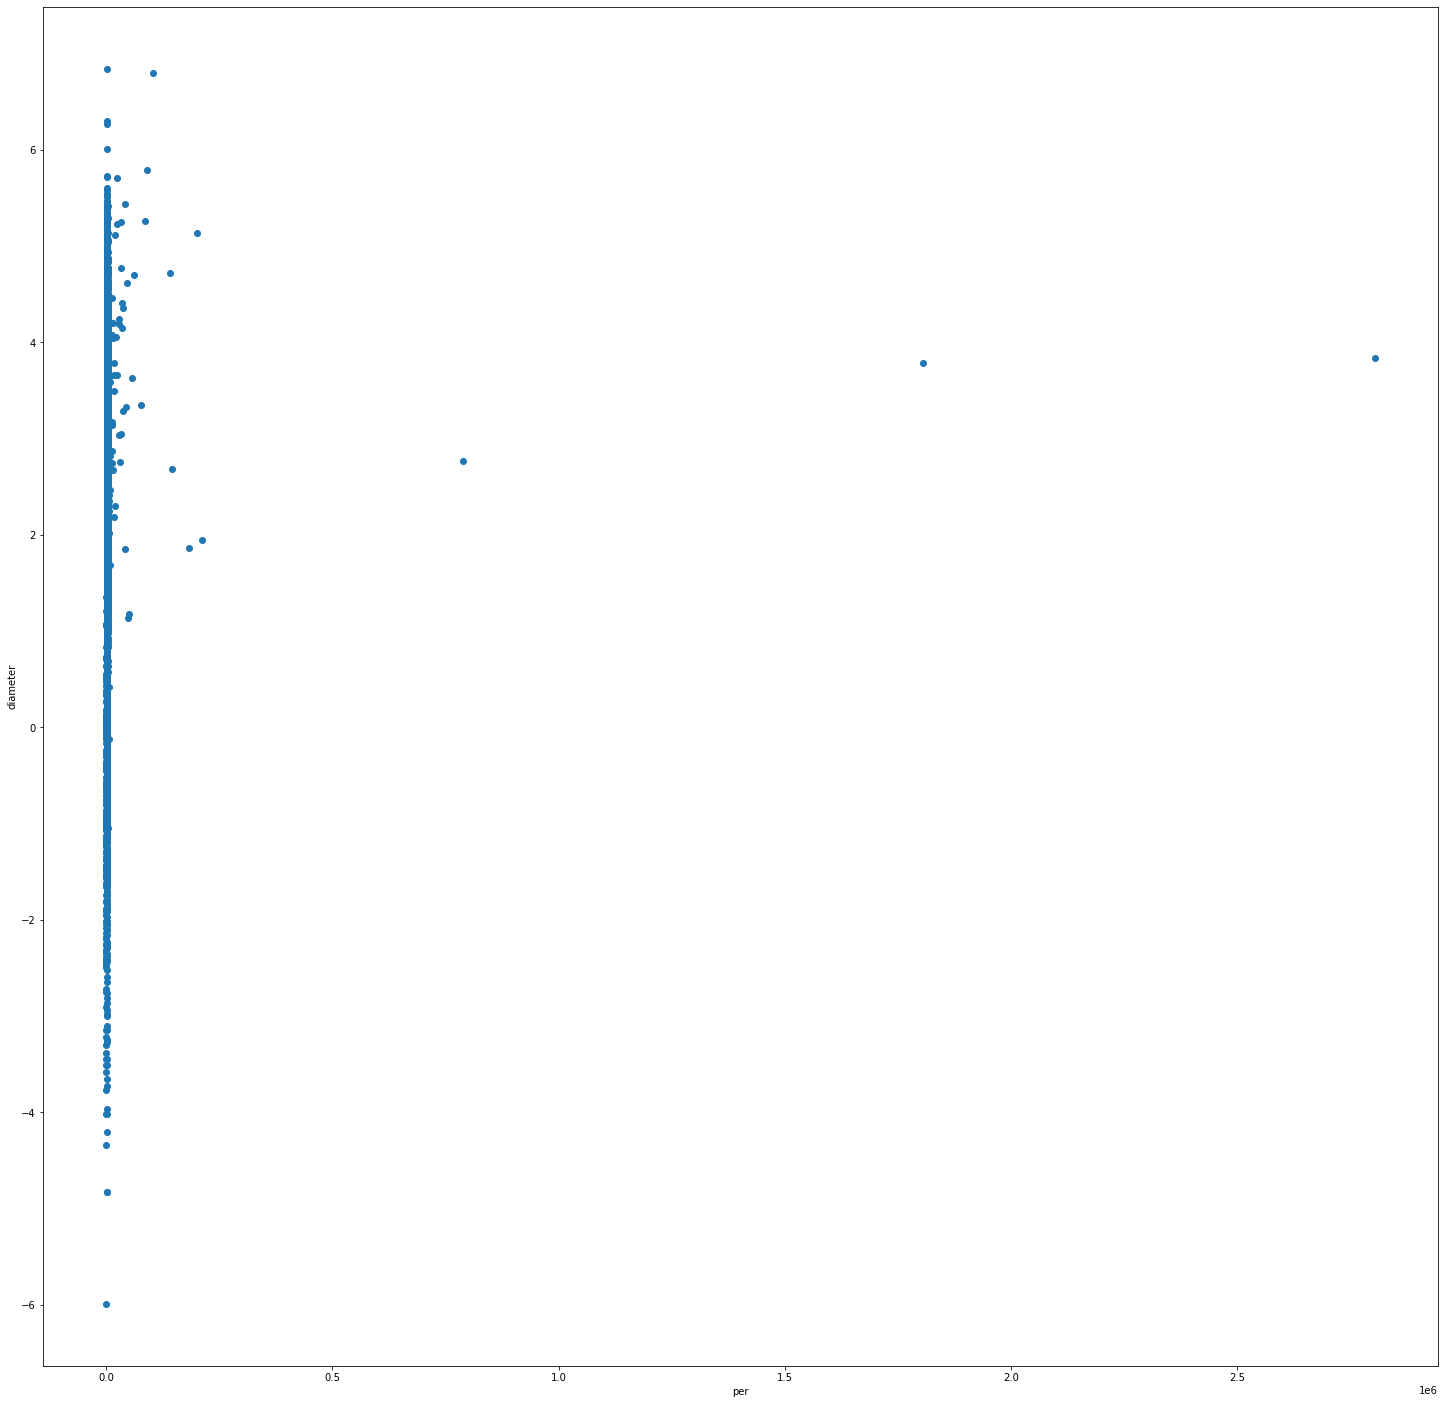

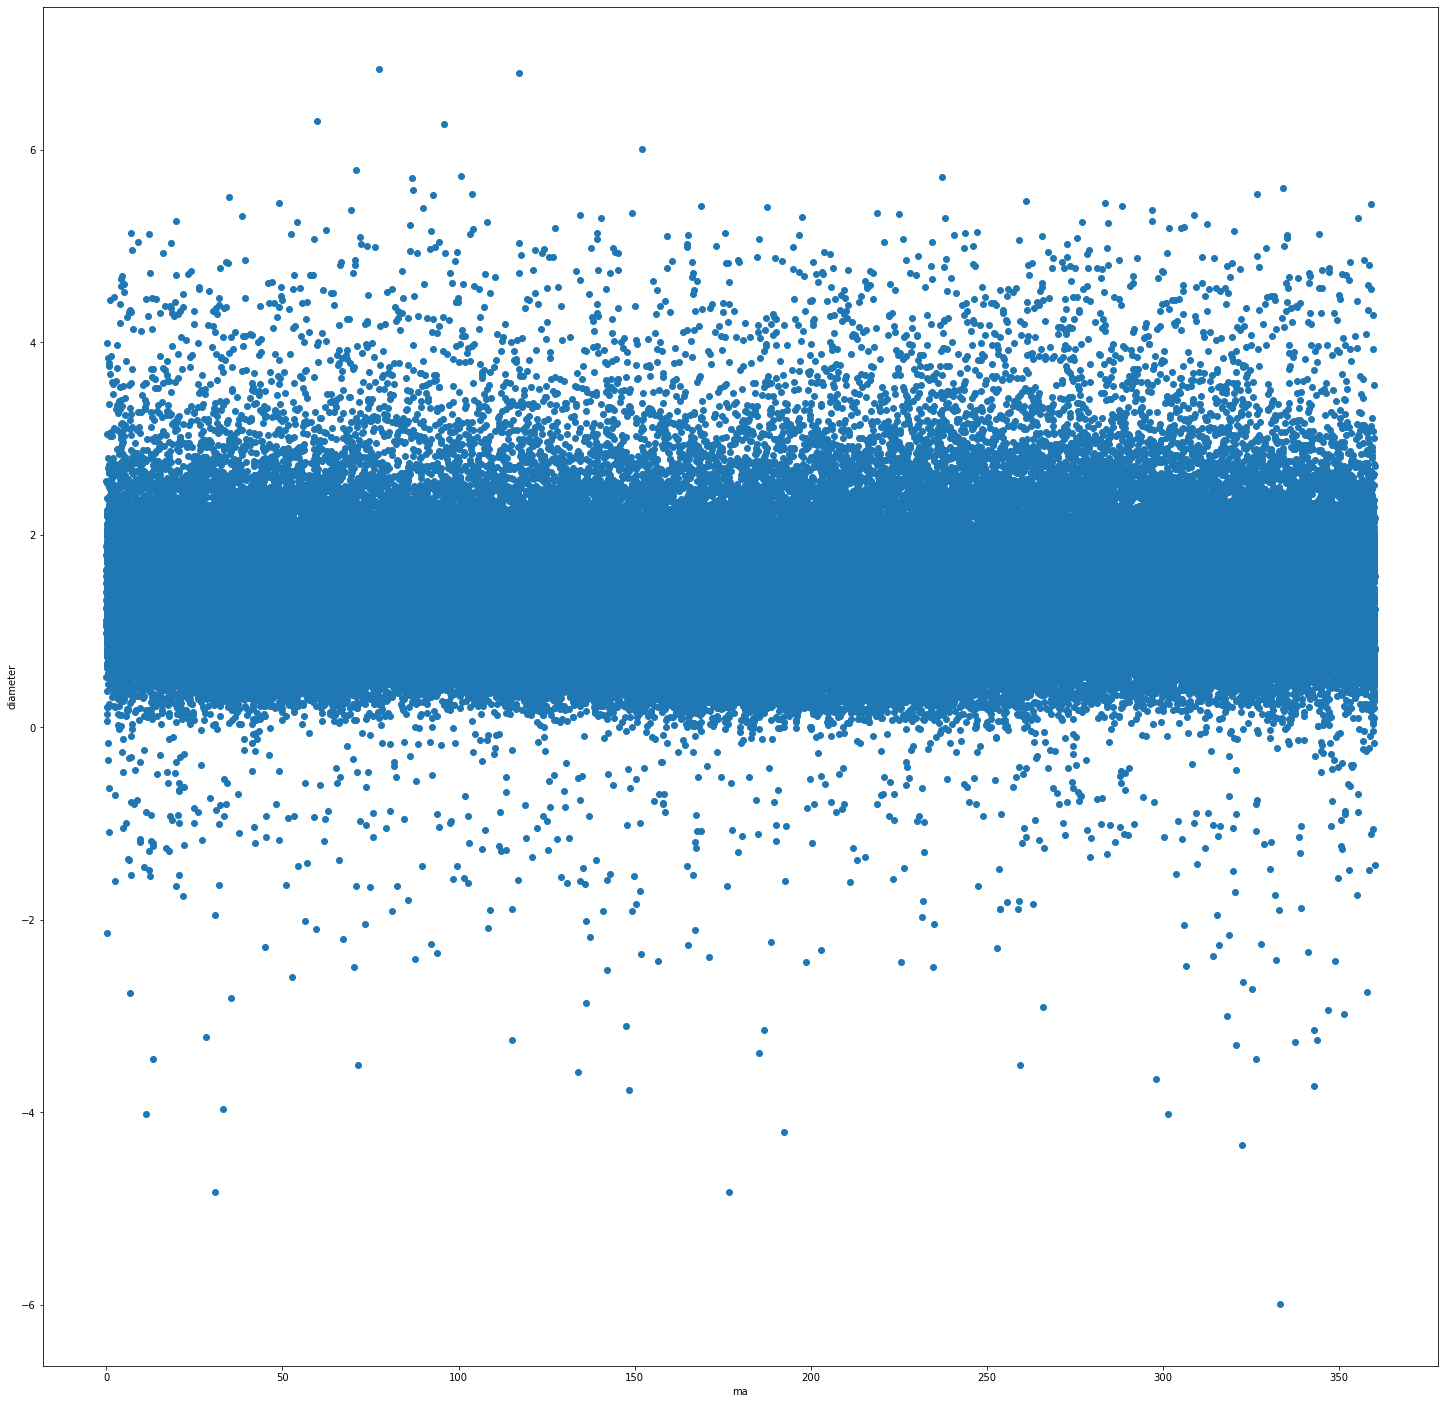

In [45]:
for i in df.columns.values.tolist():
    if i!="diameter" and str(df[i].dtype) in ['int64', 'float64', 'datetime']:
        plt.figure(figsize=(25,25))
        plt.scatter(df[i],np.log(df['diameter']))
        plt.xlabel(i)
        plt.ylabel('diameter')
        plt.show()

In [46]:
ohe = OneHotEncoder(sparse = False,handle_unknown='ignore')

In [47]:
df['condition_code'] = ohe.fit_transform(df[['condition_code']])
df['neo'] = ohe.fit_transform(df[['neo']])
df['pha'] = ohe.fit_transform(df[['pha']])
df['class'] = ohe.fit_transform(df[['class']])

In [48]:
df.head()

a         e          i          om           w         q        ad  \
0  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684  2.979647   
1  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865  3.411067   
2  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332  3.354967   
3  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909  2.570926   
4  2.574249  0.191095   5.366988  141.576605  358.687607  2.082324  3.066174   

      per_y  data_arc  condition_code  ...     H  neo  pha  diameter  albedo  \
0  4.608202    8822.0             1.0  ...  3.34  1.0  1.0   939.400  0.0900   
1  4.616444   72318.0             1.0  ...  4.13  1.0  1.0   545.000  0.1010   
2  4.360814   72684.0             1.0  ...  5.33  1.0  1.0   246.596  0.2140   
3  3.628837   24288.0             1.0  ...  3.20  1.0  1.0   525.400  0.4228   
4  4.130323   63507.0             1.0  ...  6.85  1.0  1.0   106.699  0.2740   

      moid  class         n          per          ma  
0  1.59478    0.0  0.213885  1683.145708   77.372096  
1  1.23324    0.0  0.213503  1686.155999   59.699133  
2  1.03454    0.0  0.226019  1592.787285   34.925016  
3  1.13948    0.0  0.271609  1325.432765   95.861936  
4  1.09589    0.0  0.238632  1508.600458  282.366289  

[5 rows x 21 columns]

In [49]:
imputer = KNNImputer(n_neighbors=5)

In [50]:
non_null_cols = ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'condition_code', 'n_obs_used', 'neo', 'pha', 'diameter', 'moid', 'class', 'n', 'per', 'ma']

In [51]:
df[non_null_cols+['data_arc']] = imputer.fit_transform(df[non_null_cols+['data_arc']])

In [52]:
non_null_cols.append('data_arc')

In [53]:
df[non_null_cols+['H']] = imputer.fit_transform(df[non_null_cols+['H']])

In [54]:
non_null_cols.append('H')

In [55]:
df[non_null_cols+['albedo']] = imputer.fit_transform(df[non_null_cols+['albedo']])

In [56]:
non_null_cols.append('albedo')

In [57]:
df.isna().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

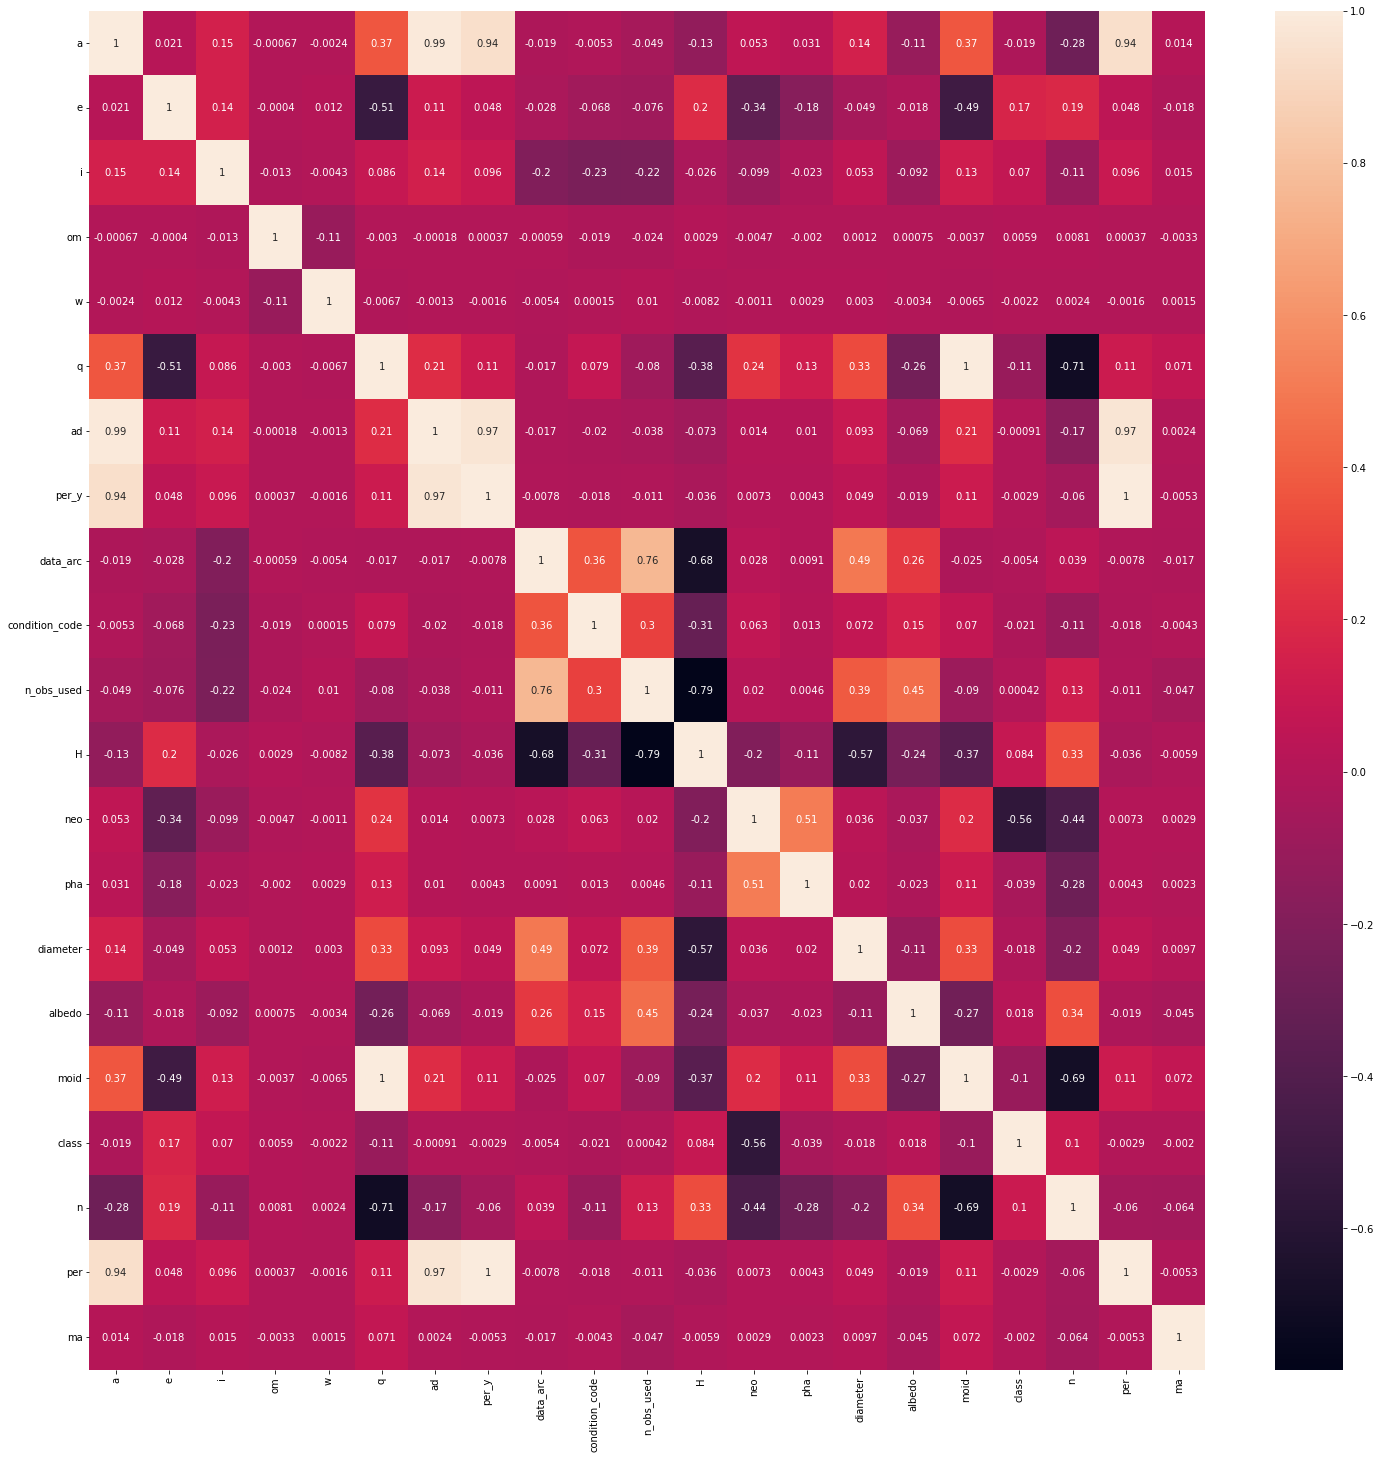

In [58]:
plt.figure(figsize=(25,25))
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

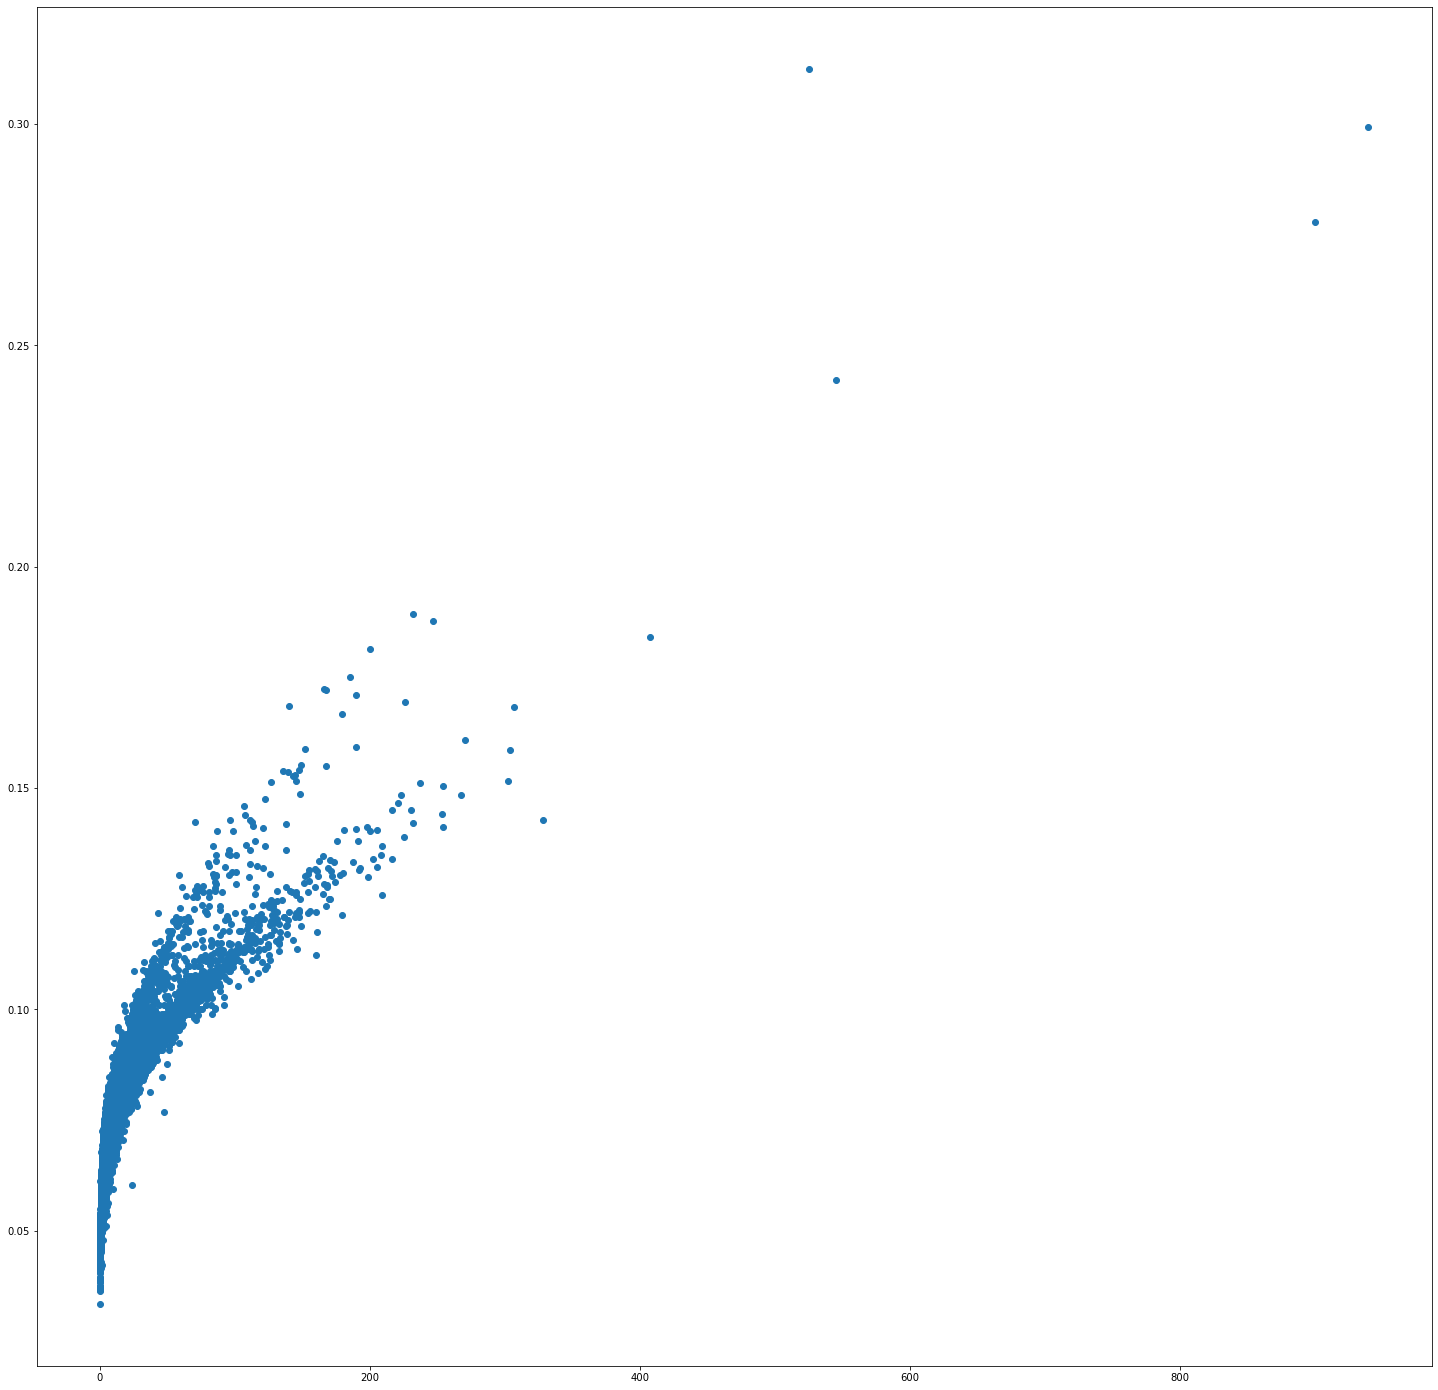

In [59]:
plt.figure(figsize=(25,25))
plt.scatter(df['diameter'],1/df['H'])
plt.show()

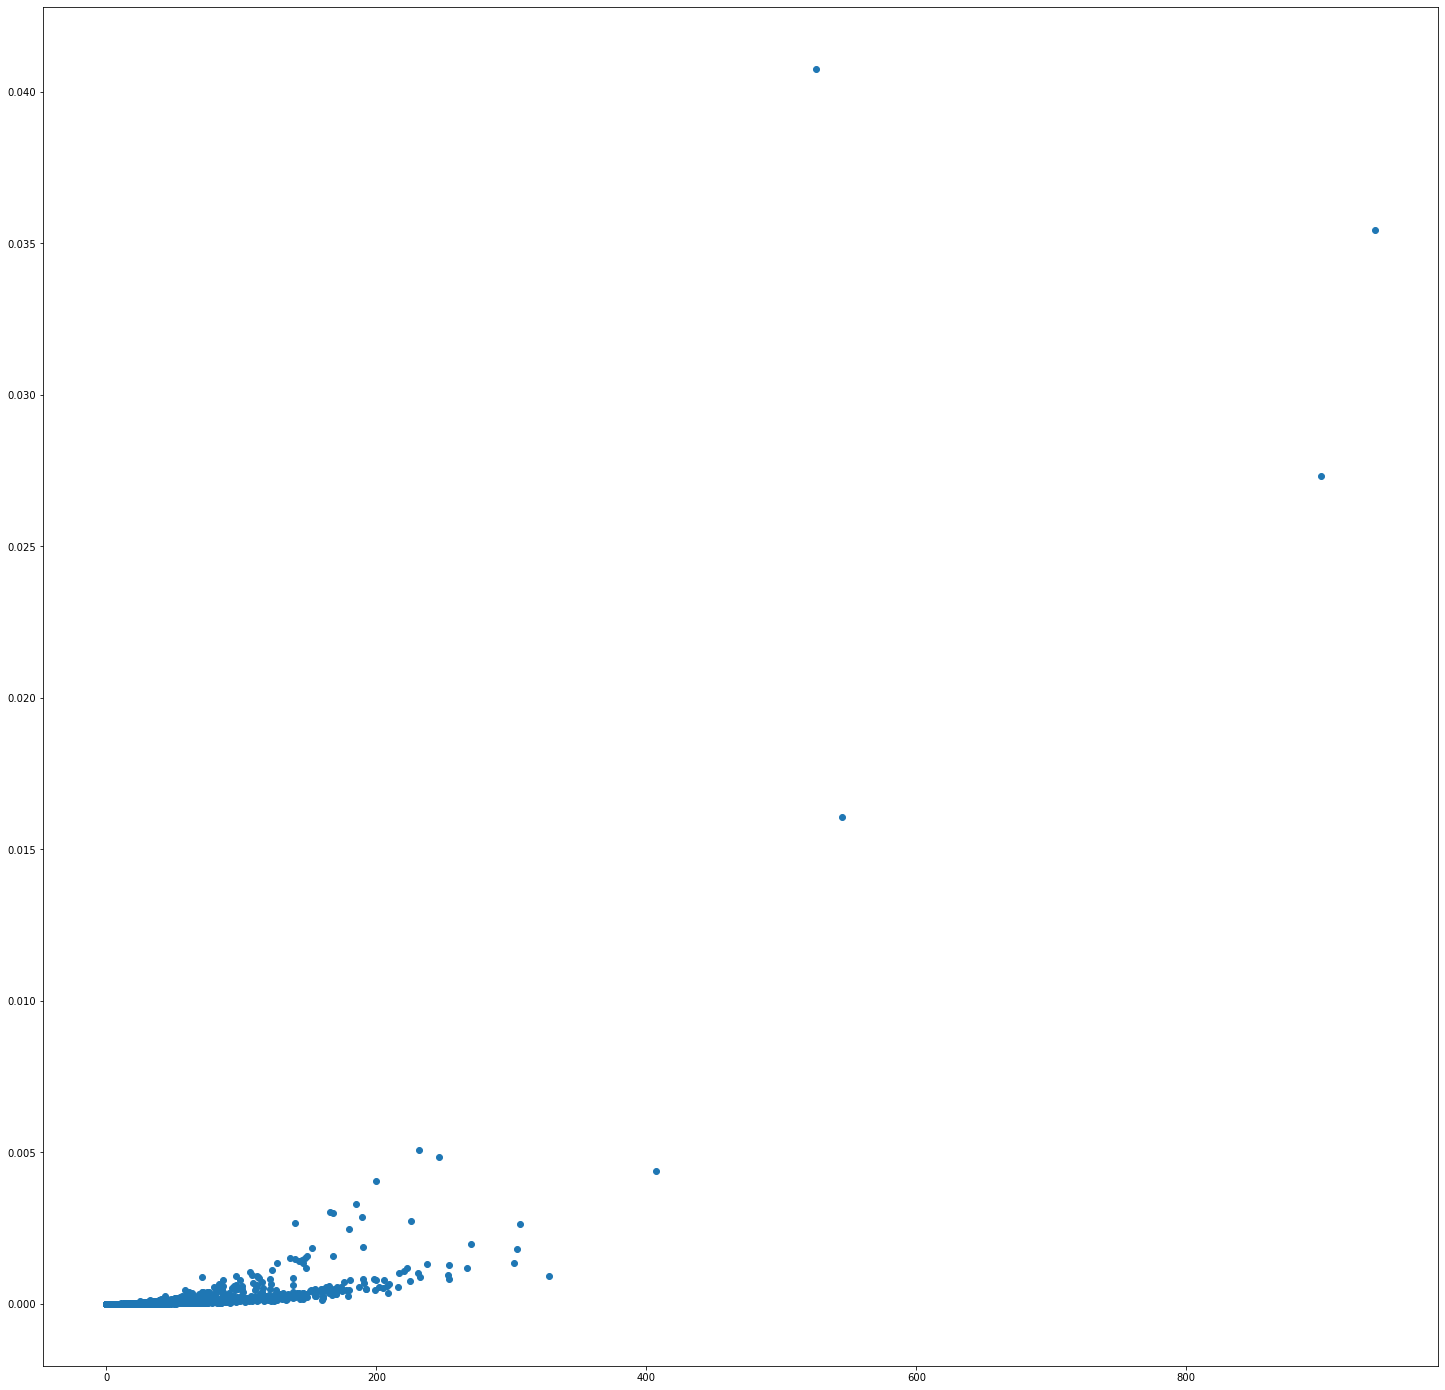

In [60]:
plt.figure(figsize=(25,25))
plt.scatter(df['diameter'],math.e**-df['H'])
plt.show()

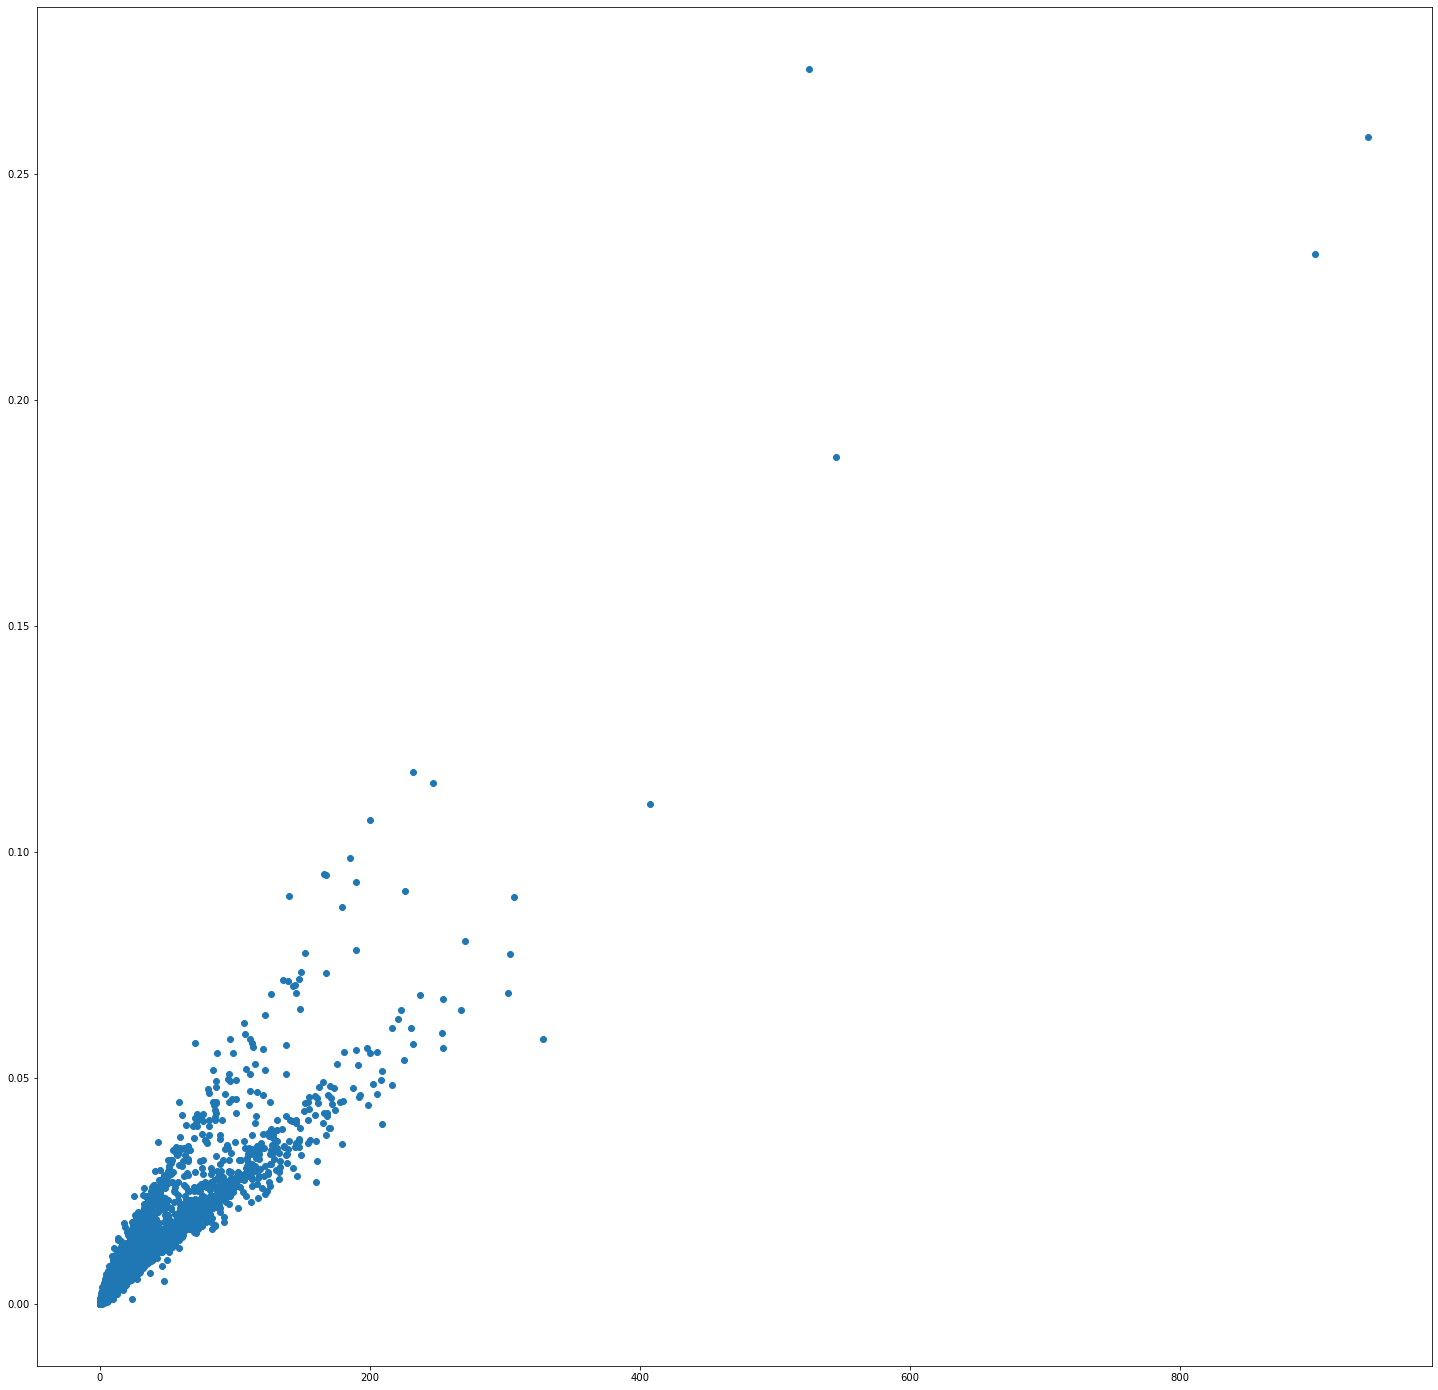

In [61]:
plt.figure(figsize=(25,25))
plt.scatter(df['diameter'],1.5**-df['H'])
plt.show()

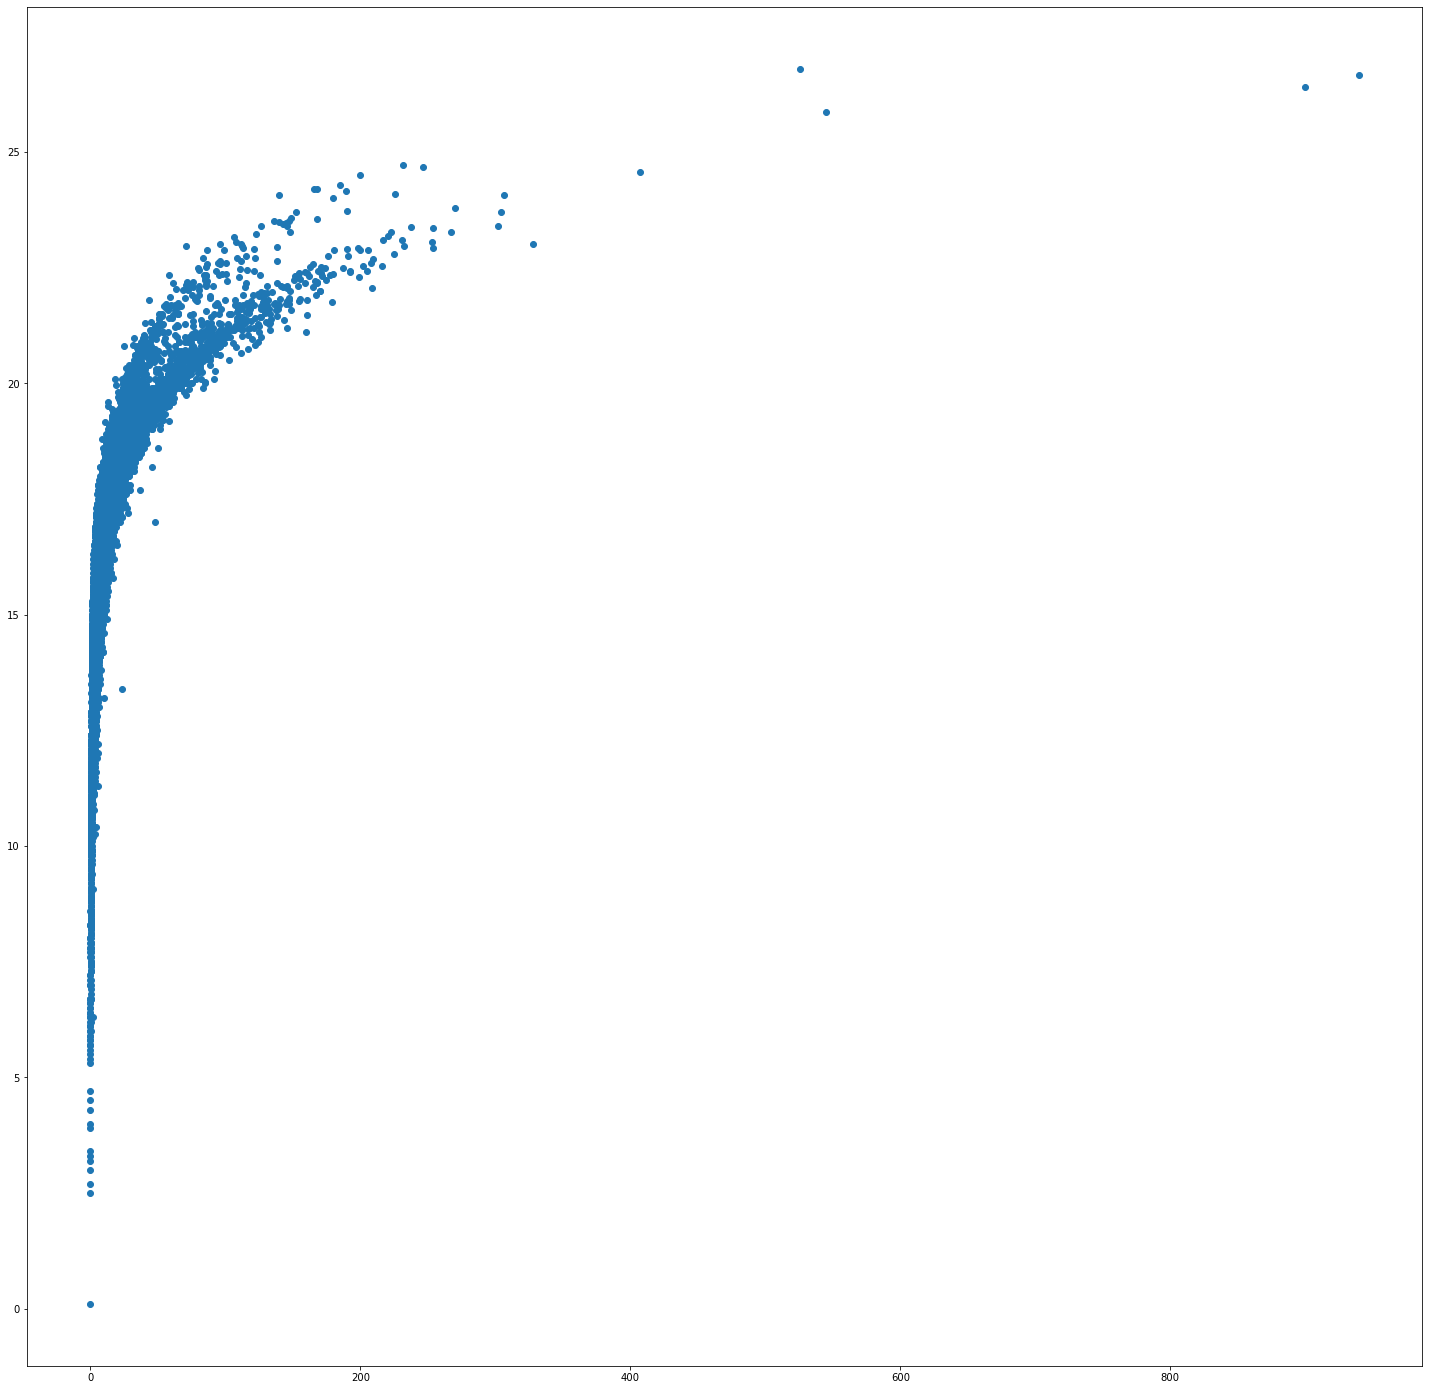

In [62]:
plt.figure(figsize=(25,25))
plt.scatter(df['diameter'],30-df['H'])
plt.show()

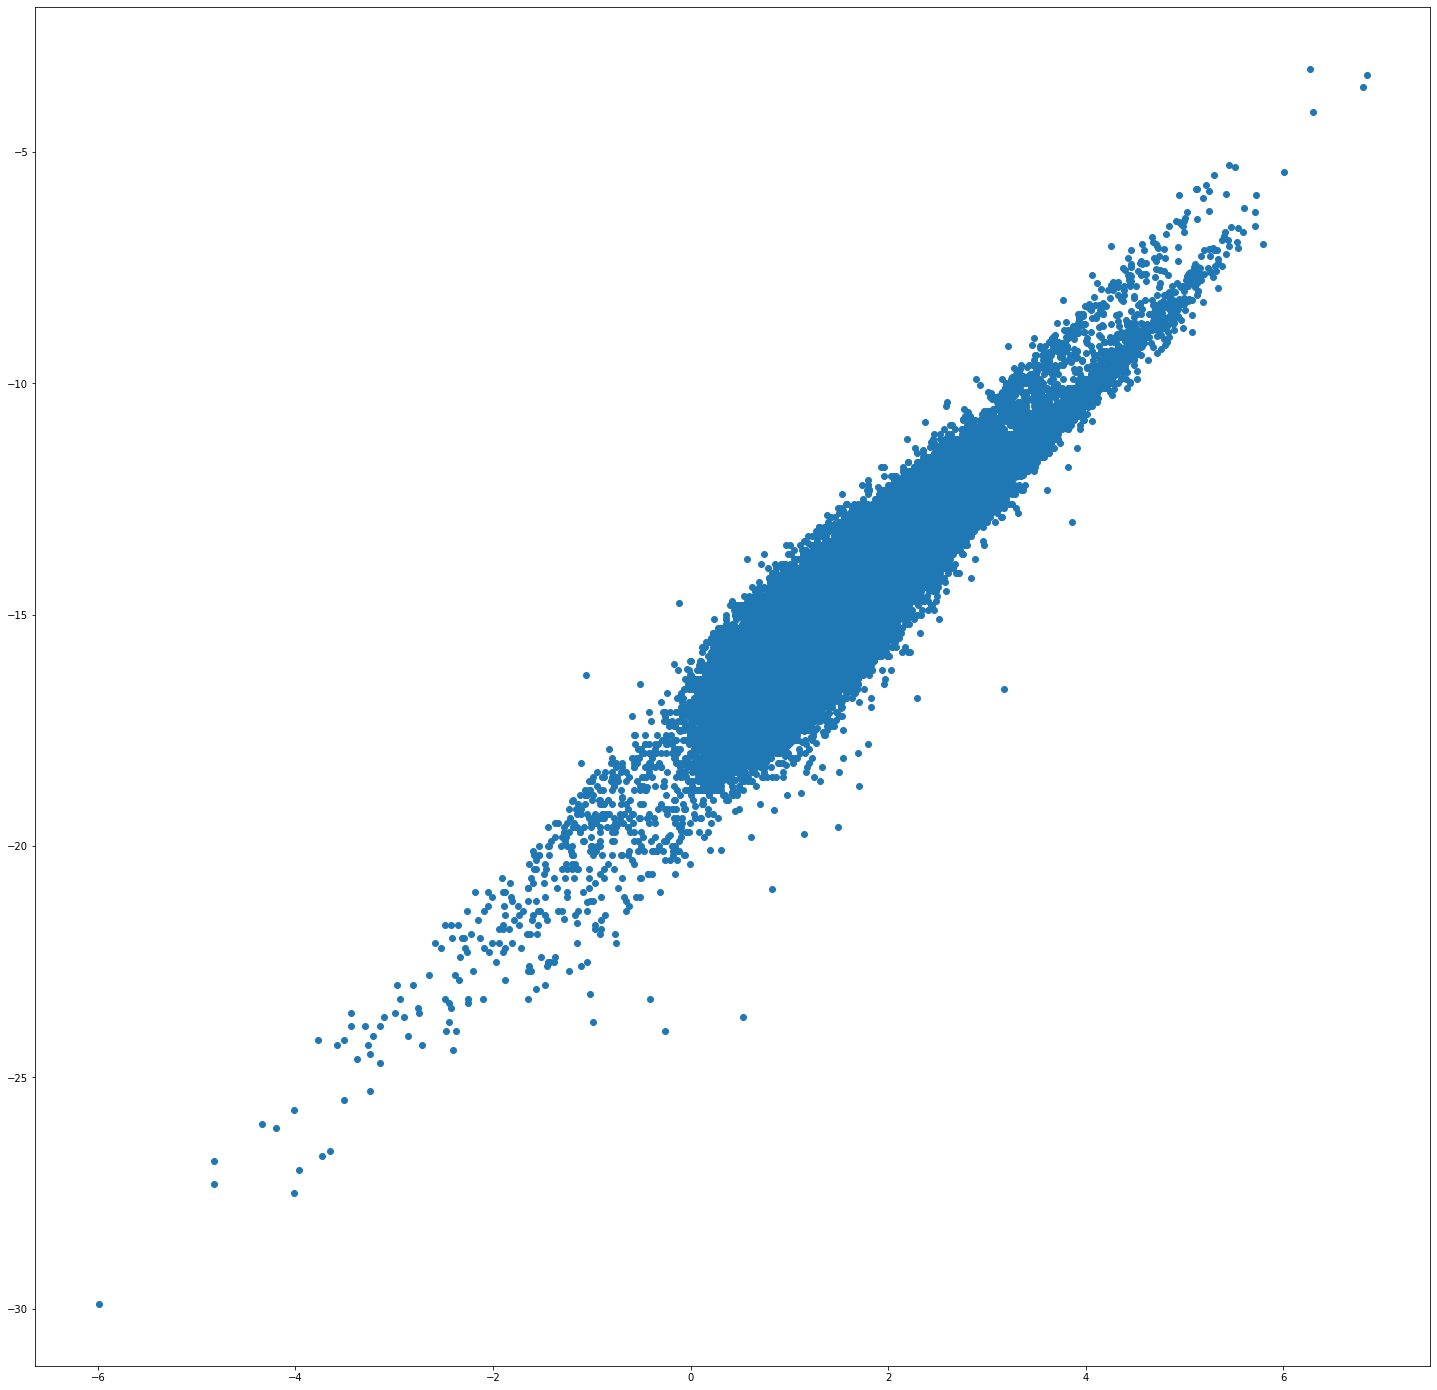

In [63]:
plt.figure(figsize=(25,25))
plt.scatter(np.log(df['diameter']),-df['H'])
plt.show()

In [64]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b

a, b = best_fit(np.log(df['diameter']),-df['H'])
print('a =', a,'\nb =', b)

a = -17.794626889544194 
b = 1.8354572512557994


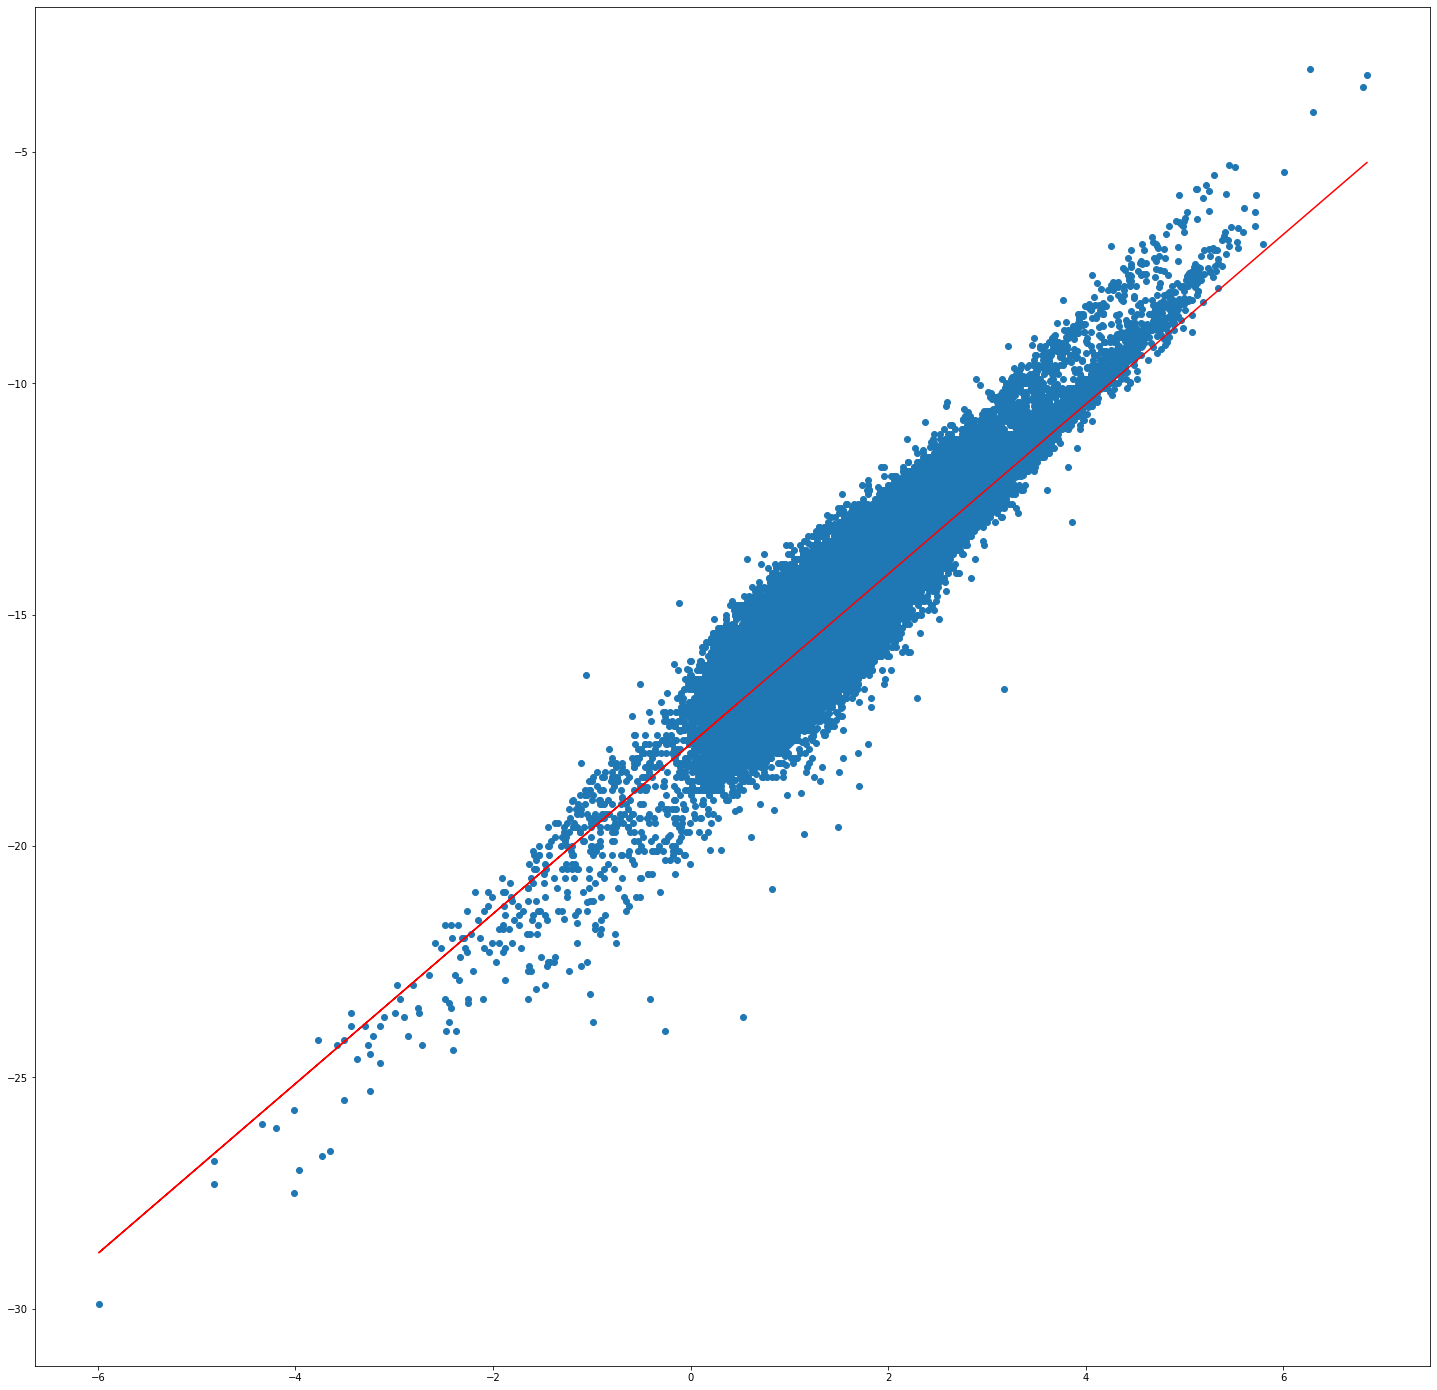

In [65]:
plt.figure(figsize=(25,25))
plt.scatter(np.log(df['diameter']),-df['H'])
yfit = [a + b * xi for xi in np.log(df['diameter'])]
plt.plot(np.log(df['diameter']), yfit,color='red')
plt.show()

In [66]:
df=df.assign(exp_neg_kH=lambda x:math.e**((-x.H)/b))

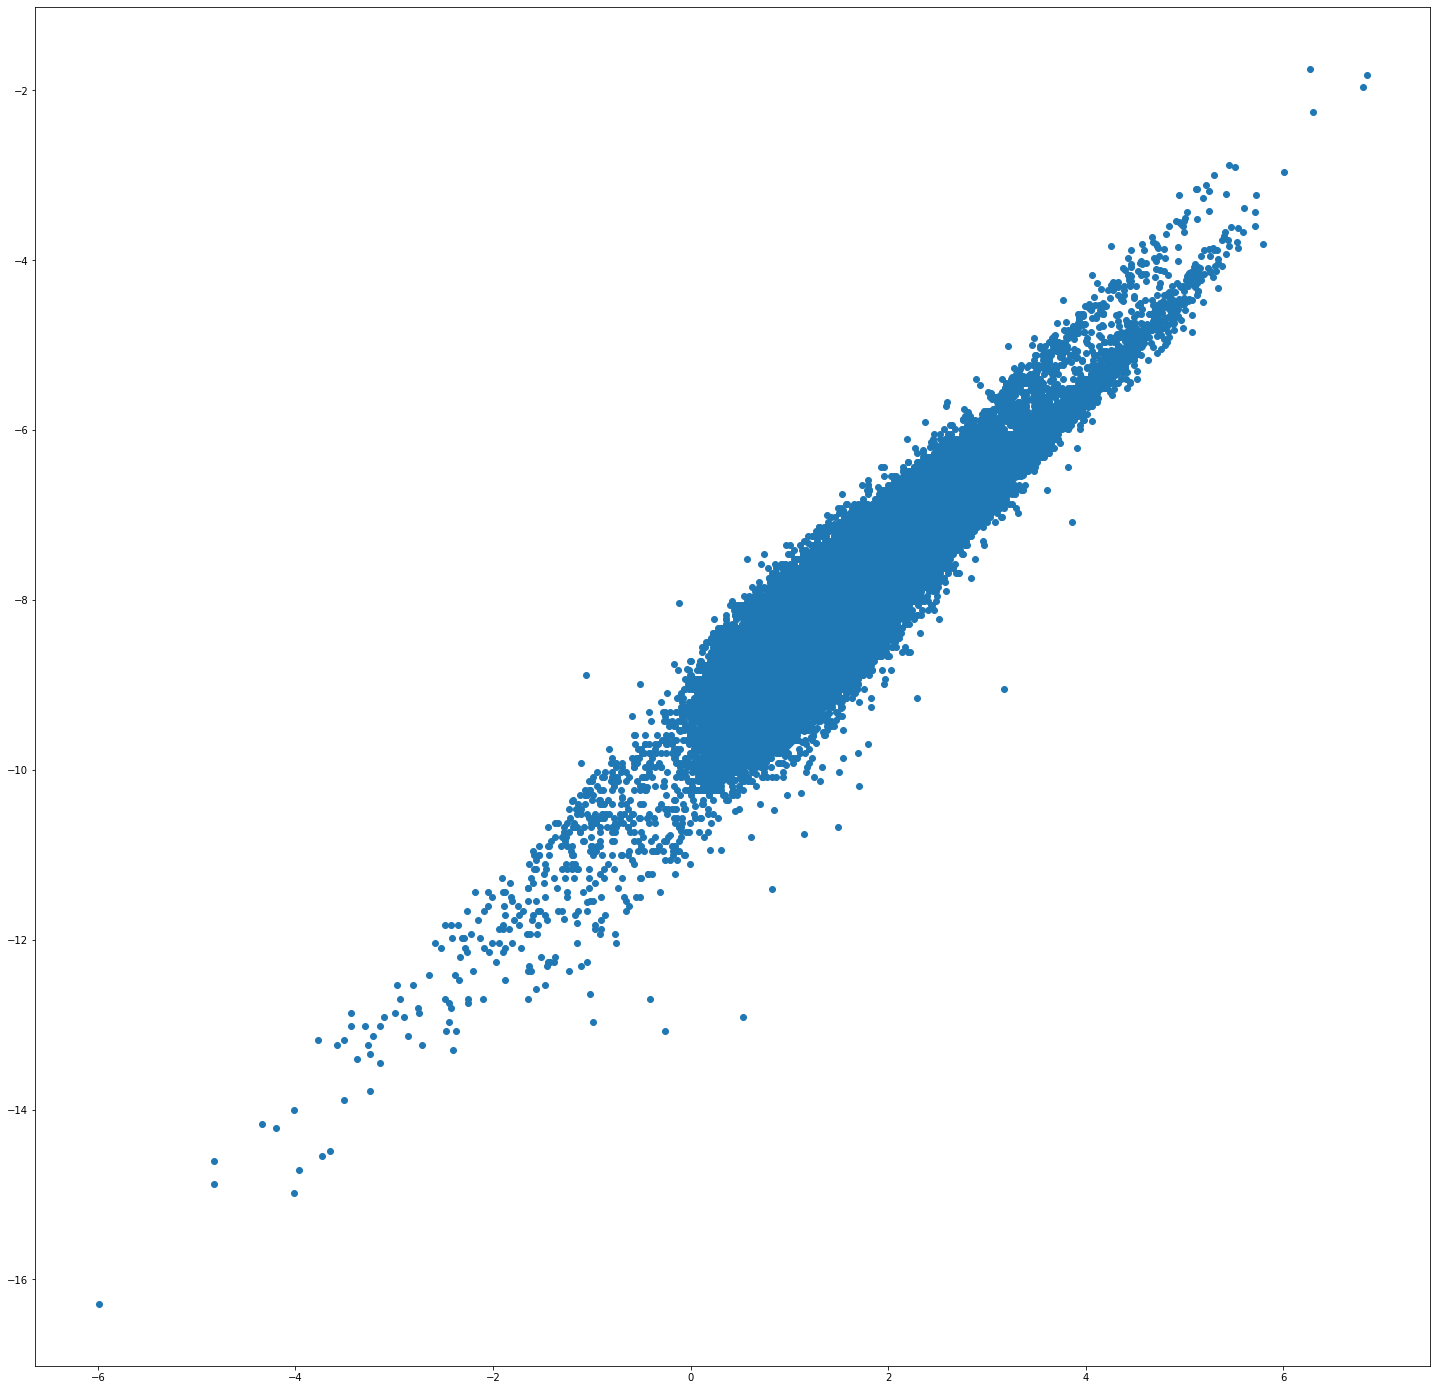

In [67]:
plt.figure(figsize=(25,25))
plt.scatter(np.log(df['diameter']),np.log(df['exp_neg_kH']))
plt.show()

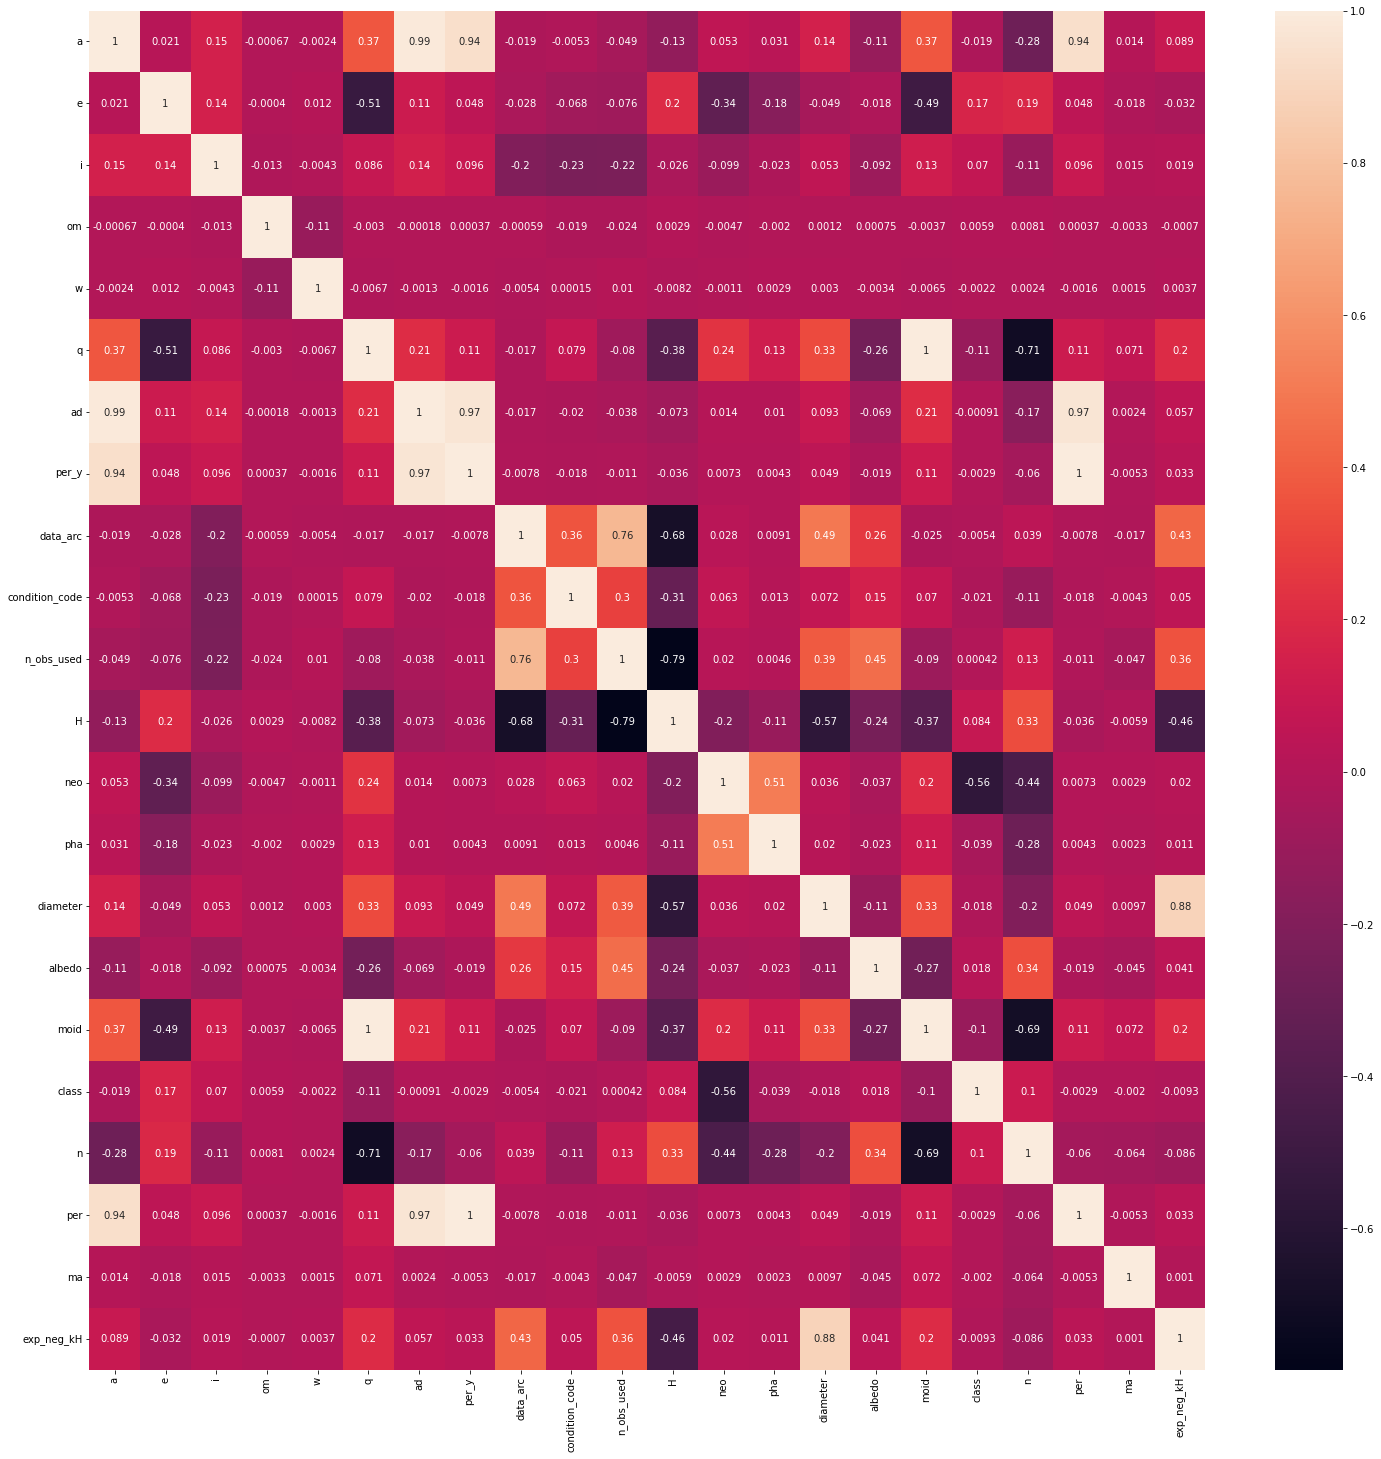

In [68]:
plt.figure(figsize=(25,25))
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()